In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import konlpy
from wordcloud import WordCloud 
import PIL
import json
import folium
import webbrowser
import csv

In [7]:
f = open('./data/subwayfree.csv')
data  = csv.reader(f)

for row in data :
    print(row)

['\ufeff사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2019-01', '1호선', '150', '서울역', '1516452 ', '1400464 ', '221180 ', '211764 ']
['2019-01', '1호선', '151', '시청', '676932 ', '676266 ', '102388 ', '101033 ']
['2019-01', '1호선', '152', '종각', '1240810 ', '1177643 ', '162410 ', '152062 ']
['2019-01', '1호선', '153', '종로3가', '703110 ', '674148 ', '387062 ', '362735 ']
['2019-01', '1호선', '154', '종로5가', '571824 ', '583955 ', '275447 ', '263687 ']
['2019-01', '1호선', '155', '동대문', '308301 ', '342898 ', '134071 ', '138633 ']
['2019-01', '1호선', '156', '신설동', '360561 ', '353834 ', '126466 ', '120147 ']
['2019-01', '1호선', '157', '제기동', '293540 ', '288217 ', '374571 ', '400607 ']
['2019-01', '1호선', '158', '청량리(서울시립대입구)', '463456 ', '482960 ', '352121 ', '357571 ']
['2019-01', '1호선', '159', '동묘앞', '174683 ', '188711 ', '146034 ', '147551 ']
['2019-01', '2호선', '201', '시청', '706097 ', '679503 ', '61058 ', '55387 ']
['2019-01', '2호선', '202', '을지로입구', '1415414 ', '1414980 ', '120425 ', '1115

In [23]:

for i in range(4, 8):
    row[i] = int(row[i])
print(row)


['2019-01', '경원선', '1022', '창동', 19, 0, 0, 0]


In [24]:
f = open('./data/subwayfree.csv')
data  = csv.reader(f)
    
next(data)  # 헤더 건너뛰기

mx = 0
rate = 0

for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i])
    rate = row[4] / row[6]
    if rate > mx :
        mx = rate
print(mx)

ZeroDivisionError: division by zero

In [34]:
f = open('./data/subwayfree.csv')
data  = csv.reader(f)
    
next(data)  # 헤더 건너뛰기

mx = 0
rate = 0

for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i])
    if row[6] == 0:
        print(row)

['2019-01', '경원선', '1022', '창동', 19, 0, 0, 0]
['2019-01', '분당선', '1031', '복정', 25, 0, 0, 0]
['2019-01', '일산선', '1949', '지축', 2, 0, 0, 0]
['2019-01', '경의선', '1291', '서울역', 11, 0, 0, 0]
['2019-01', '경의선', '1293', '홍대입구', 2, 0, 0, 0]
['2019-01', '경의선', '1295', '김포공항', 10, 0, 0, 0]
['2019-01', '경의선', '1296', '계양', 7, 0, 0, 0]
['2019-01', '경의선', '1297', '검암', 5, 0, 0, 0]


In [29]:
if row[6] == 0:
    print(row)

['2019-01', '경원선', '1022', '창동', 19, 0, 0, 0]


In [ ]:
#p167

f = open('./data/subwayfree.csv')
data  = csv.reader(f)
    
next(data)  # 헤더 건너뛰기

mx = 0
rate = 0

for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i])
    if row[6] != 0:
        rate = row[4] / row[6]
        if rate > mx:
            mx = rate
            print(row, round(rate, 2))
print(row)

['2019-01', '1호선', '150', '서울역', 1516452, 1400464, 221180, 211764] 6.86
['2019-01', '1호선', '152', '종각', 1240810, 1177643, 162410, 152062] 7.64
['2019-01', '2호선', '201', '시청', 706097, 679503, 61058, 55387] 11.56
['2019-01', '2호선', '202', '을지로입구', 1415414, 1414980, 120425, 111592] 11.75
['2019-01', '2호선', '209', '한양대', 233785, 256079, 15380, 16652] 15.2
['2019-01', '2호선', '222', '강남', 3153418, 3210437, 186486, 167666] 16.91
['2019-01', '2호선', '239', '홍대입구', 2351935, 2507561, 114832, 111488] 20.48
['2019-01', '3호선', '321', '충무로', 55, 0, 2, 0] 27.5
['2019-01', '우이신설선', '4713', '신설동', 37248, 40743, 19037, 17418]


In [38]:
f = open('./data/subwayfree.csv')
data  = csv.reader(f)
    
next(data)  # 헤더 건너뛰기

mx = 0
rate = 0

for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i])
    if row[6] != 0 and (row[4] + row[6]) > 100000 :
        rate = row[4] / (row[4] + row[6])
        if rate > mx:
            mx = rate
            print(row, round(rate, 2))
print(row)

['2019-01', '1호선', '150', '서울역', 1516452, 1400464, 221180, 211764] 0.87
['2019-01', '1호선', '152', '종각', 1240810, 1177643, 162410, 152062] 0.88
['2019-01', '2호선', '201', '시청', 706097, 679503, 61058, 55387] 0.92
['2019-01', '2호선', '202', '을지로입구', 1415414, 1414980, 120425, 111592] 0.92
['2019-01', '2호선', '209', '한양대', 233785, 256079, 15380, 16652] 0.94
['2019-01', '2호선', '222', '강남', 3153418, 3210437, 186486, 167666] 0.94
['2019-01', '2호선', '239', '홍대입구', 2351935, 2507561, 114832, 111488] 0.95
['2019-01', '우이신설선', '4713', '신설동', 37248, 40743, 19037, 17418]


In [39]:
f = open('./data/subwayfree.csv')
data  = csv.reader(f)
    
next(data)  # 헤더 건너뛰기

mx = 0
rate = 0

for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i])
    if row[6] != 0 and (row[4] + row[6]) > 100000 :
        rate = row[4] / (row[4] + row[6])
        if rate > 0.94:
            mx = rate
            print(row, round(rate, 2))
print(row)

['2019-01', '2호선', '222', '강남', 3153418, 3210437, 186486, 167666] 0.94
['2019-01', '2호선', '239', '홍대입구', 2351935, 2507561, 114832, 111488] 0.95
['2019-01', '경부선', '1001', '서울역', 178223, 29980, 10325, 1612] 0.95
['2019-01', '9호선', '4125', '신논현', 965930, 995451, 57013, 54557] 0.94
['2019-01', '공항철도 1호선', '4203', '홍대입구', 336328, 335507, 17545, 17112] 0.95
['2019-01', '공항철도 1호선', '4206', '마곡나루', 133488, 119389, 8060, 8192] 0.94
['2019-01', '공항철도 1호선', '4207', '김포공항', 300654, 196229, 18640, 14332] 0.94
['2019-01', '공항철도 1호선', '4210', '청라국제도시', 174320, 164483, 9921, 9676] 0.95
['2019-01', '우이신설선', '4713', '신설동', 37248, 40743, 19037, 17418]


#171 유임승차 비율이 가장 높은 역 찾기

In [41]:
f = open('./data/subwayfree.csv')
data  = csv.reader(f)
    
next(data)  # 헤더 건너뛰기

mx = 0
rate = 0
mx_station = ''

for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i])
    if row[6] != 0 and (row[4] + row[6]) > 100000 :
        rate = row[4] / (row[4] + row[6]) 
        if rate > mx :
            mx = rate
            mx_station = row[3] + ' ' + row[1]
print(mx_station, round(mx*100, 2))

홍대입구 2호선 95.34


In [ ]:
# 무임승차 비율이 가장 높은 역 찾기

f = open('./data/subwayfree.csv')
data  = csv.reader(f)
    
next(data)  # 헤더 건너뛰기

mn = 1
rate = 0
mn_station = ''

for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i])
    if row[6] != 0 and (row[4] + row[6]) > 100000 :
        rate = row[4] / (row[4] + row[6]) 
        if rate < mn :
            mn = rate
            mn_station = row[3] + ' ' + row[1]
print(mn_station, round((1-mn)*100, 2))

소요산 경원선 56.34


In [52]:
# 무임승차 비율이 가장 높은 역 찾기

f = open('./data/subwayfree.csv')
data  = csv.reader(f)
    
next(data)  # 헤더 건너뛰기

mx = 0
rate = 0
mx_station = ''

for row in data :
    for i in range(4, 8) :
        row[i] = int(row[i])
    if row[6] != 0 and (row[4] + row[6]) > 100000 :
        rate = row[6] / (row[4] + row[6]) 
        if rate > mx :
            mx = rate
            mx_station = row[3] + ' ' + row[1]
print(mx_station, round(mx*100, 2))

소요산 경원선 56.34


#유무임 승하차 인원이 가장 많은 역은 어디일까 p172 

In [53]:
f = open('./data/subwayfree.csv')
data  = csv.reader(f)
    
next(data)  # 헤더 건너뛰기

mx = [0]*4
mx_station = ['']*4

print(mx)
print(mx_station)

[0, 0, 0, 0]
['', '', '', '']


In [57]:
f = open('./data/subwayfree.csv')
data  = csv.reader(f)
    
next(data)  # 헤더 건너뛰기

mx = [0]*4
mx_station = ['']*4

for row in data :
    for i in range(4, 8):
        row[i] = int(row[i])
        if row[i] > mx[i-4]:
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]
for i in range(4):
    print(mx_station[i], mx[i])

강남 2호선 3153418
강남 2호선 3210437
종로3가 1호선 387062
제기동 1호선 400607


In [56]:
f = open('./data/subwayfree.csv')
data  = csv.reader(f)
    
next(data)  # 헤더 건너뛰기

mx = [0]*4
mx_station = ['']*4

label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data :
    for i in range(4, 8):
        row[i] = int(row[i])
        if row[i] > mx[i-4]:
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' +row[1]
for i in range(4):
    print(label[i] + ' : ' +mx_station[i], mx[i])

유임승차 : 강남 2호선 3153418
유임하차 : 강남 2호선 3210437
무임승차 : 종로3가 1호선 387062
무임하차 : 제기동 1호선 400607


C:\Users\pc04-18\AppData\Local\Temp\ipykernel_13320\2623917196.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(dpi = 300)


KeyboardInterrupt: 

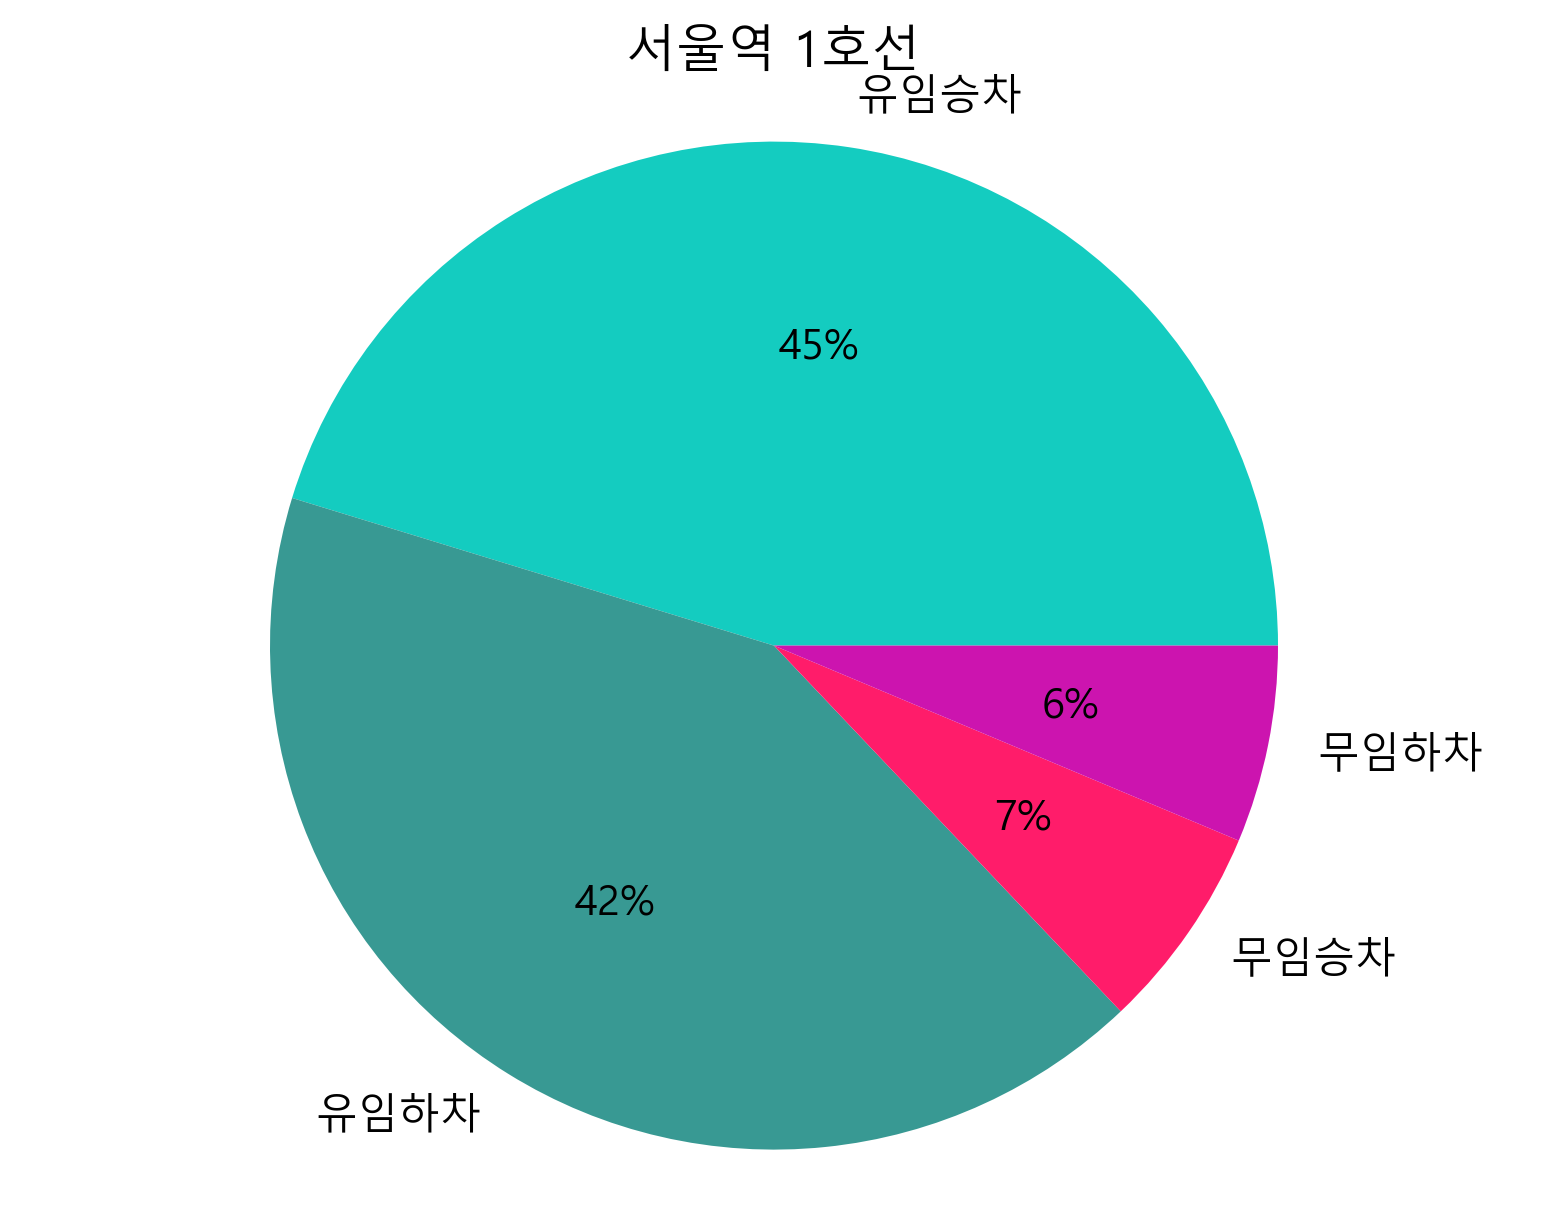

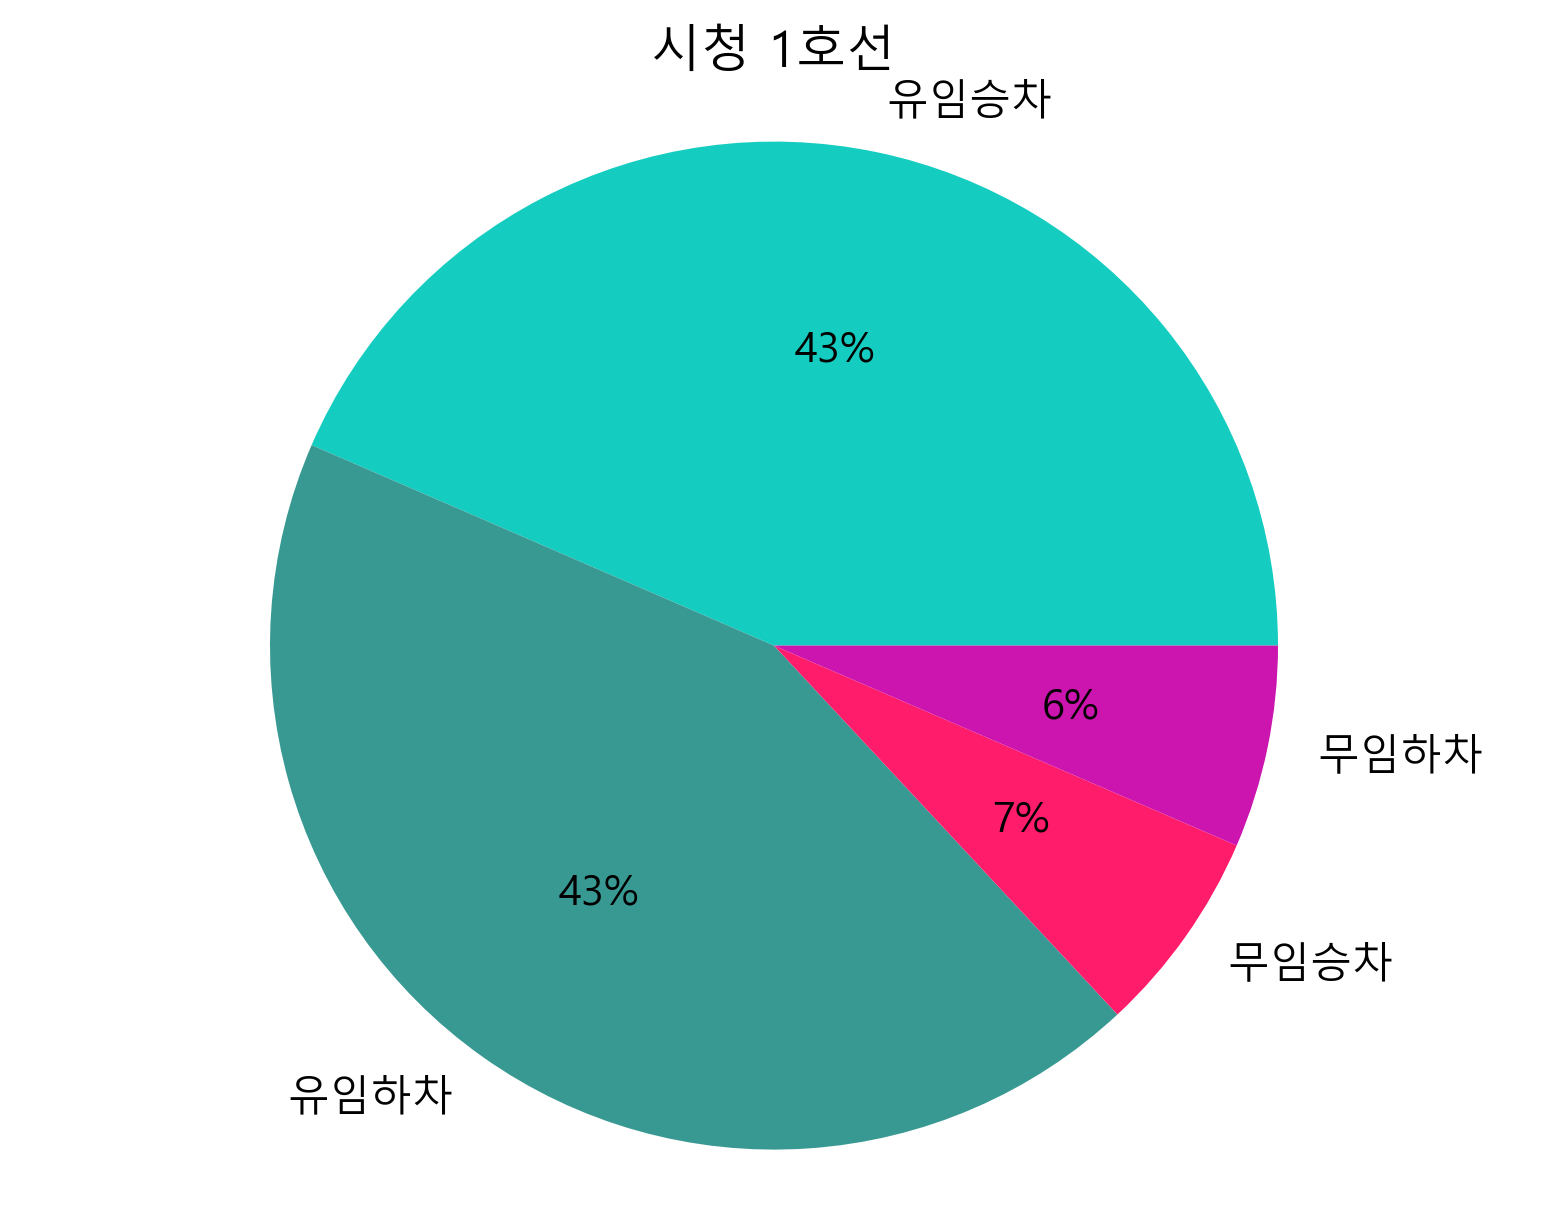

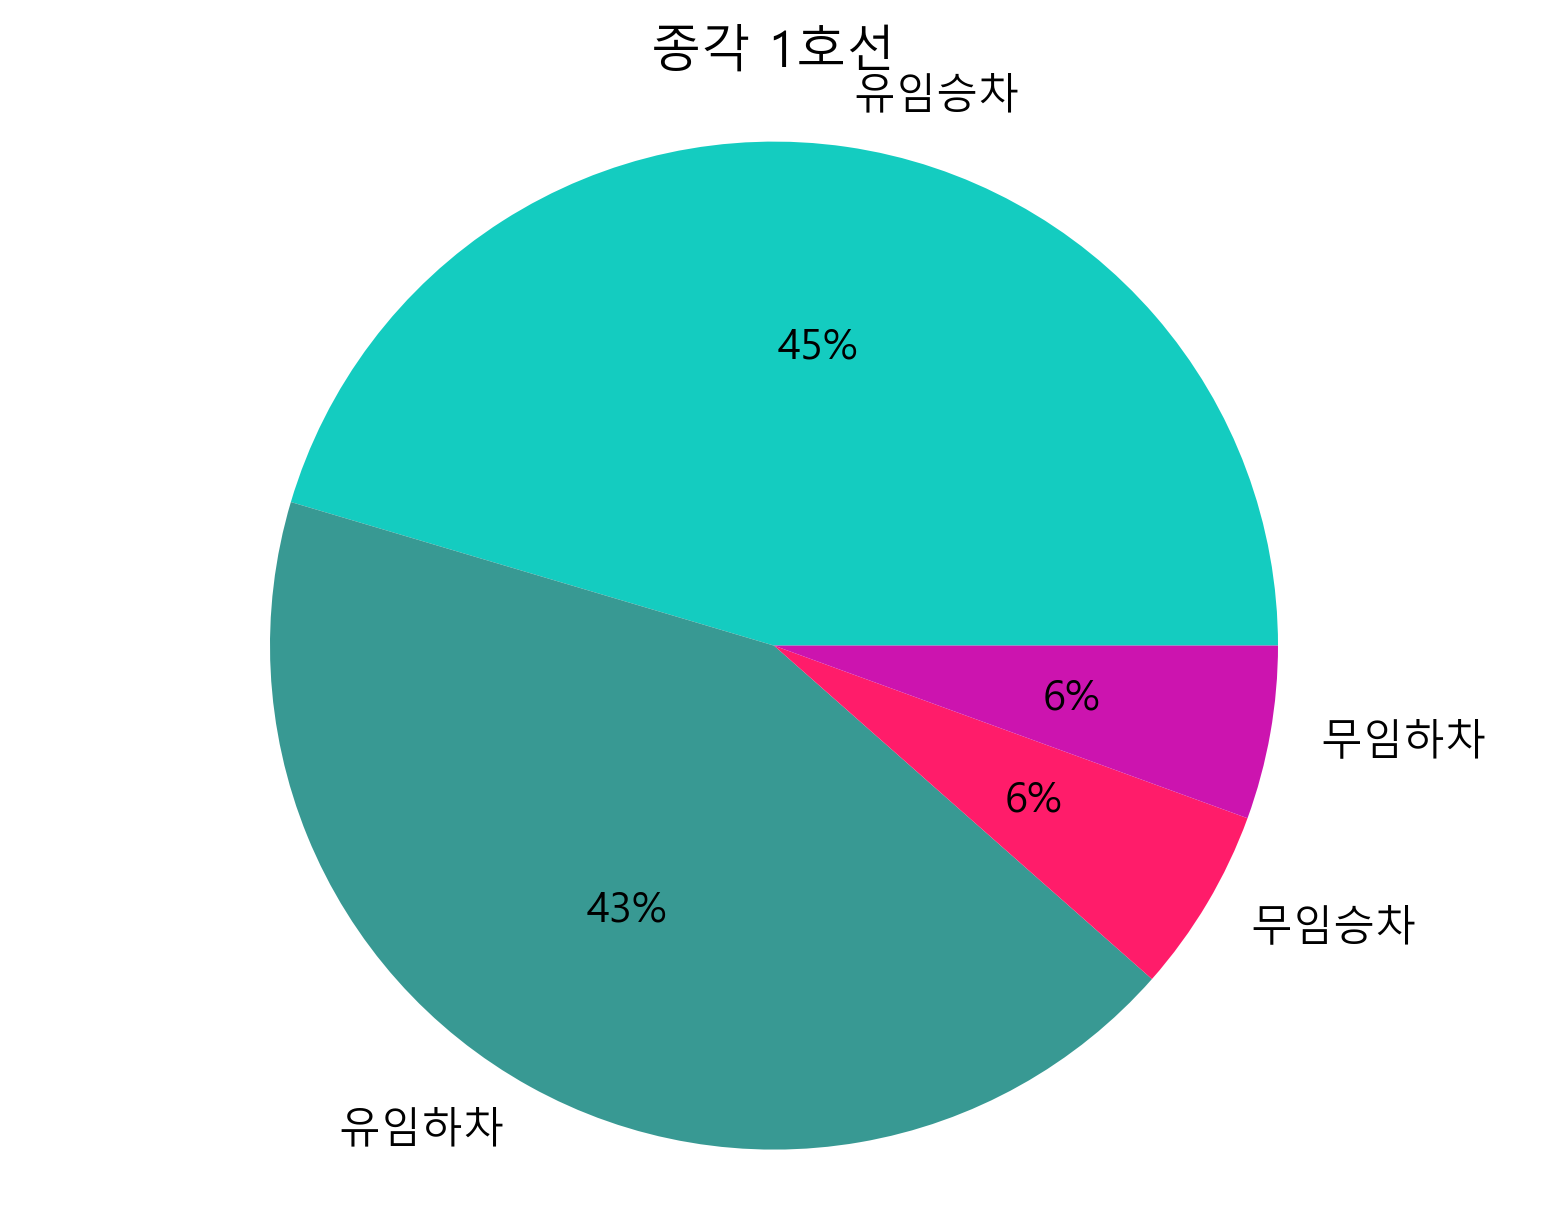

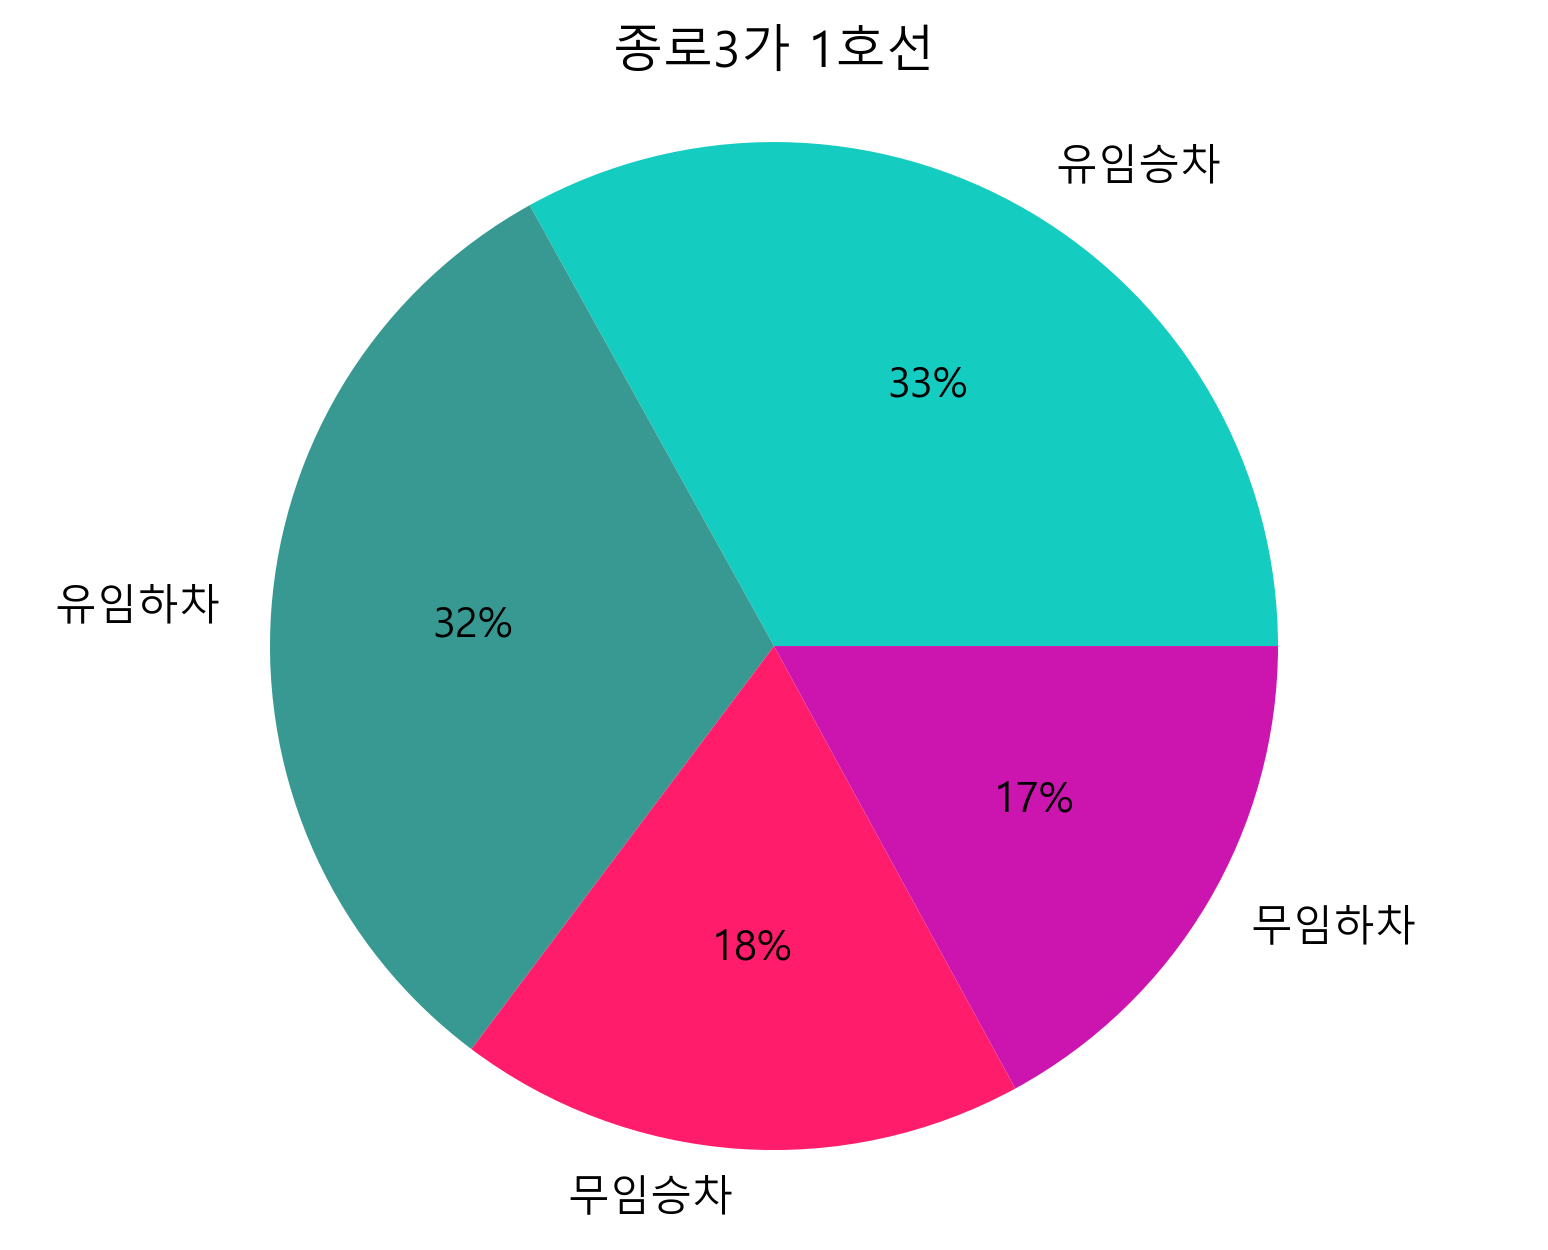

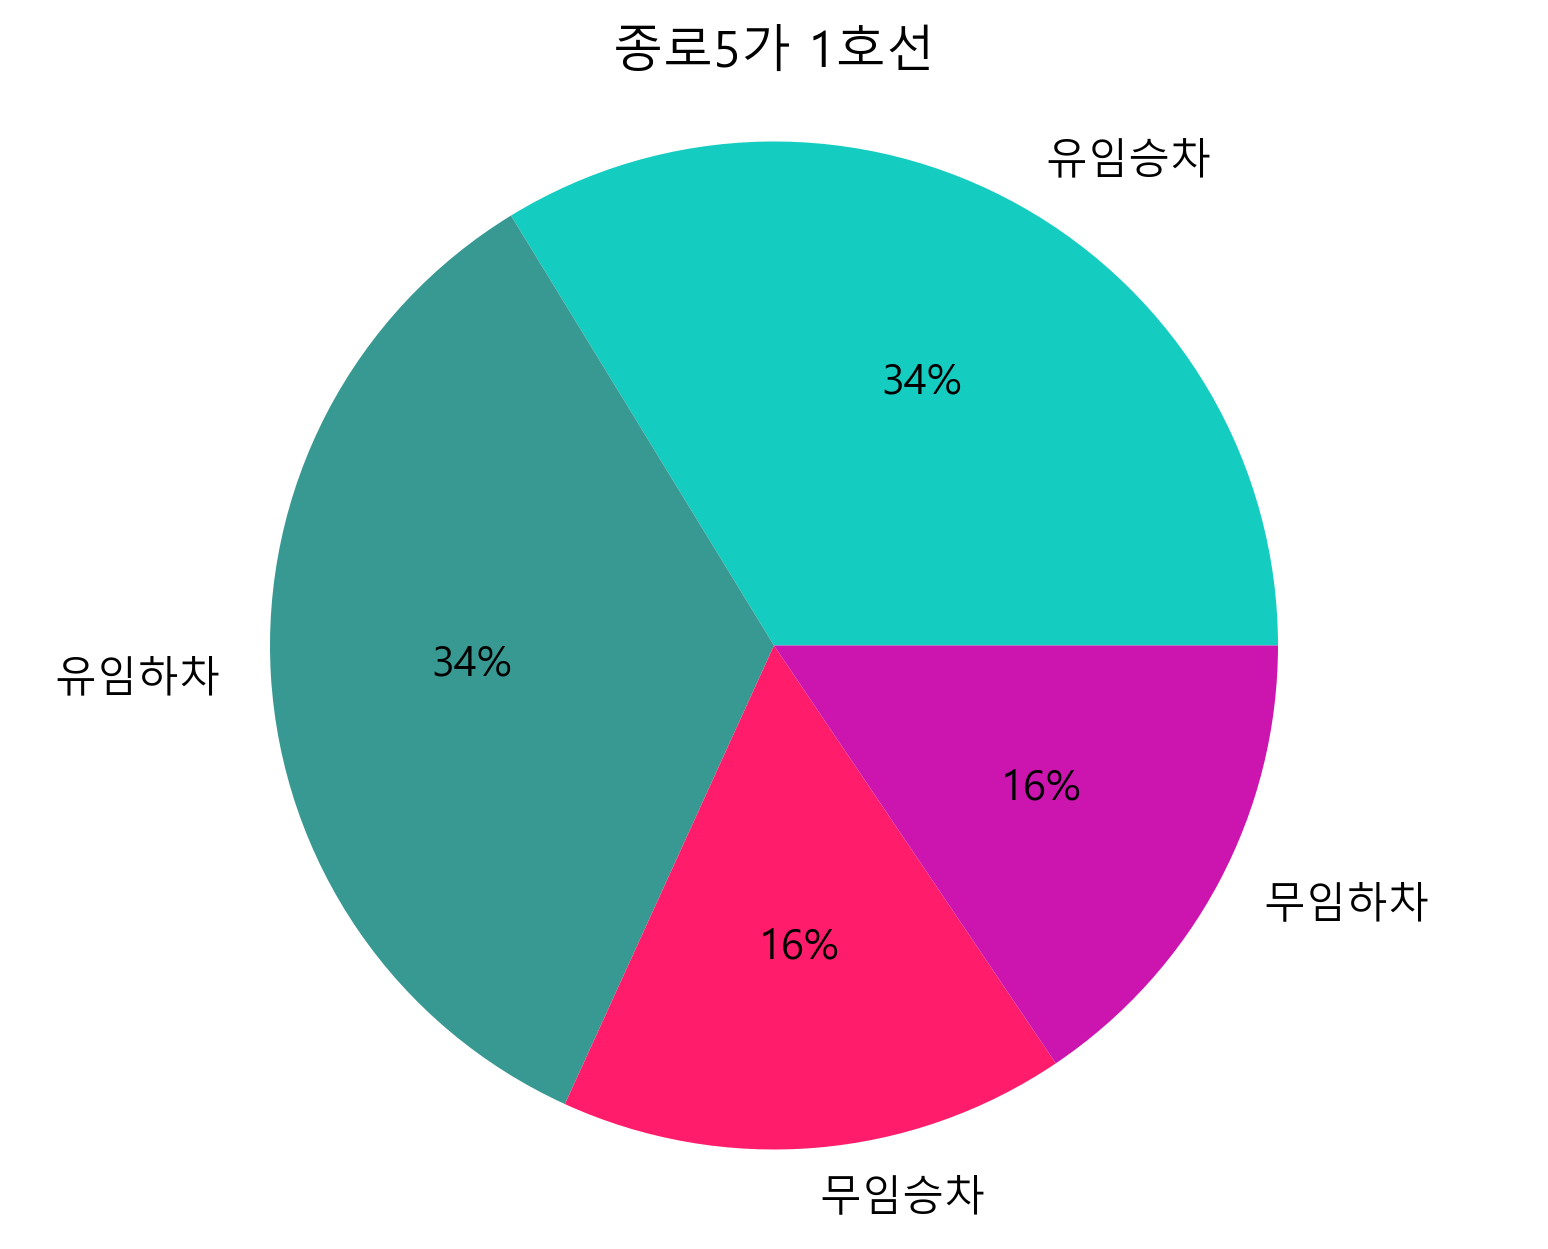

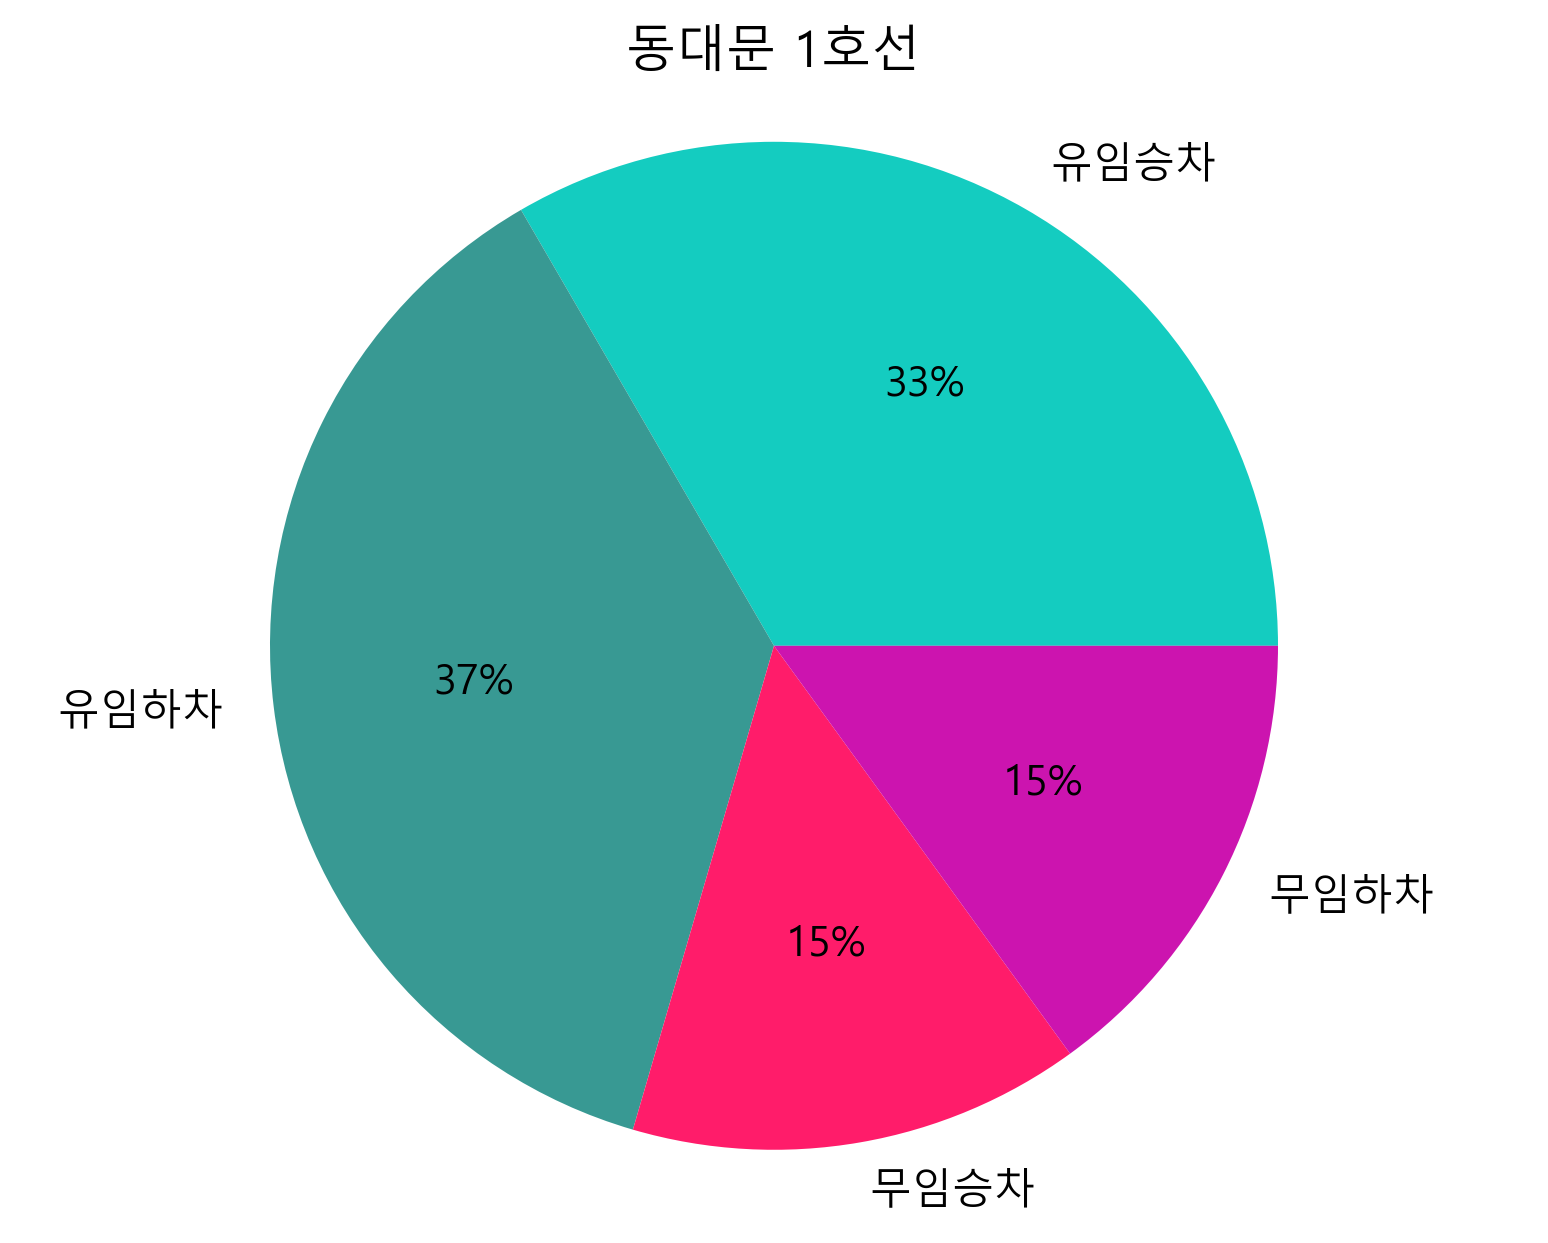

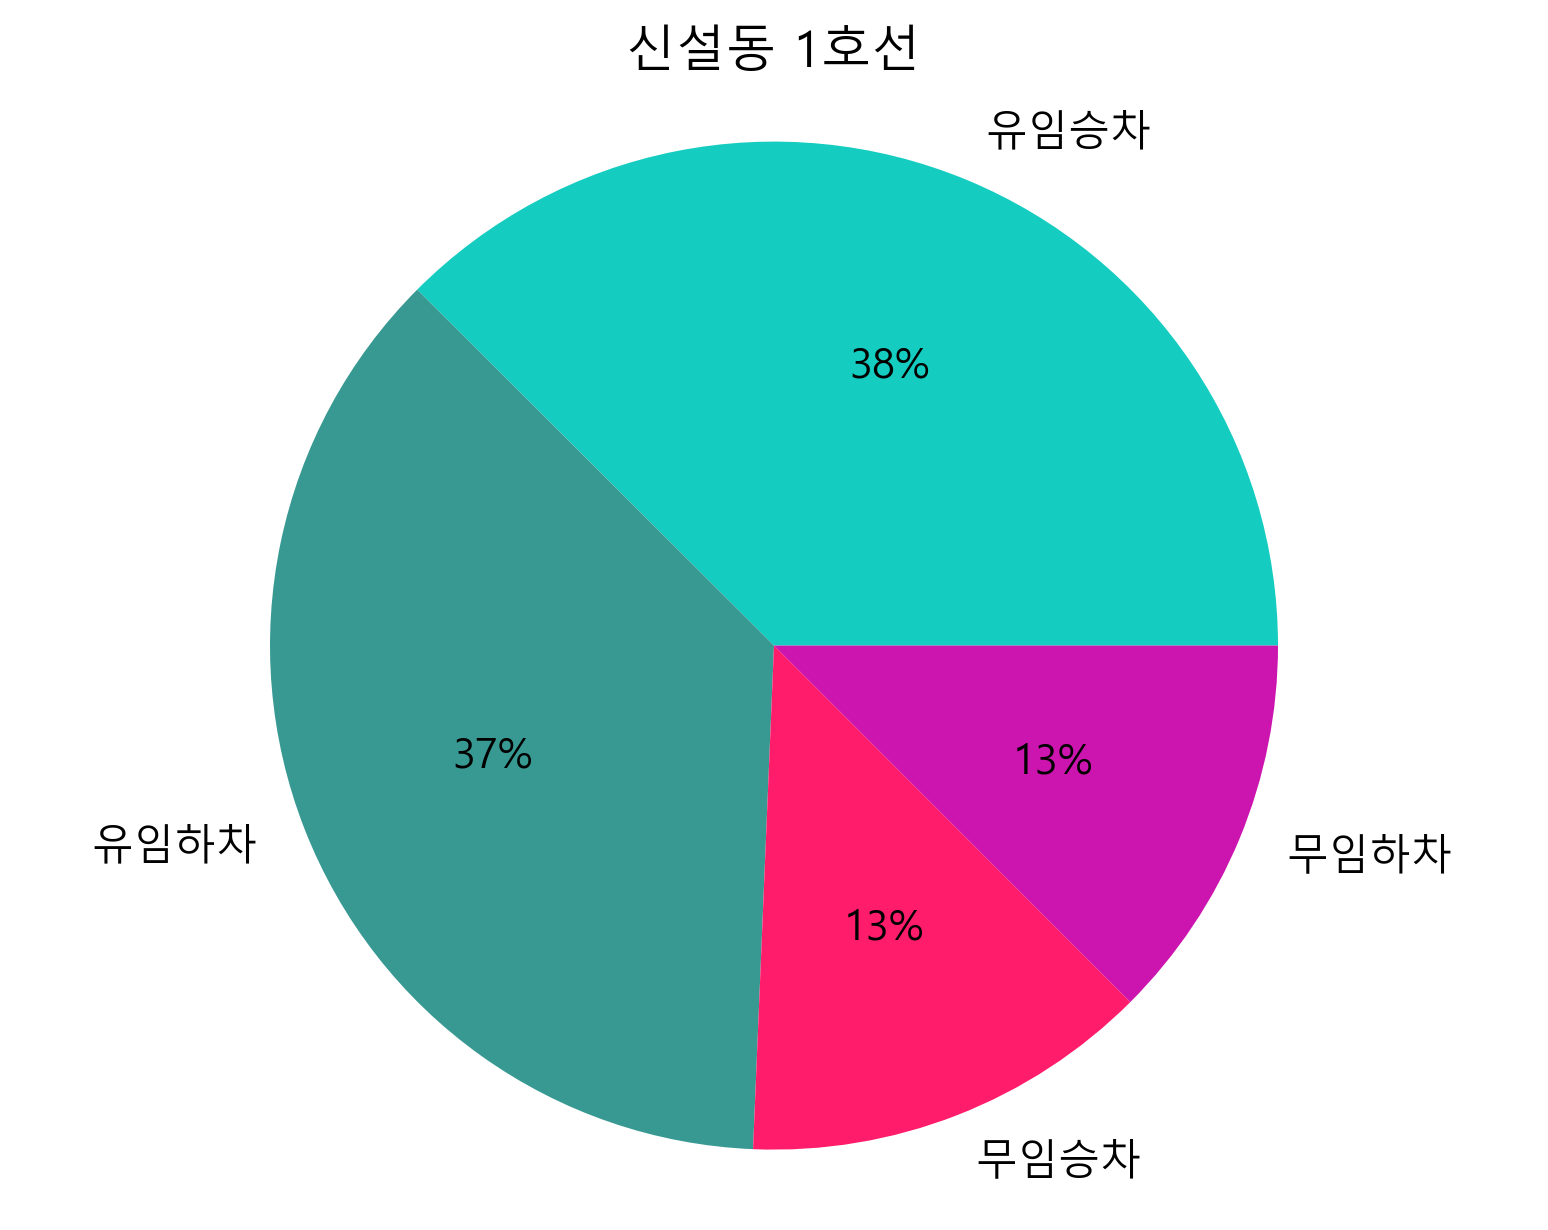

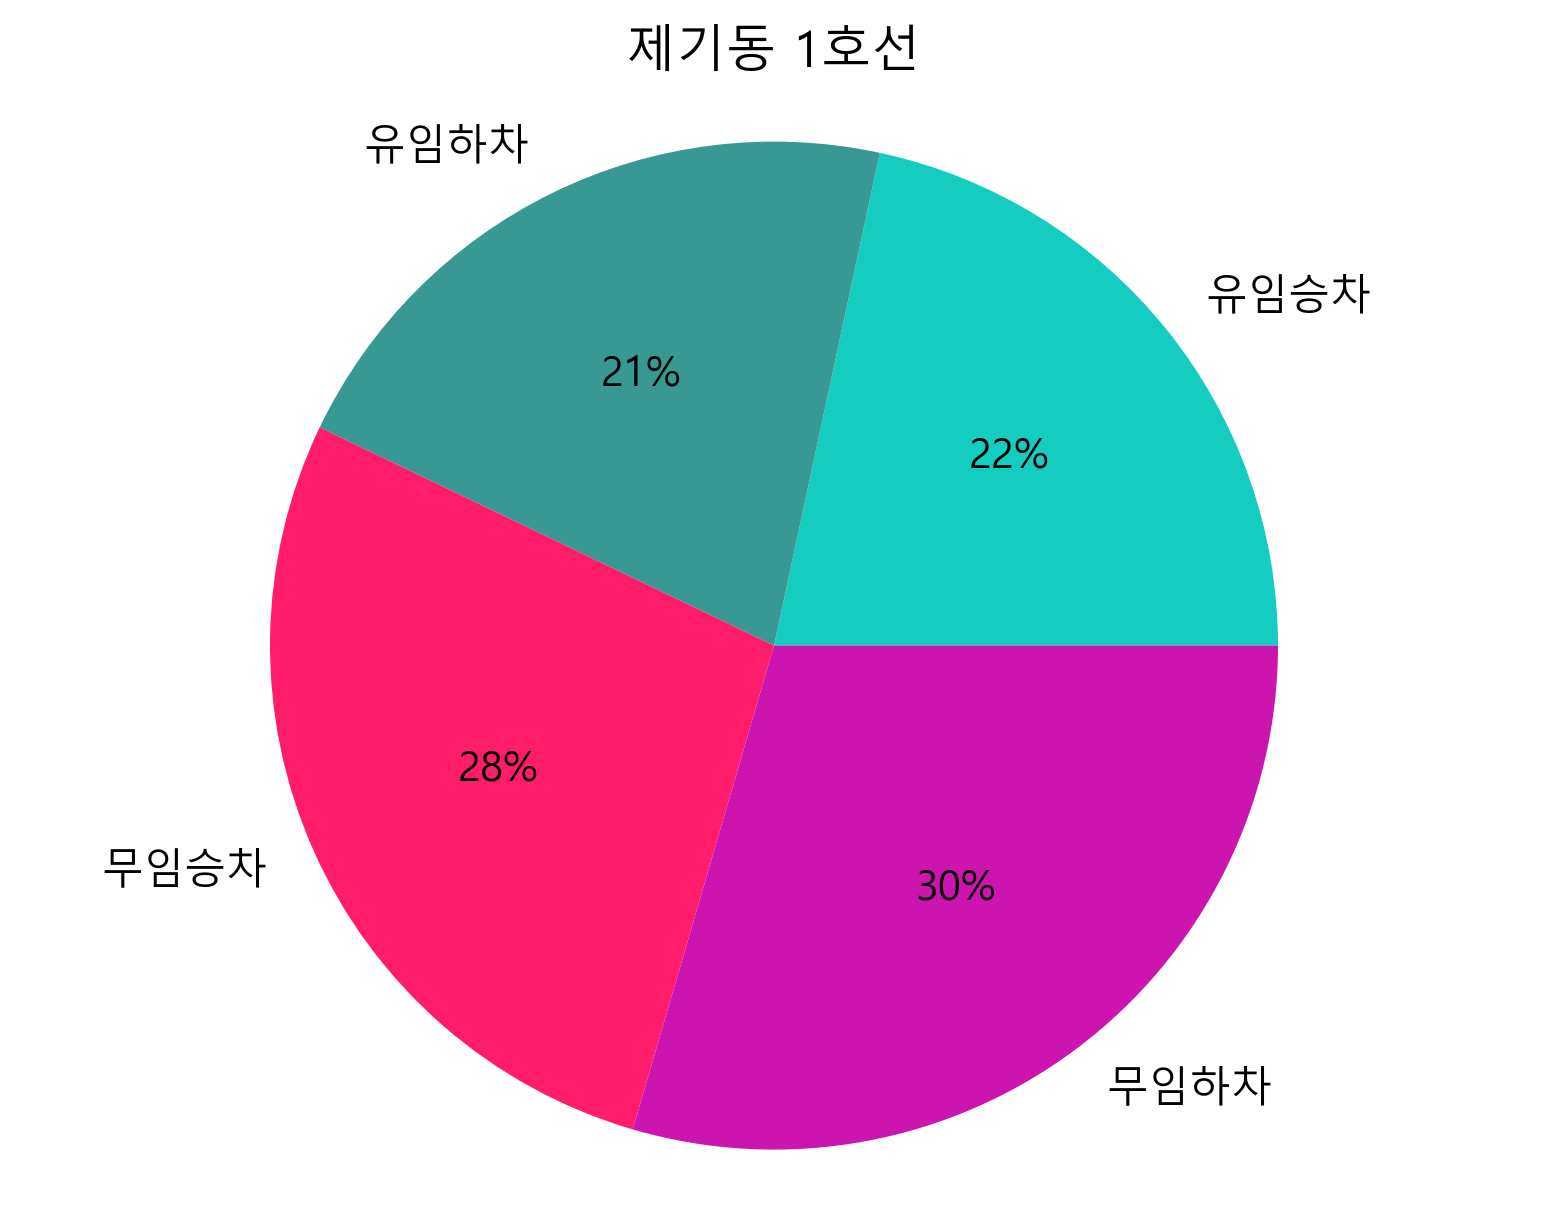

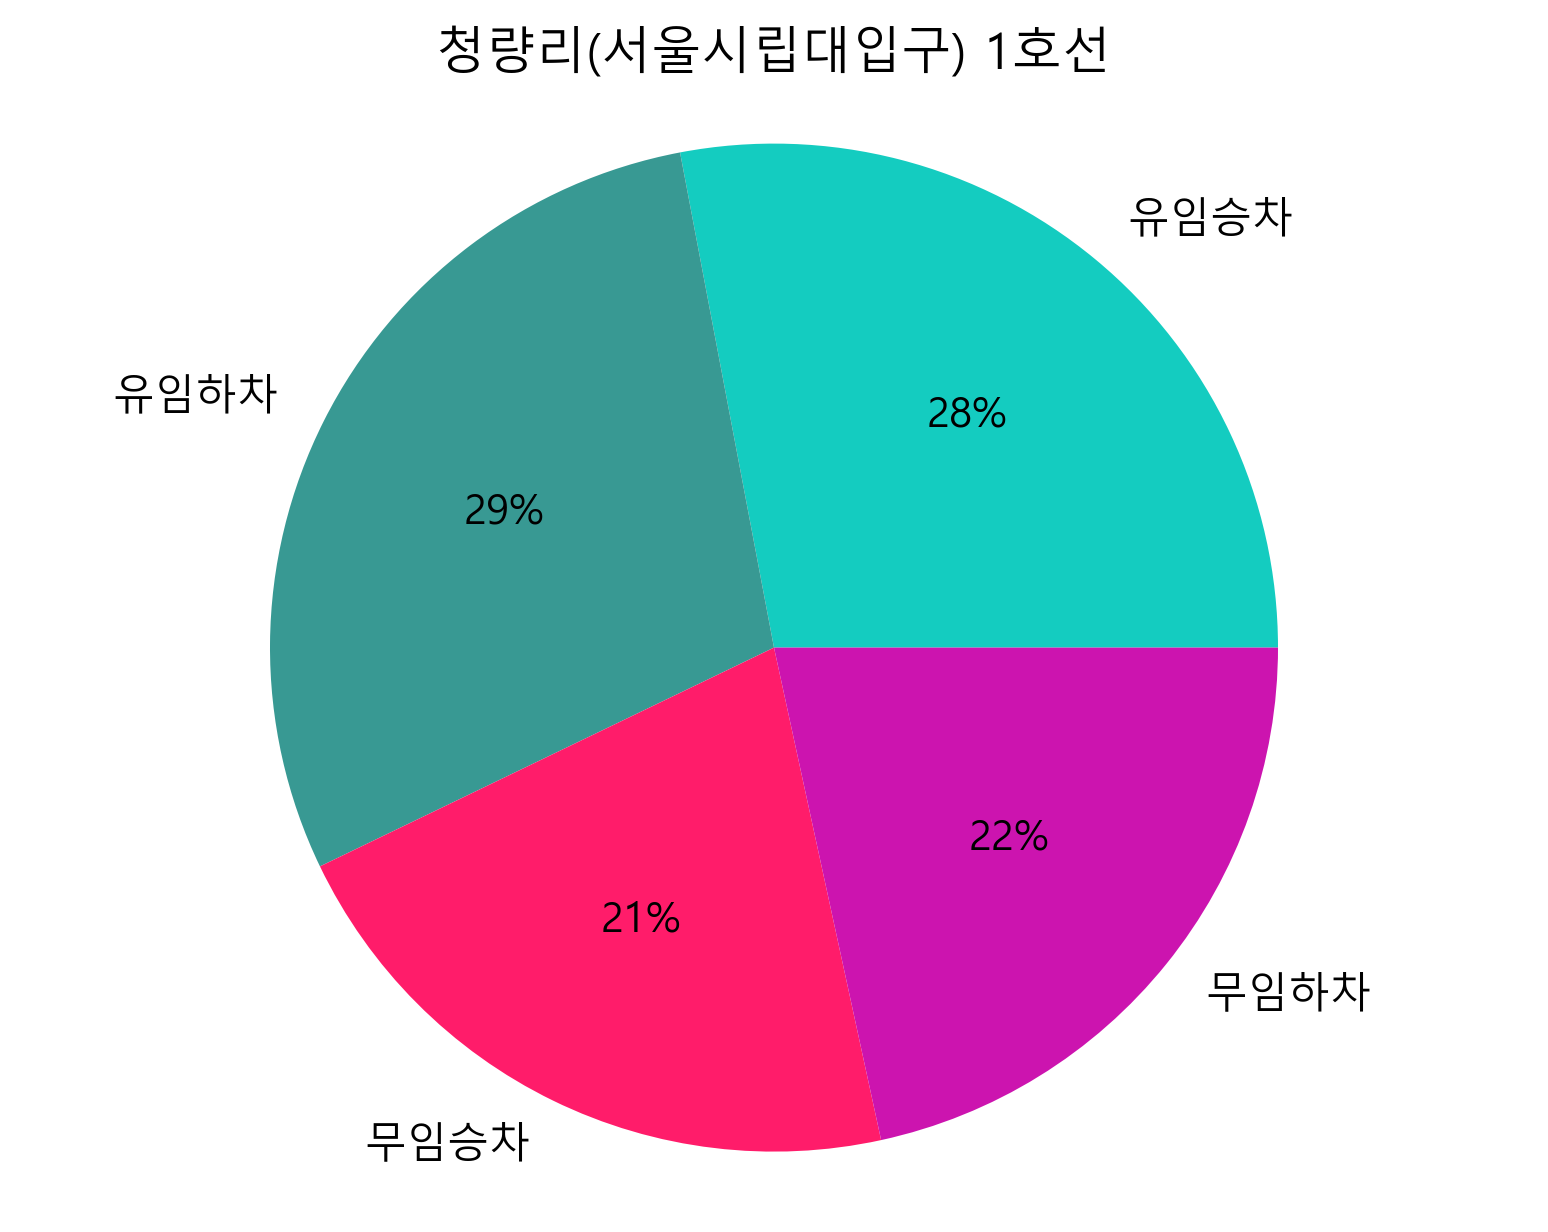

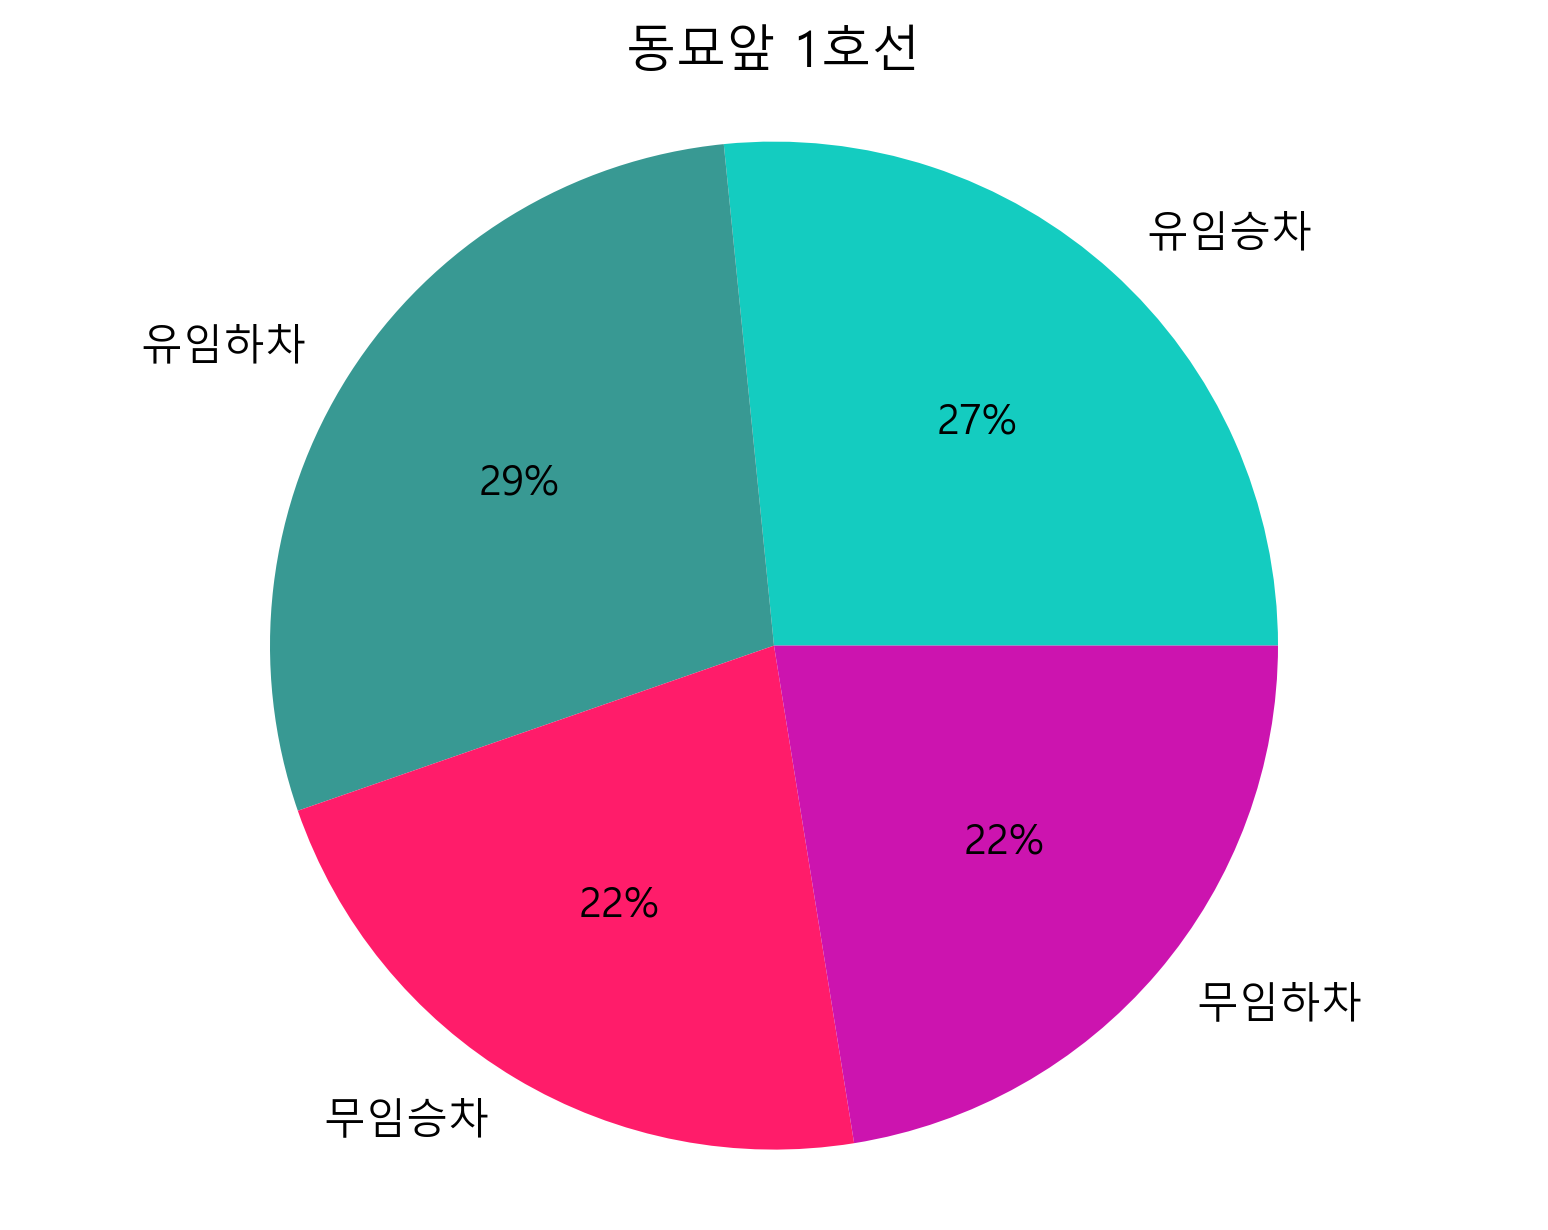

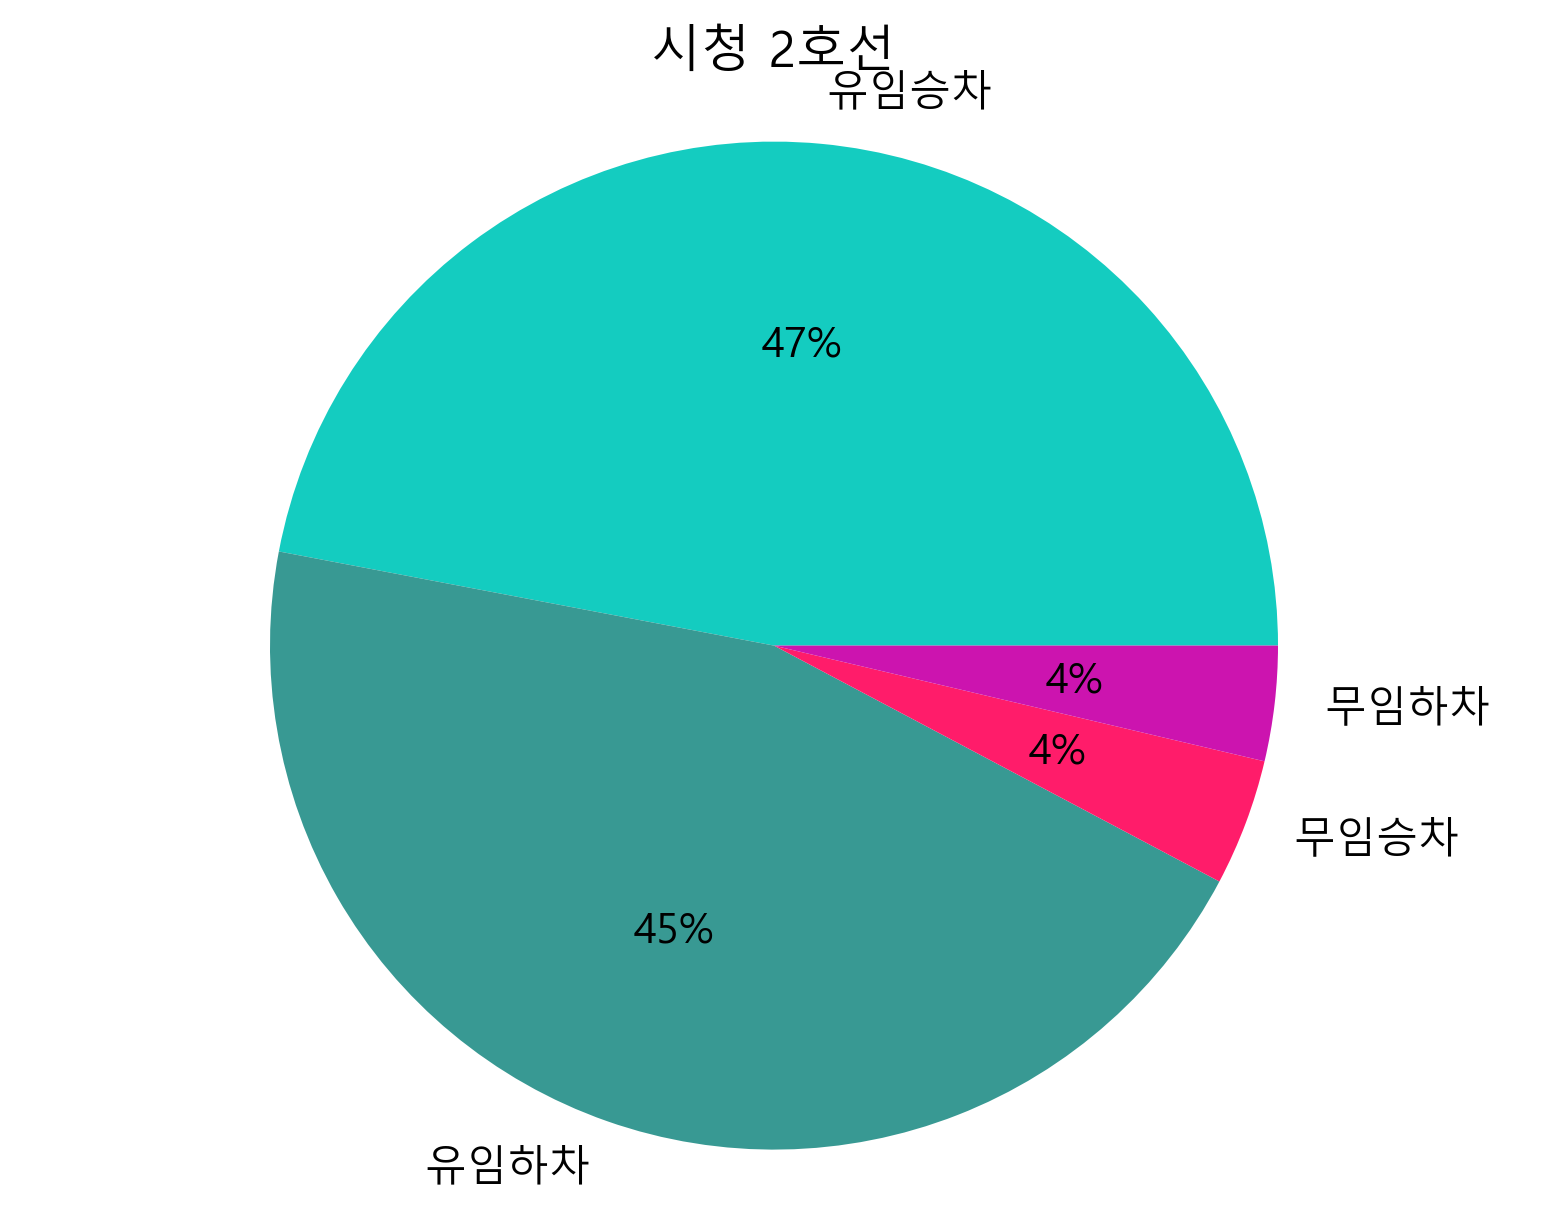

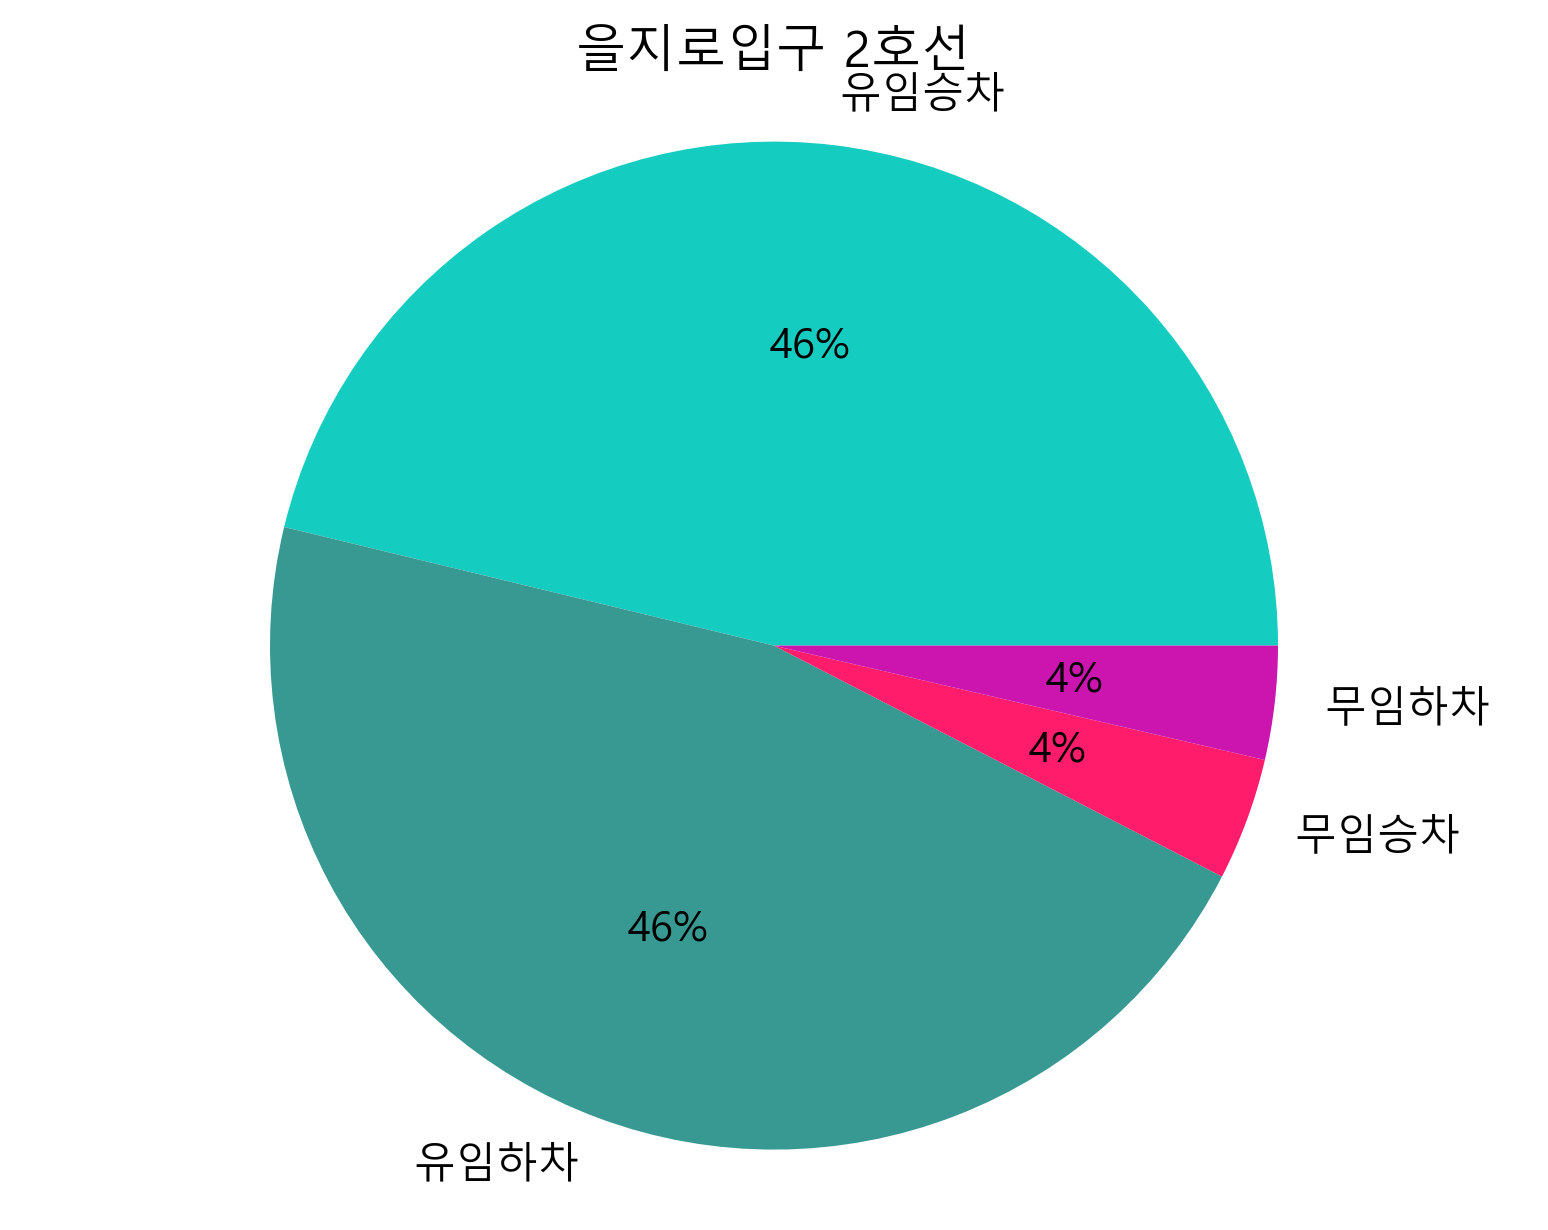

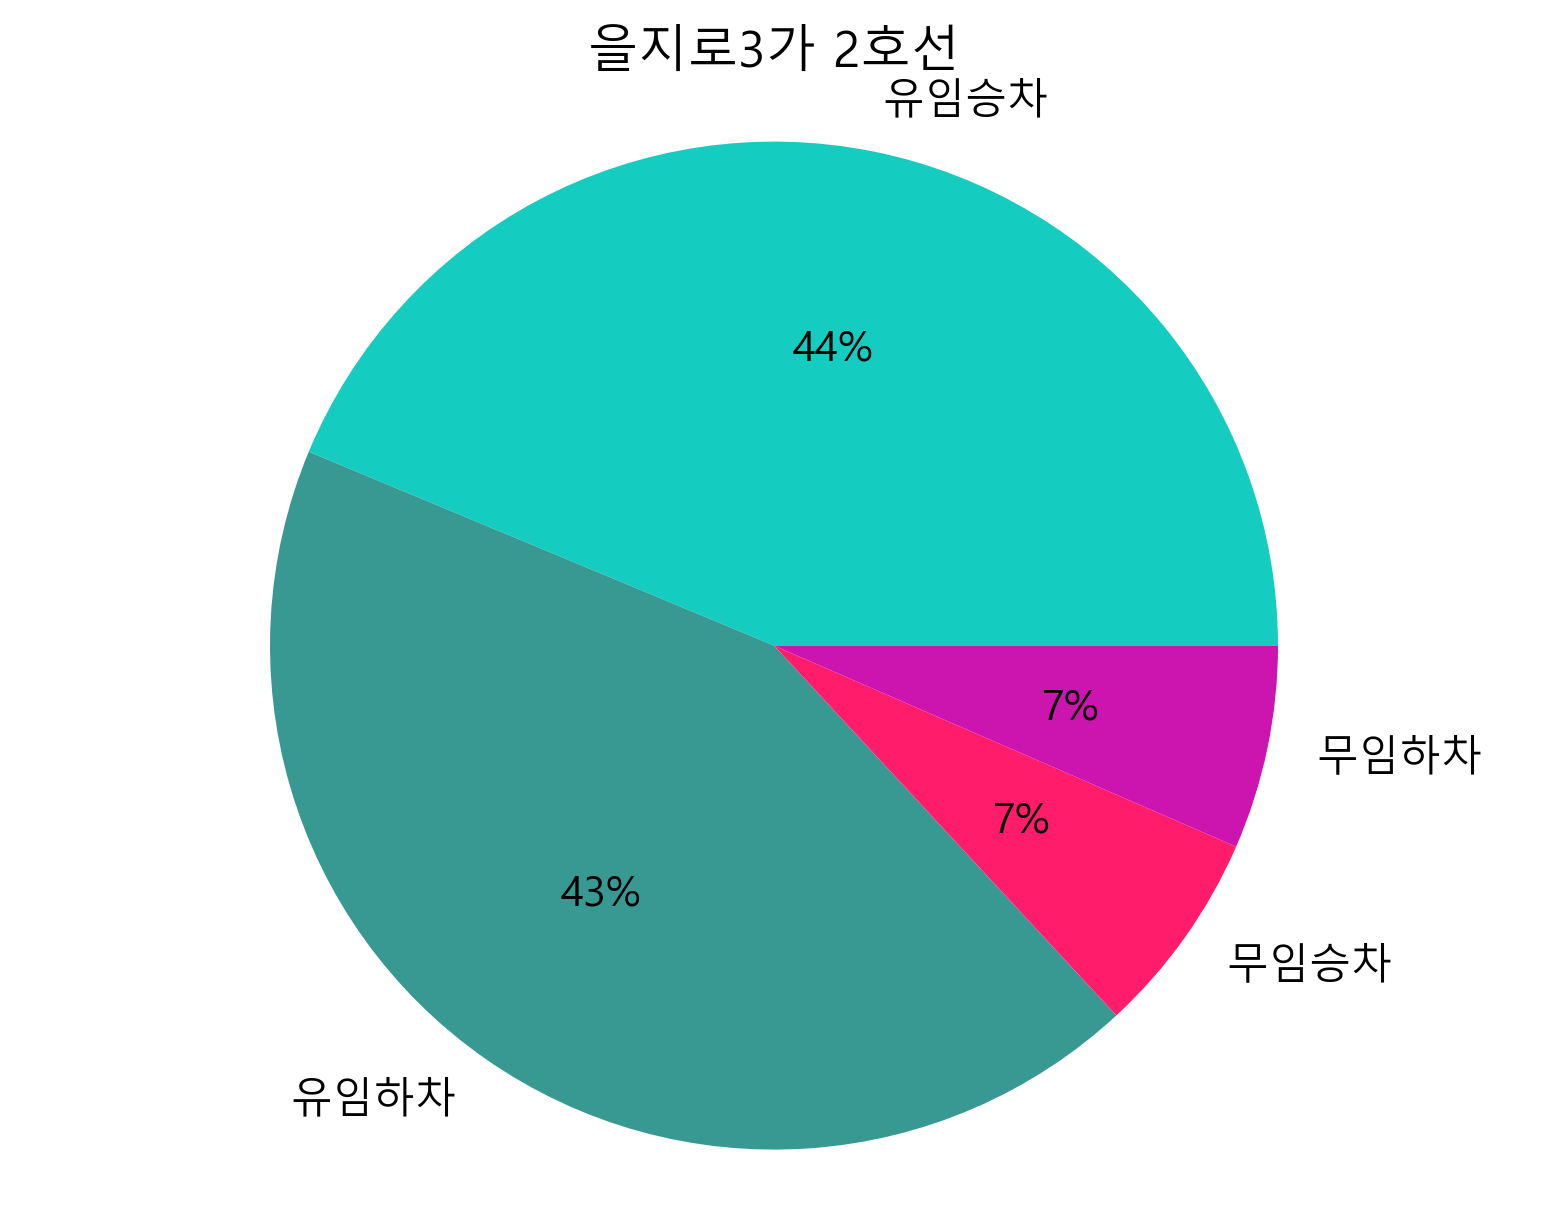

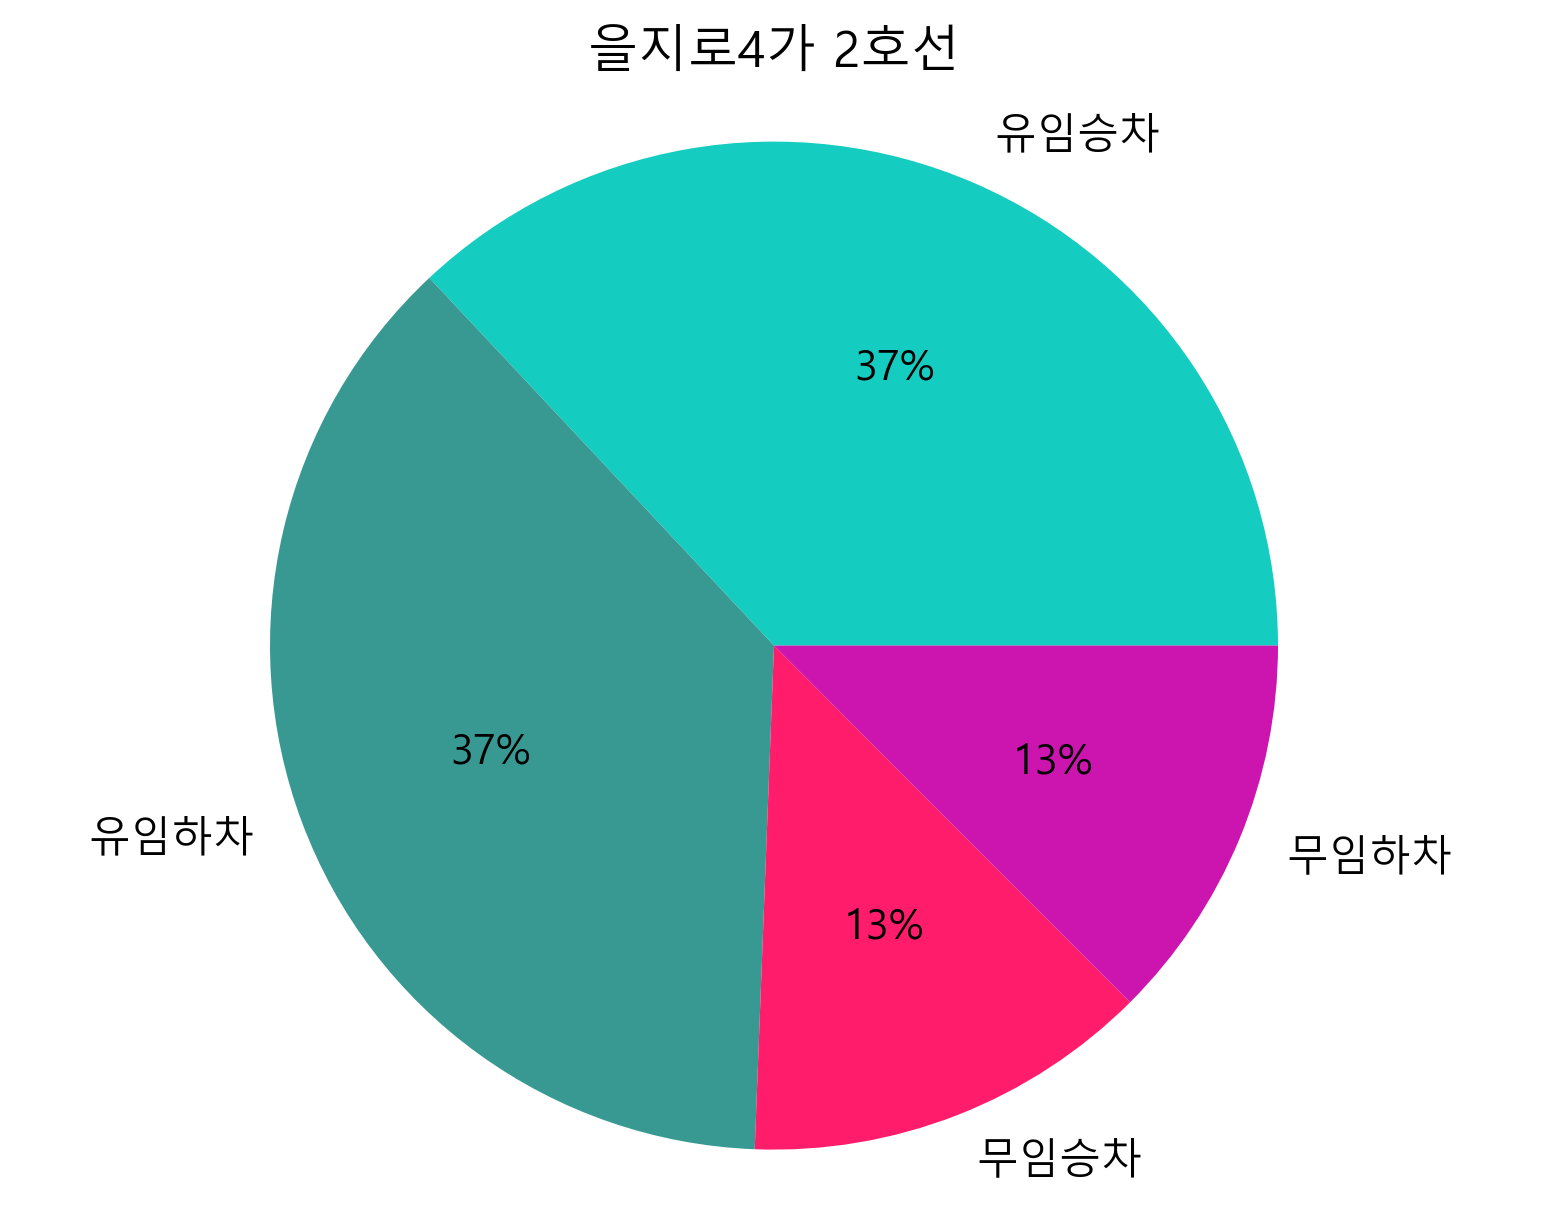

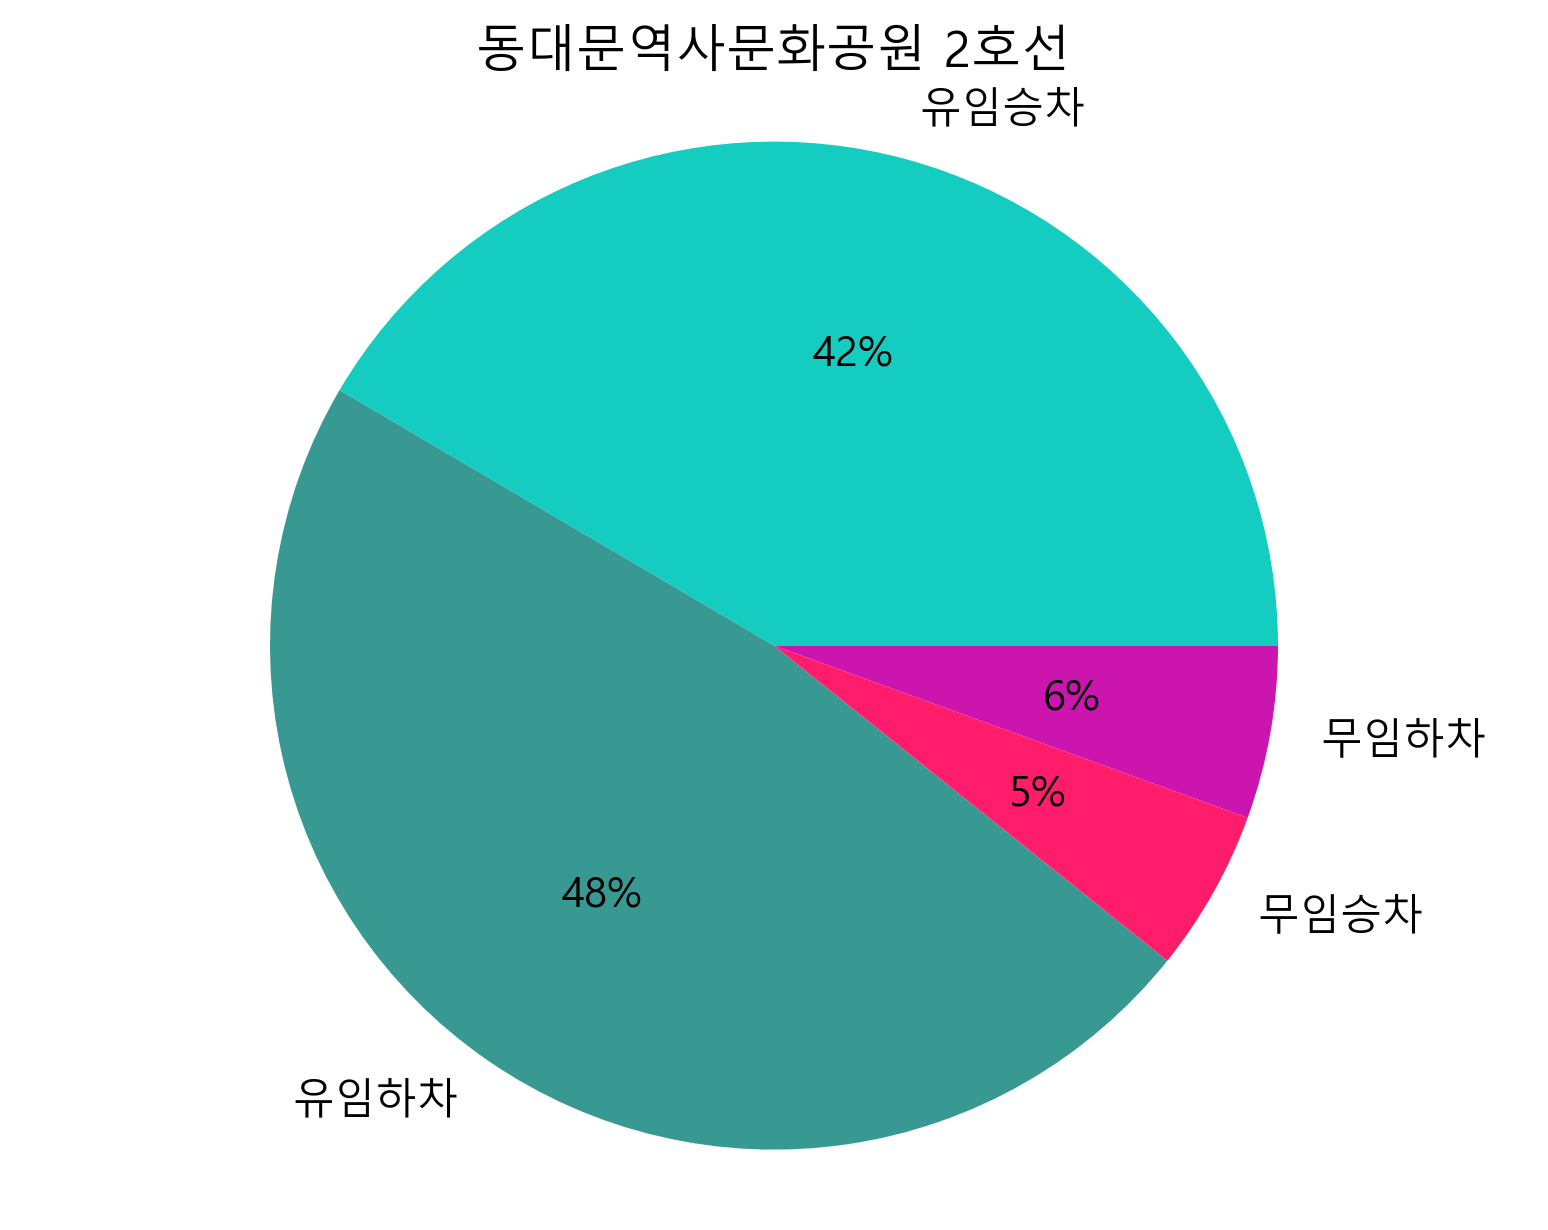

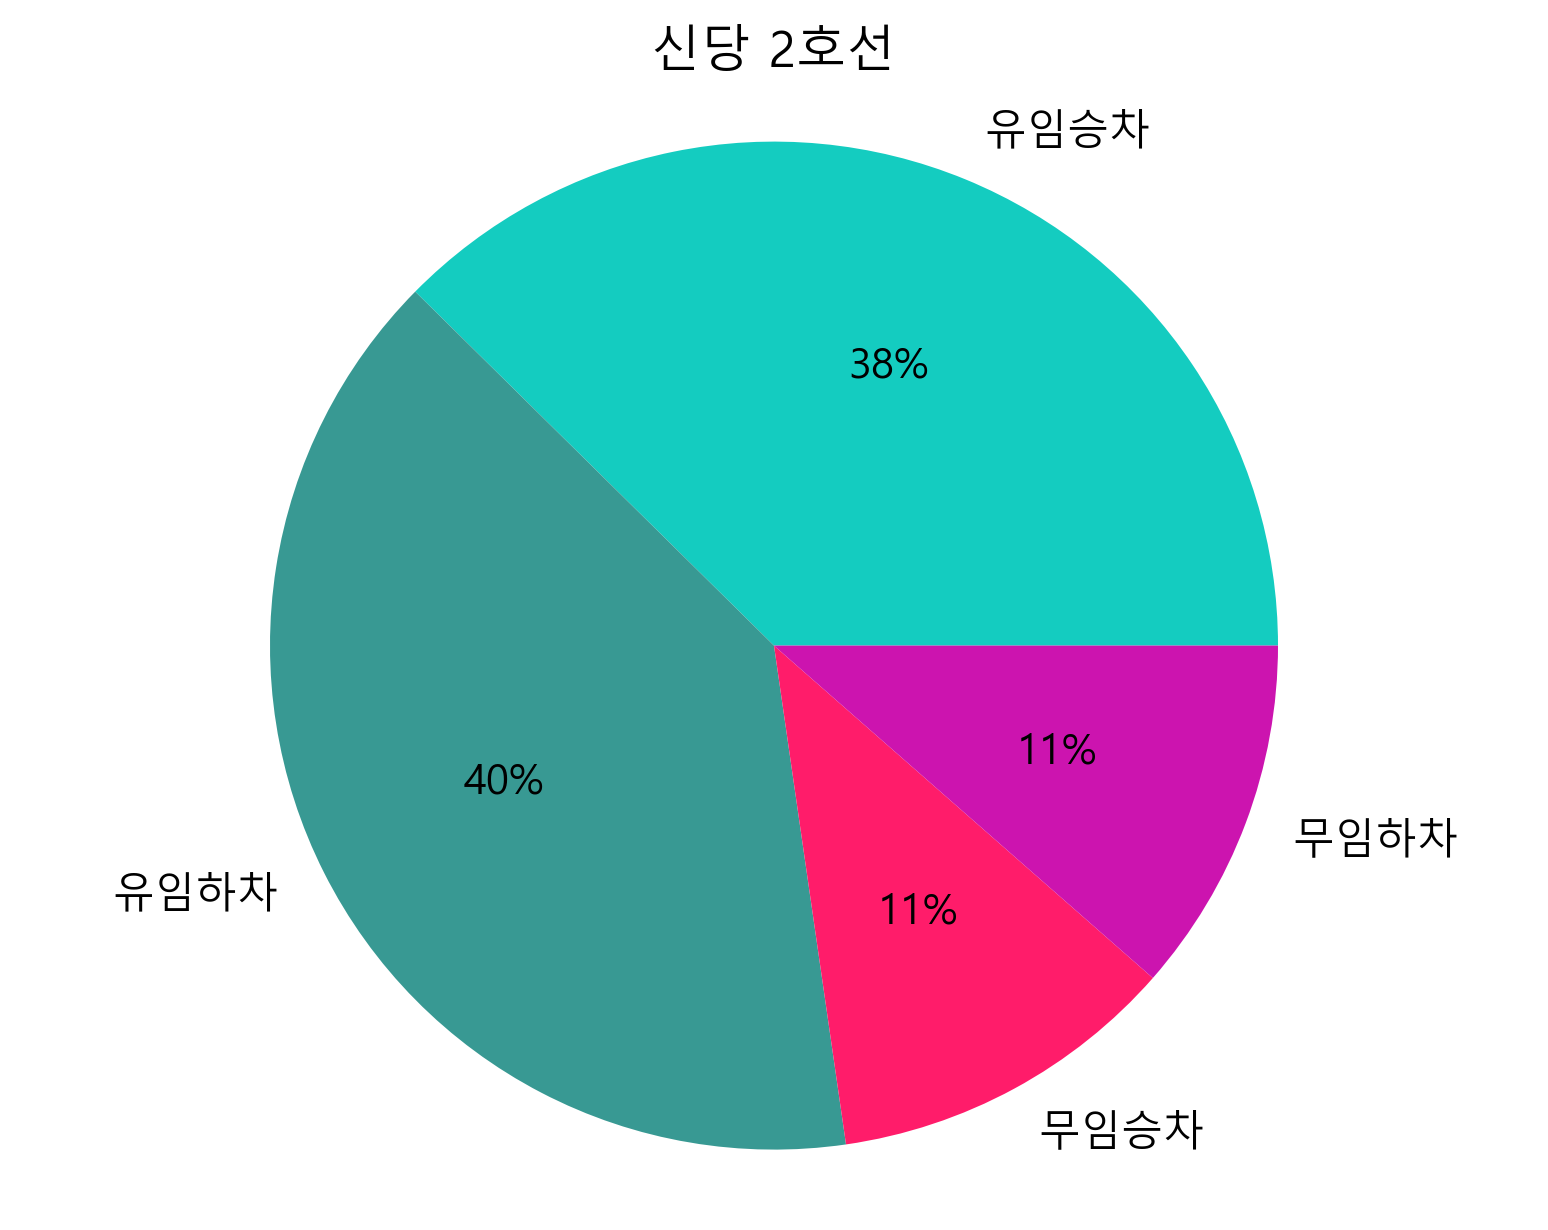

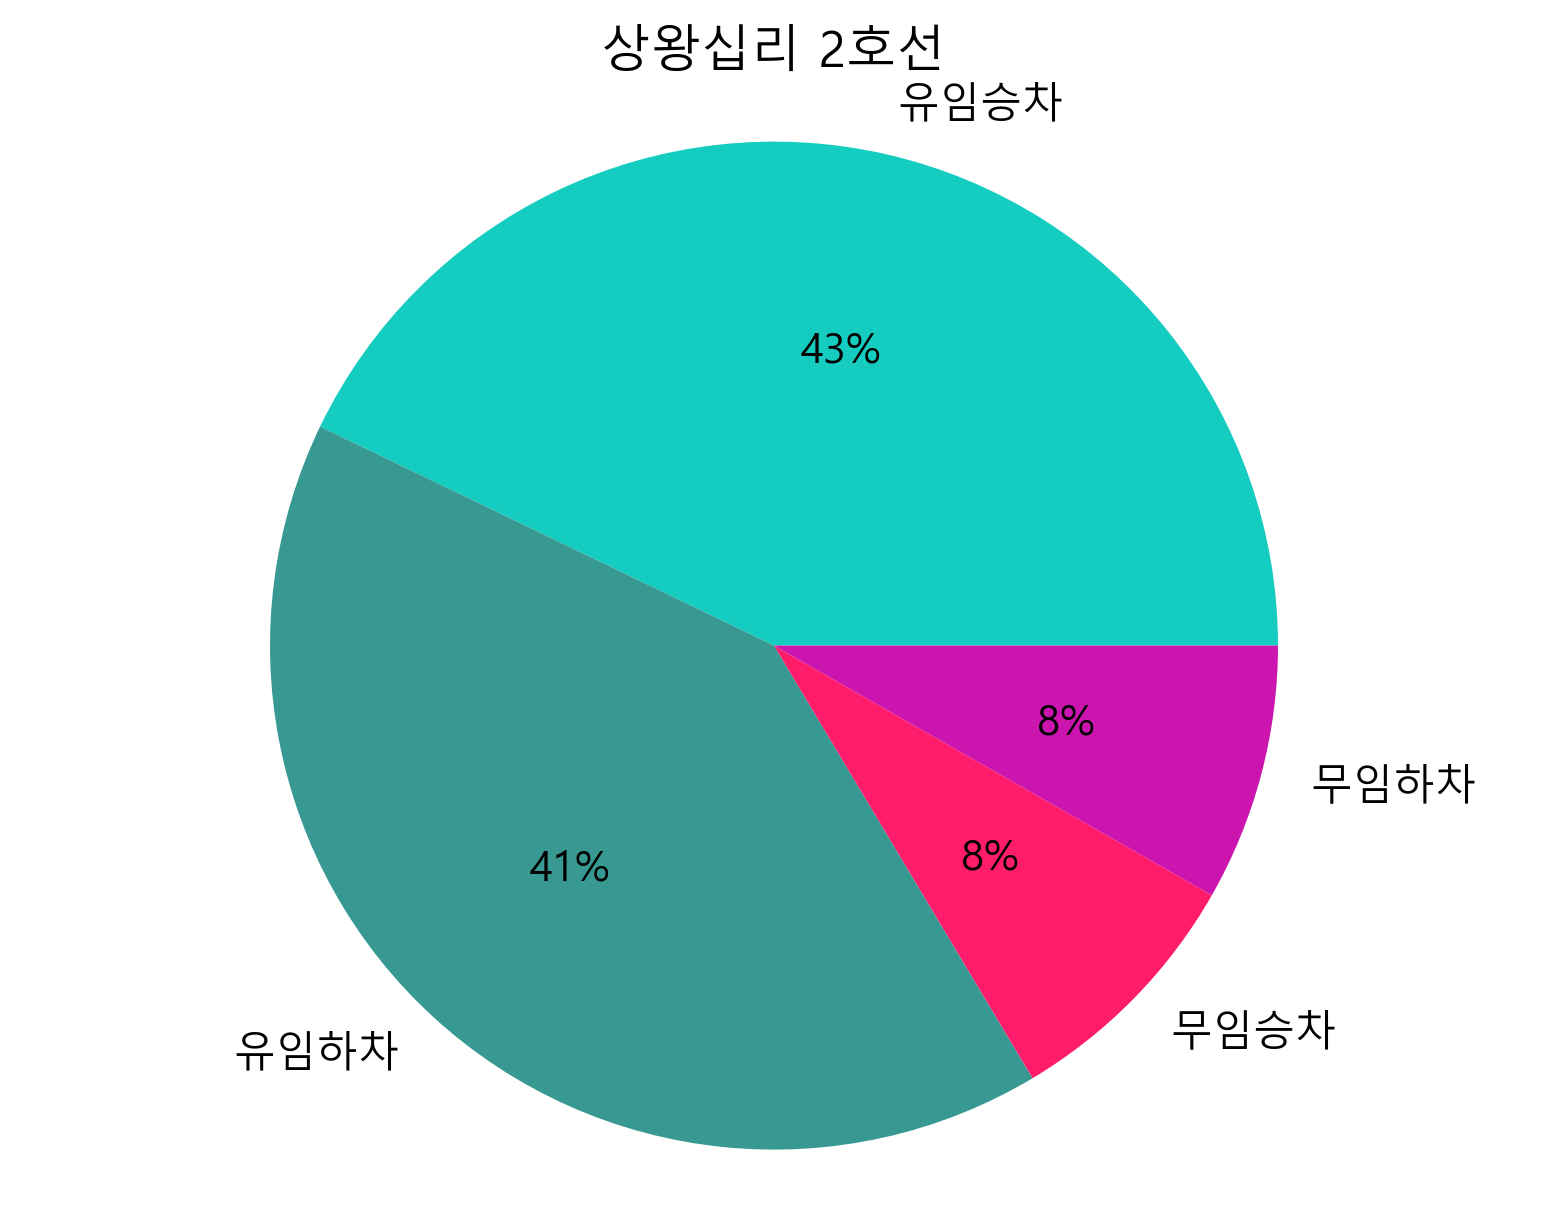

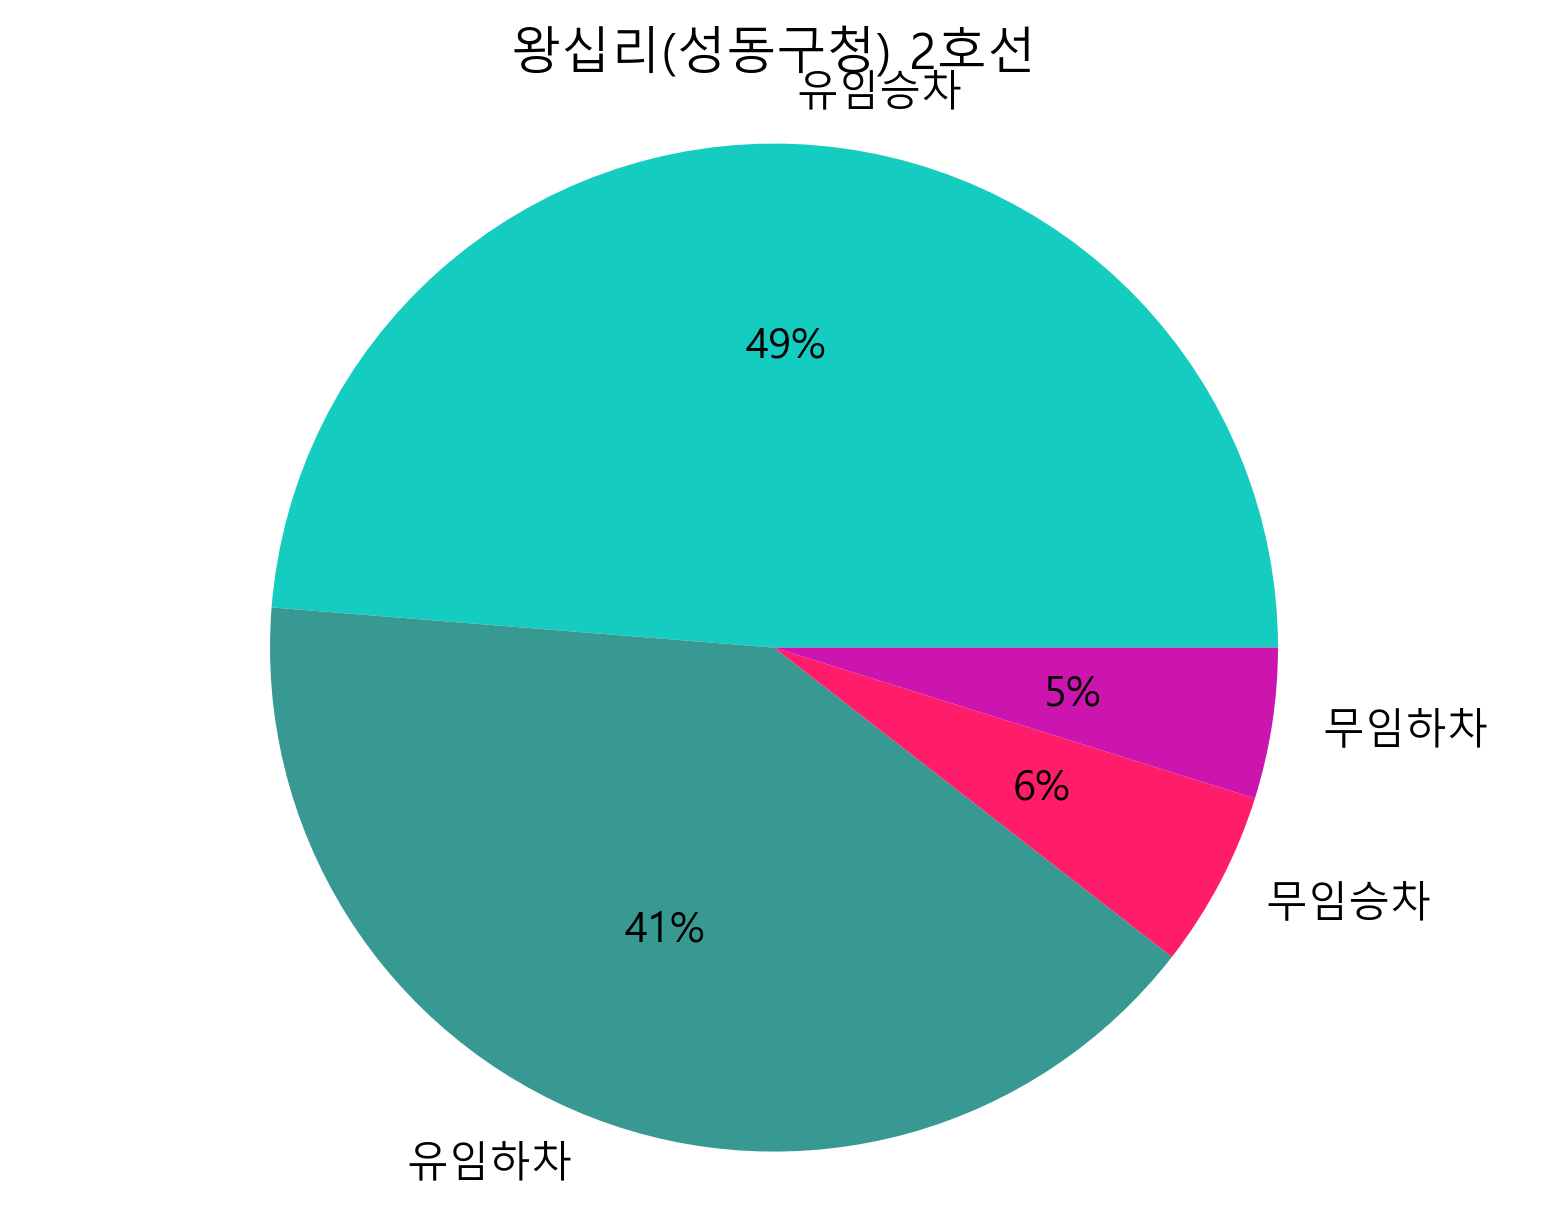

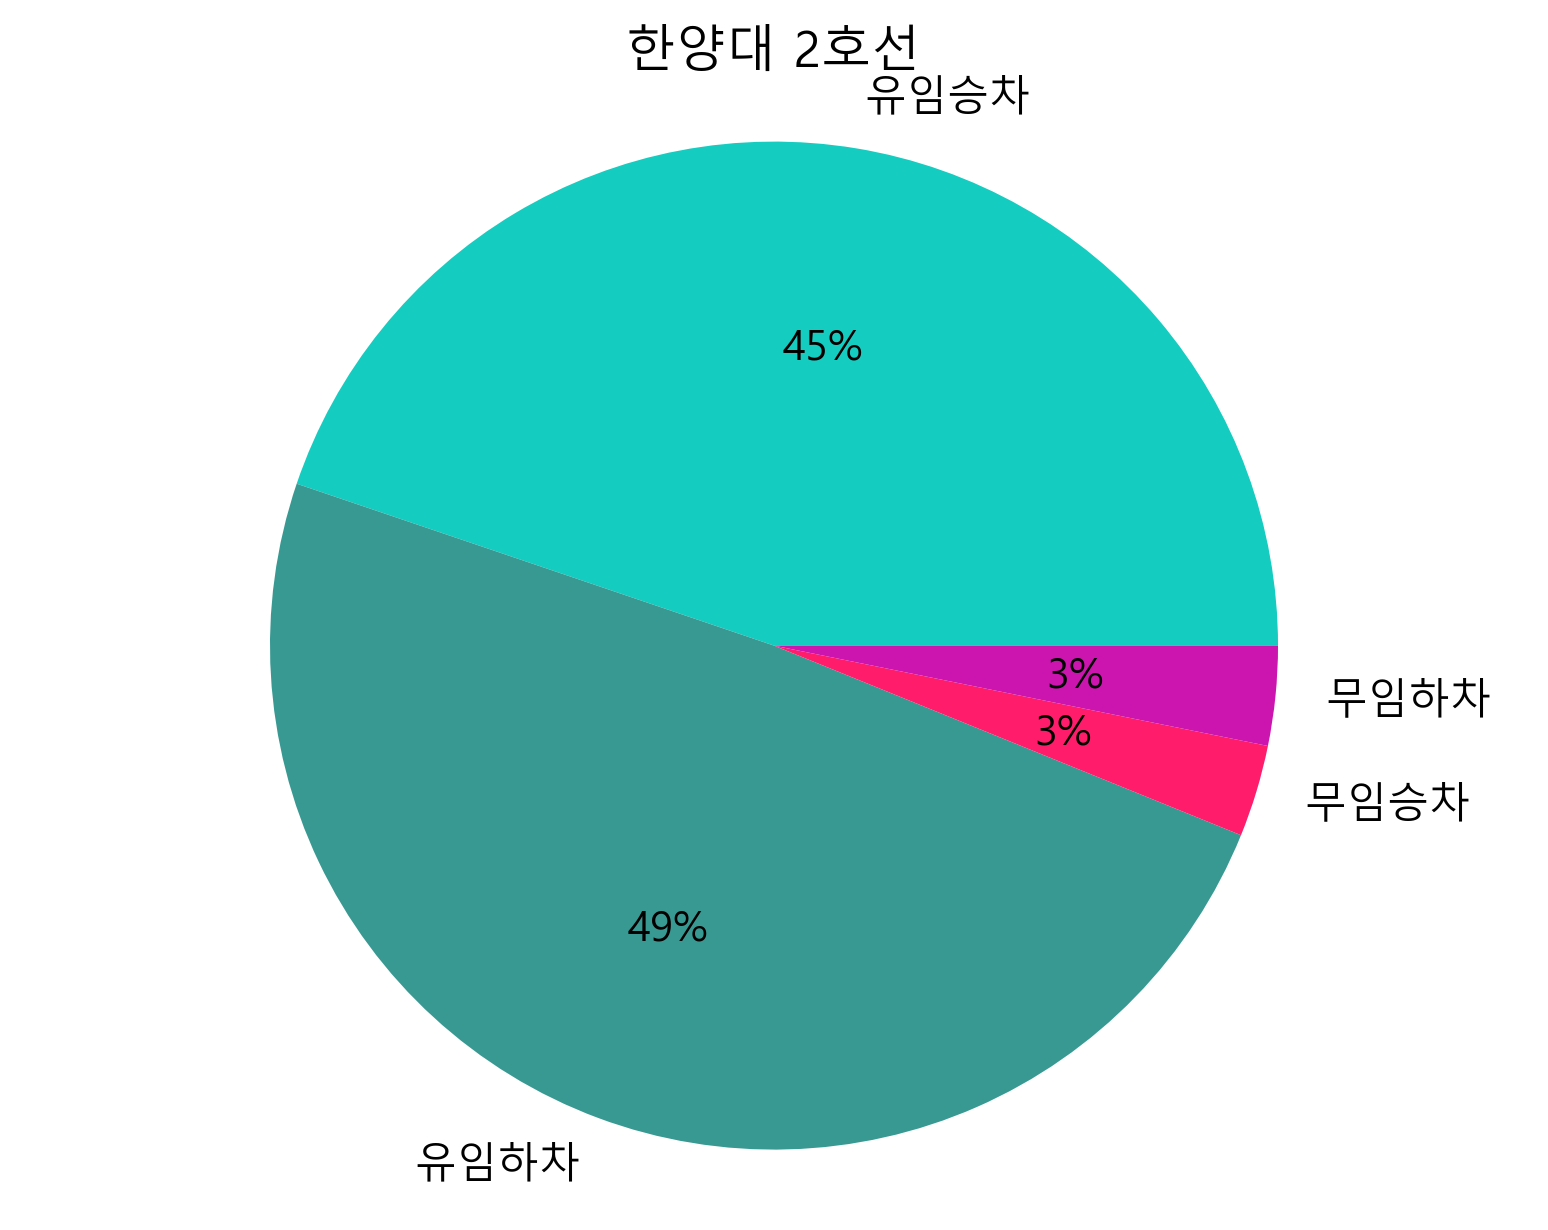

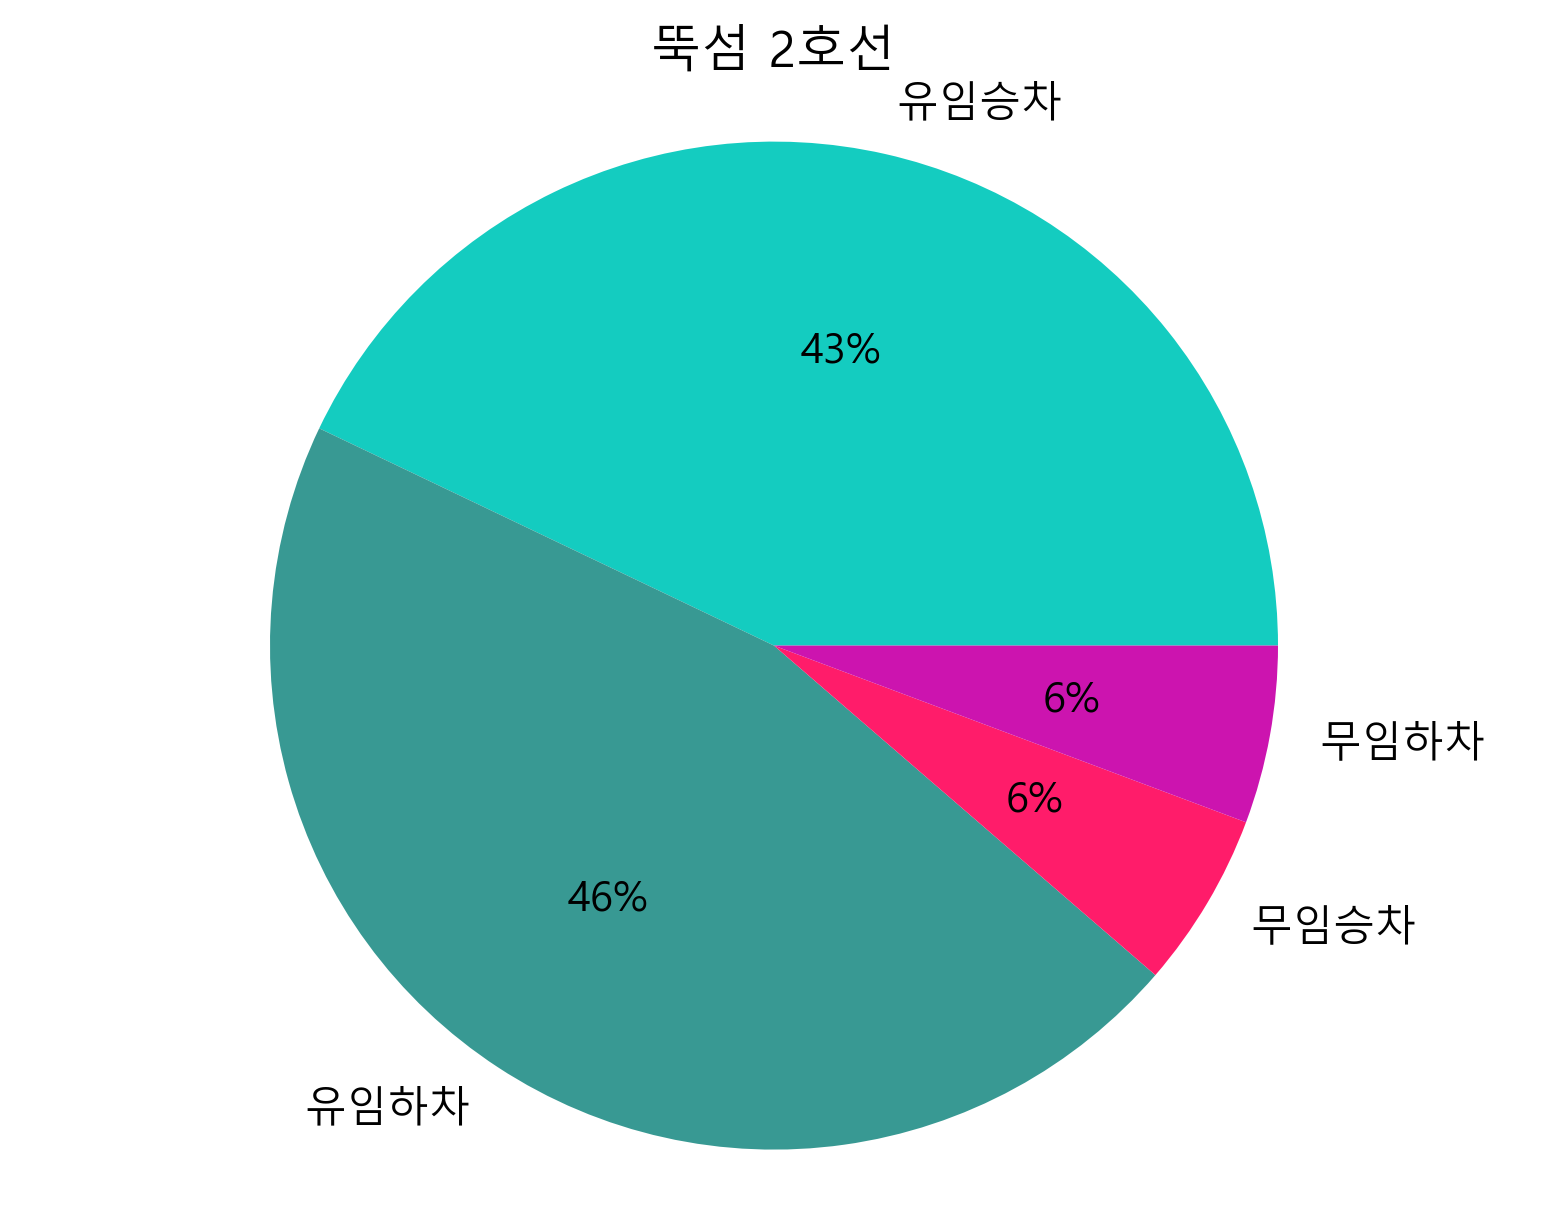

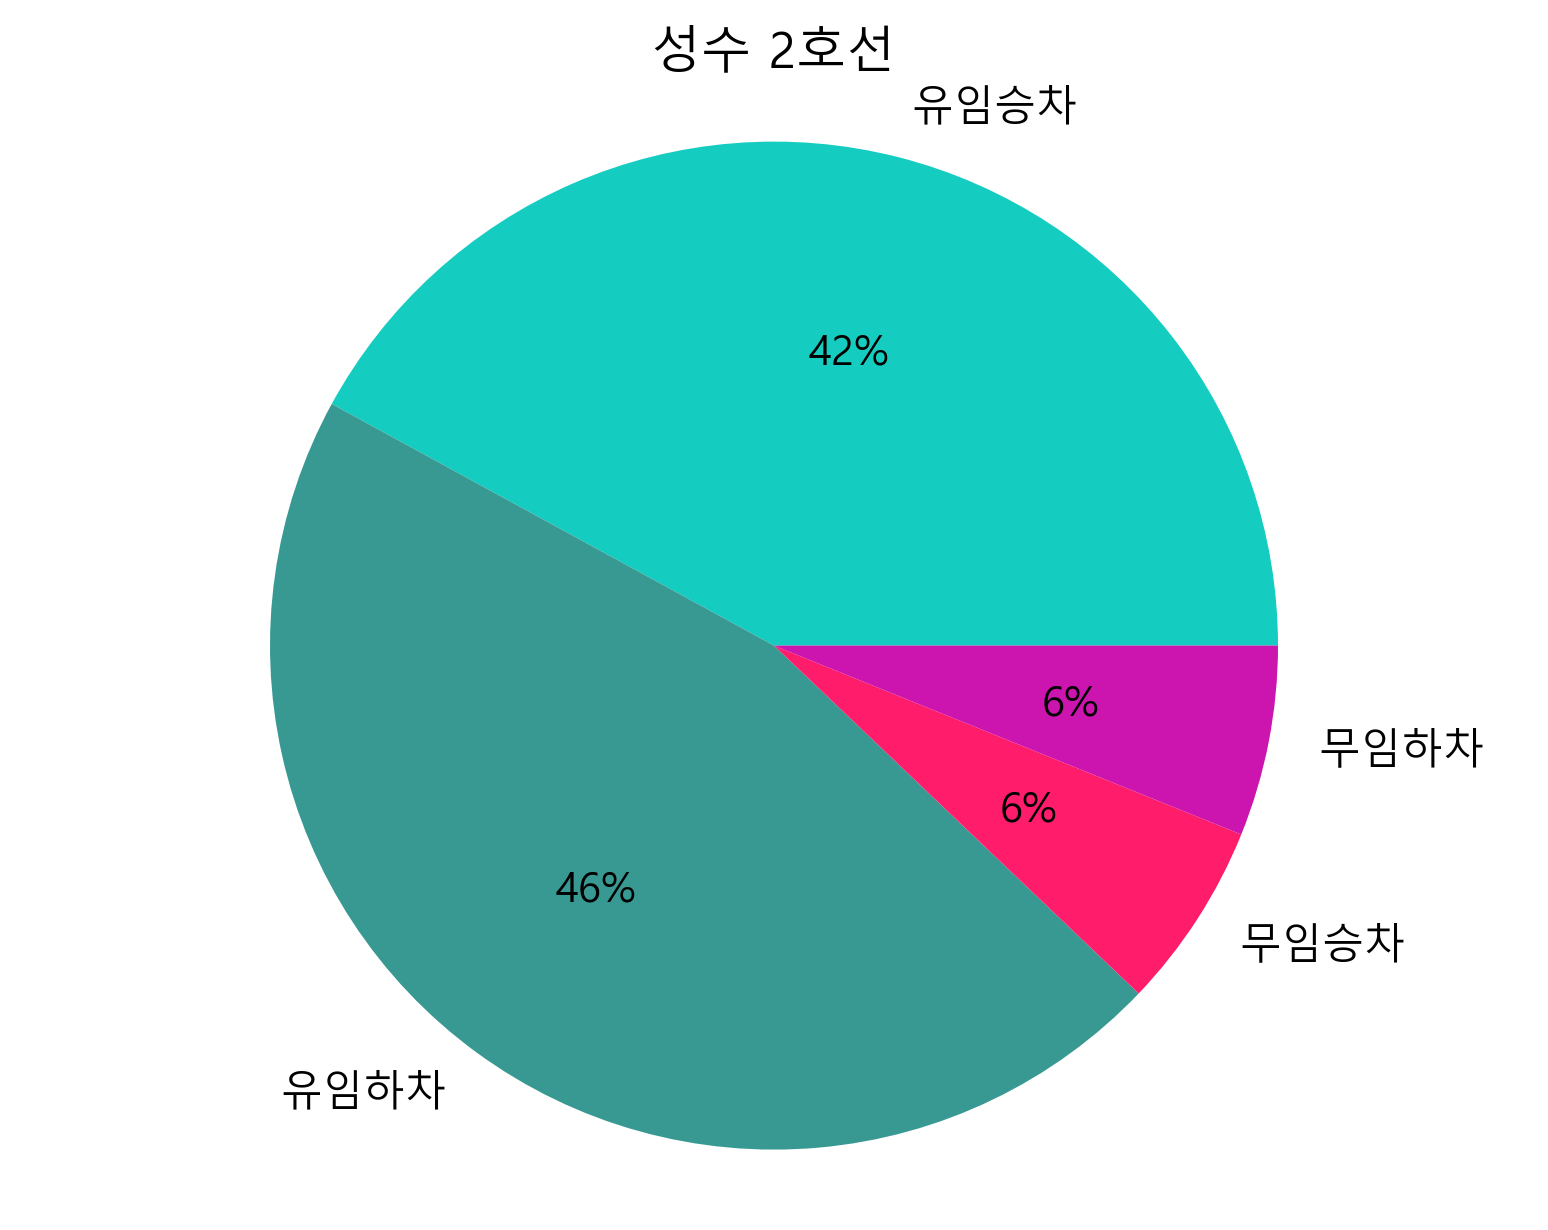

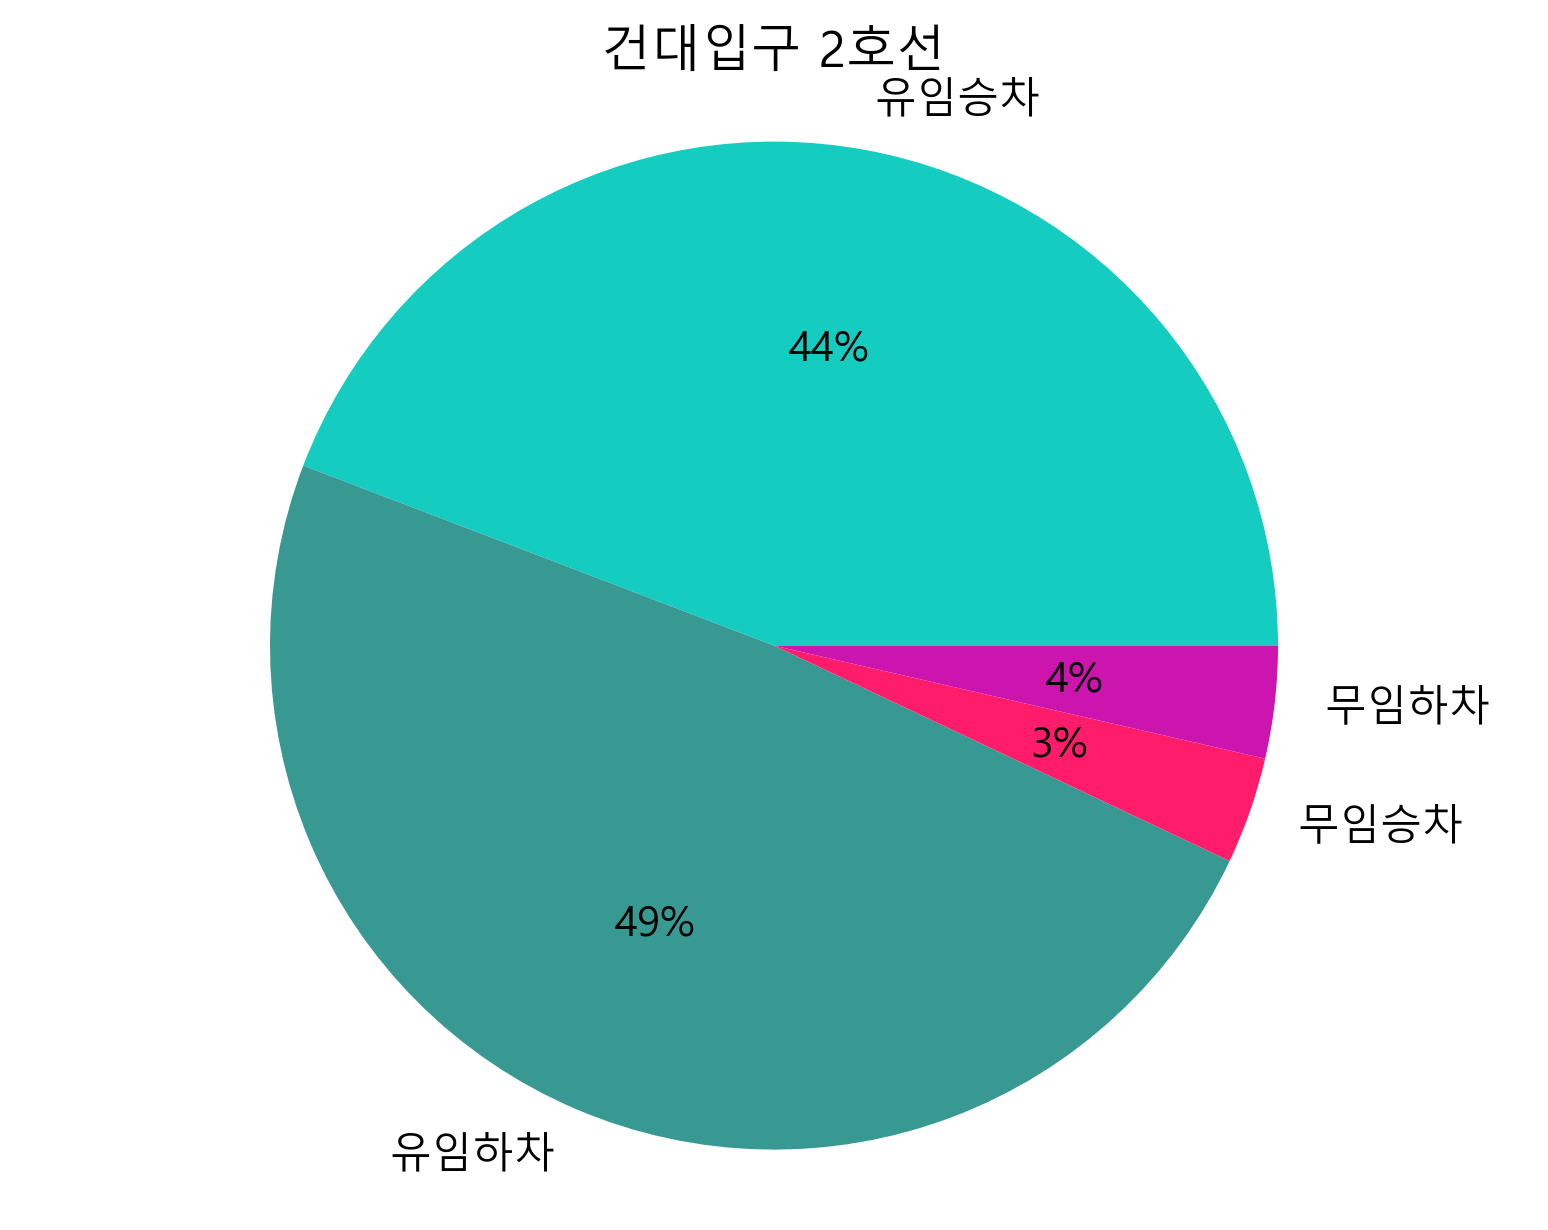

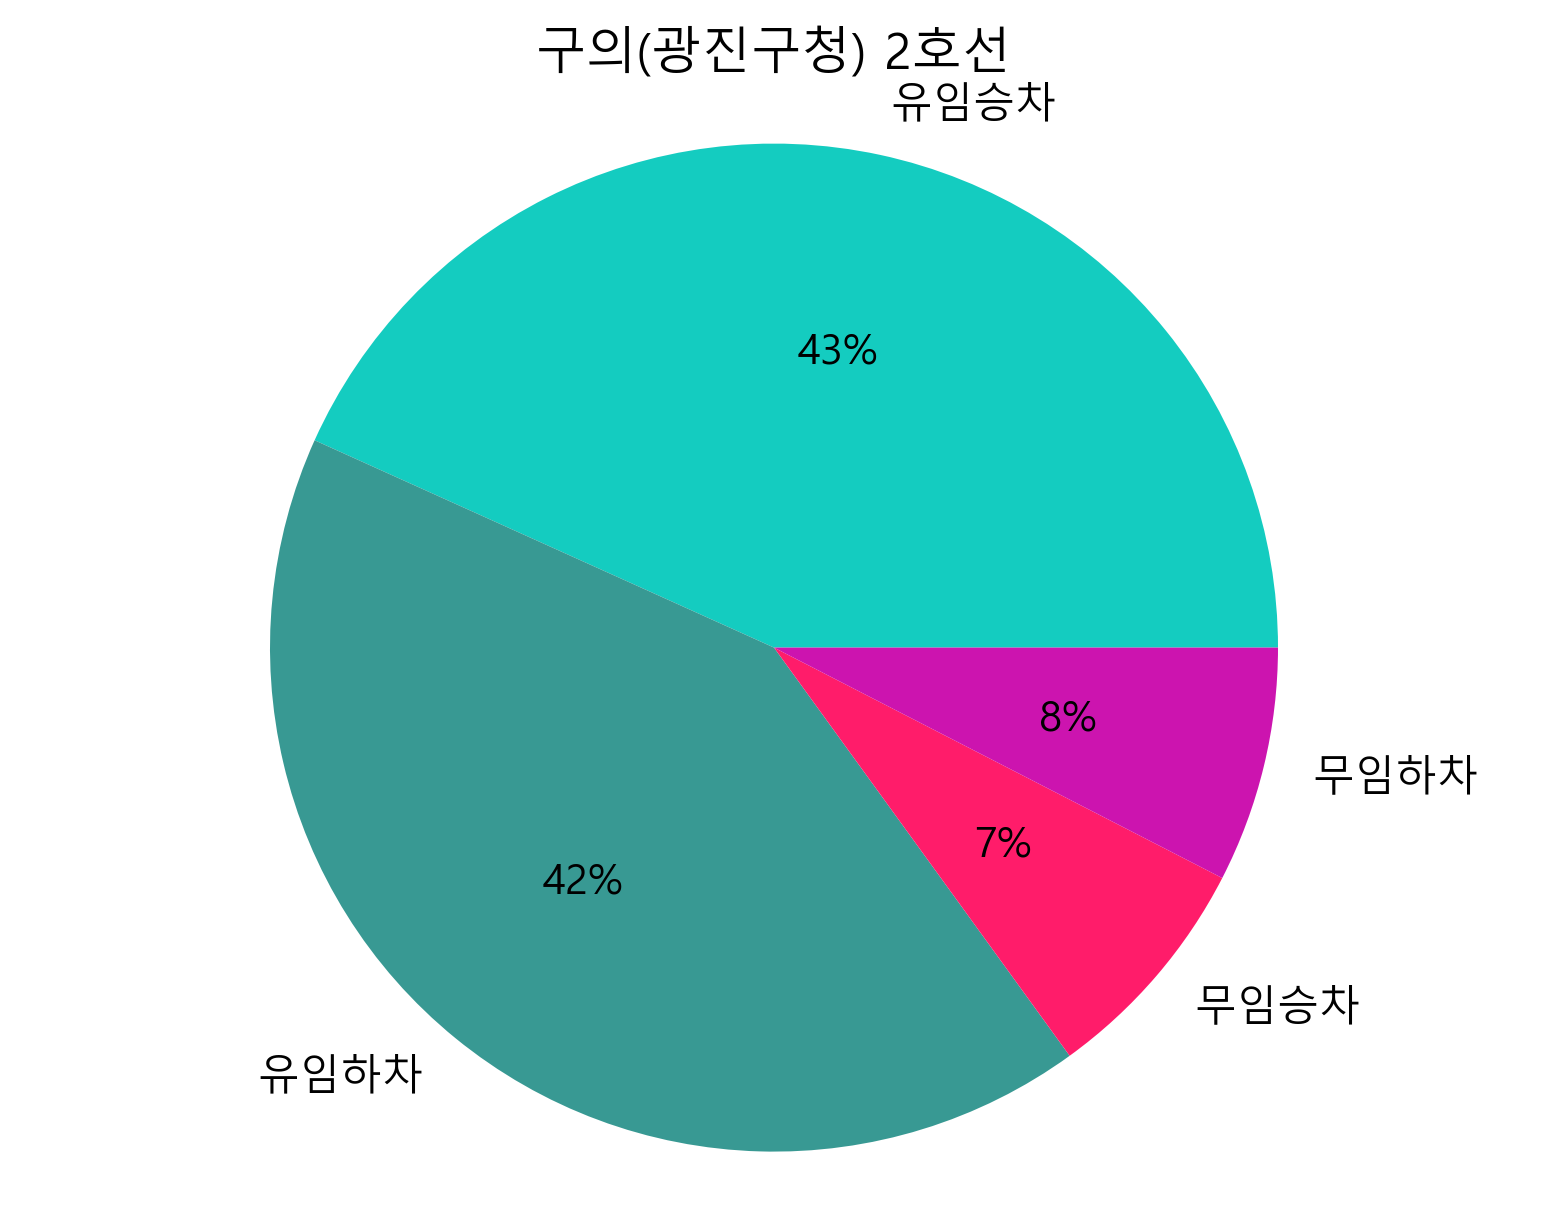

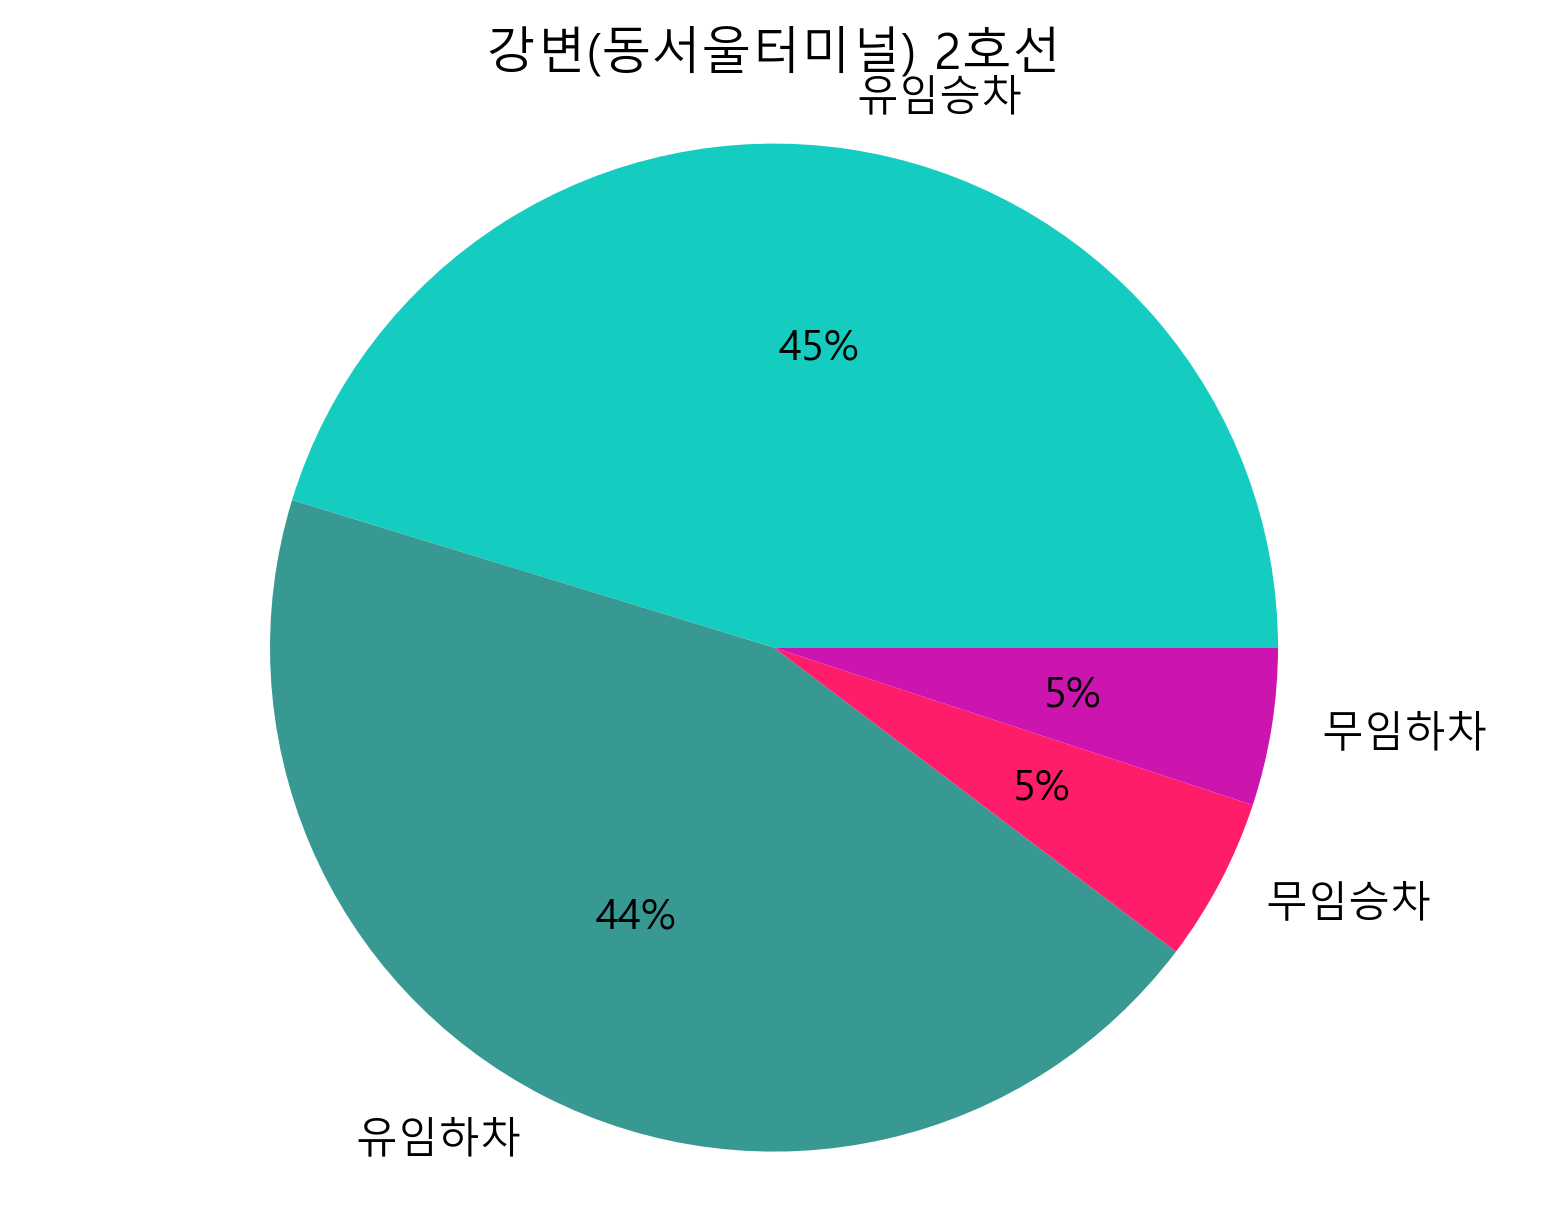

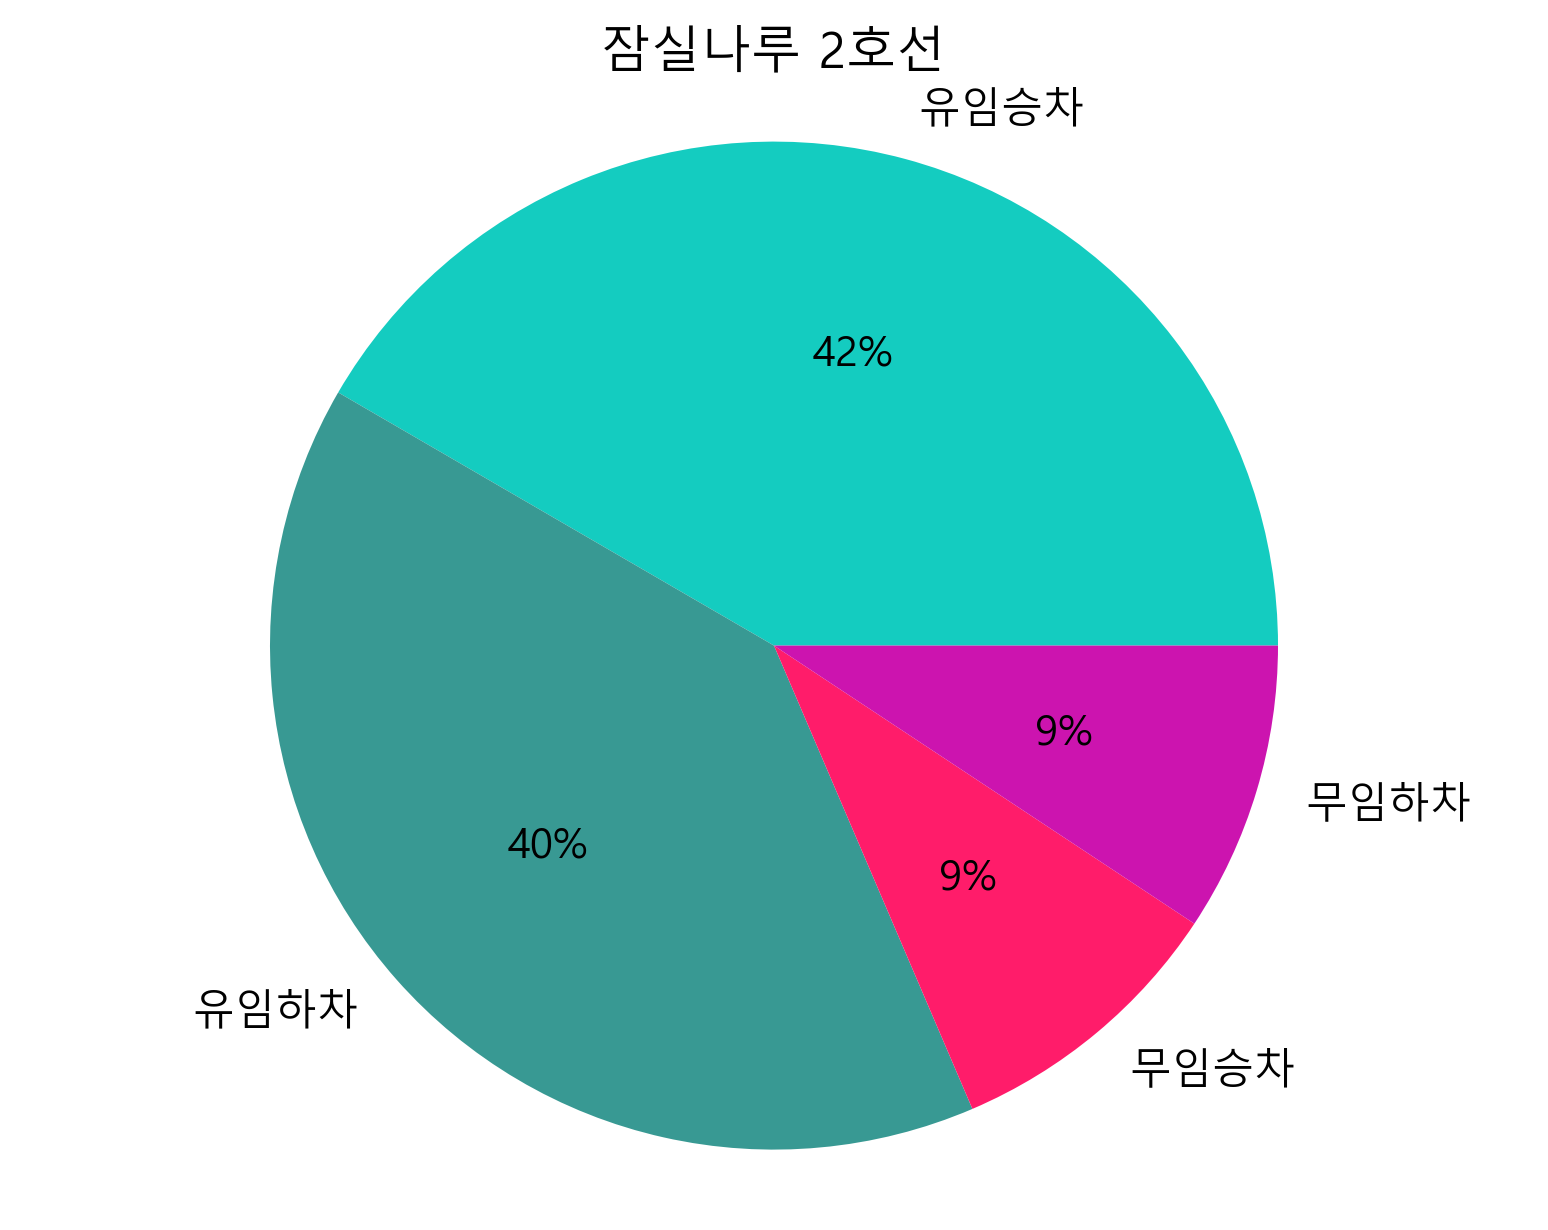

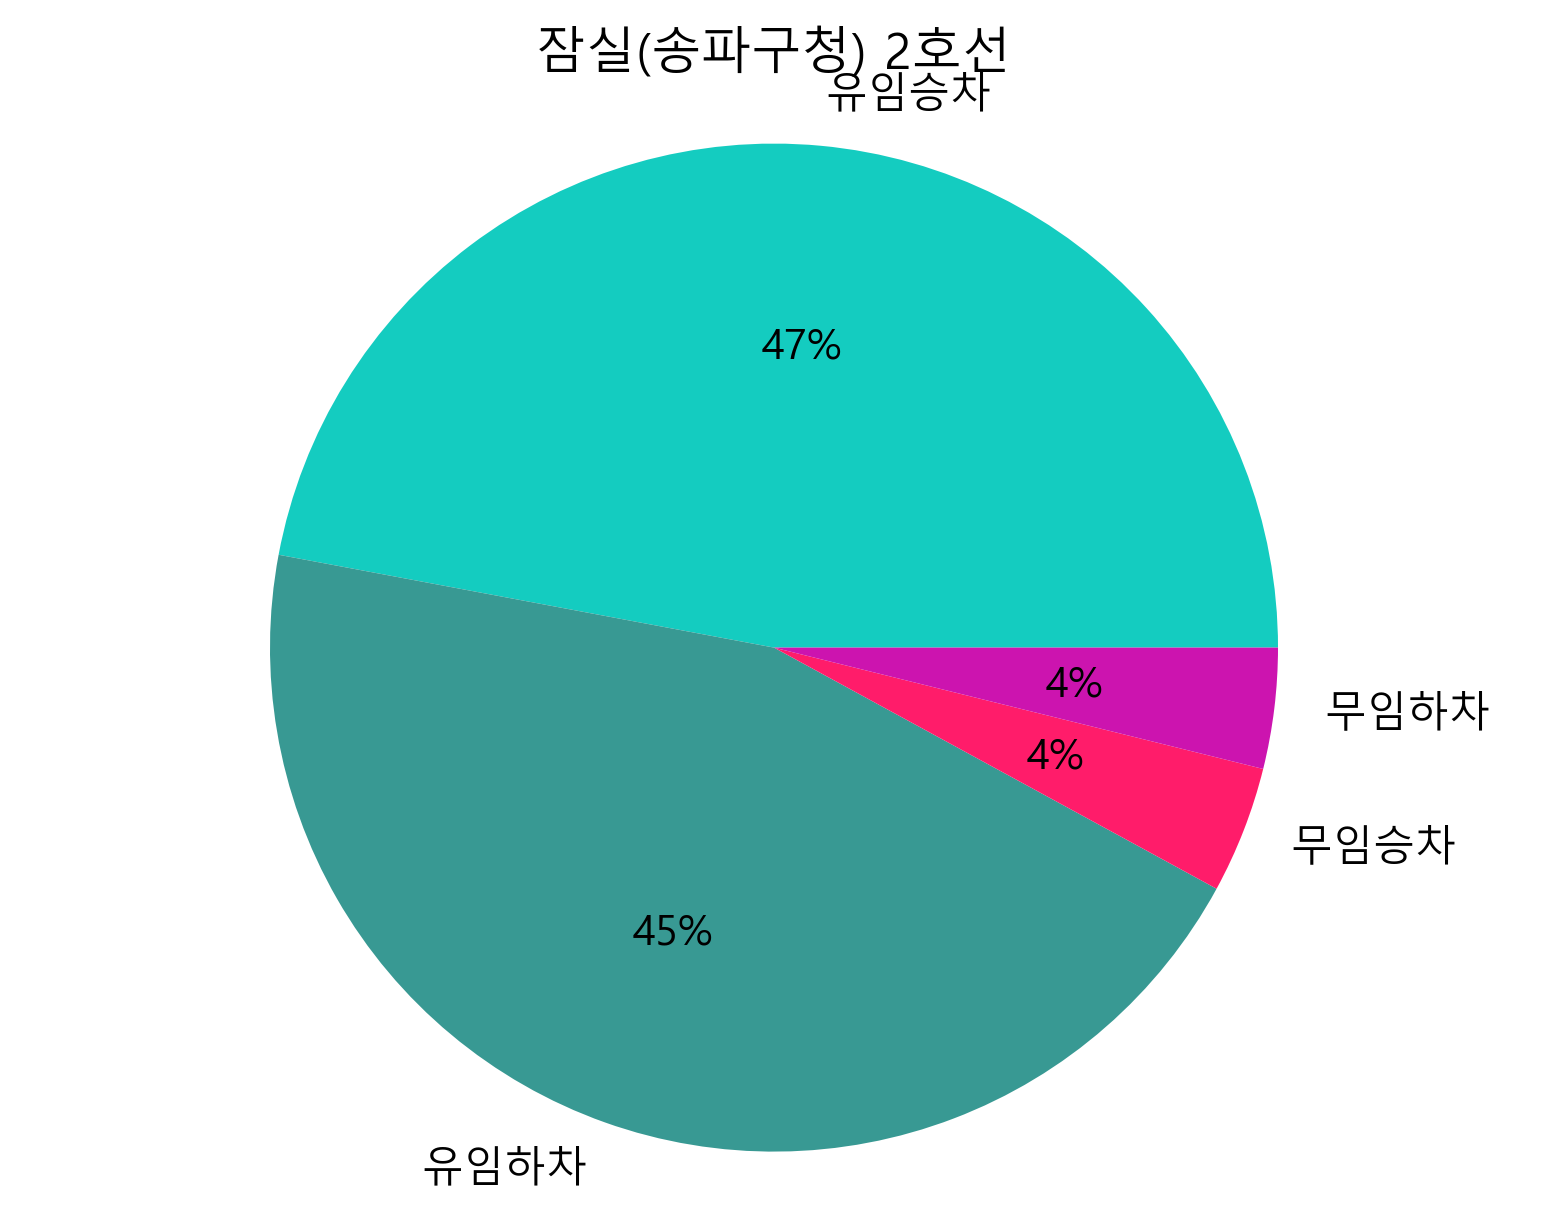

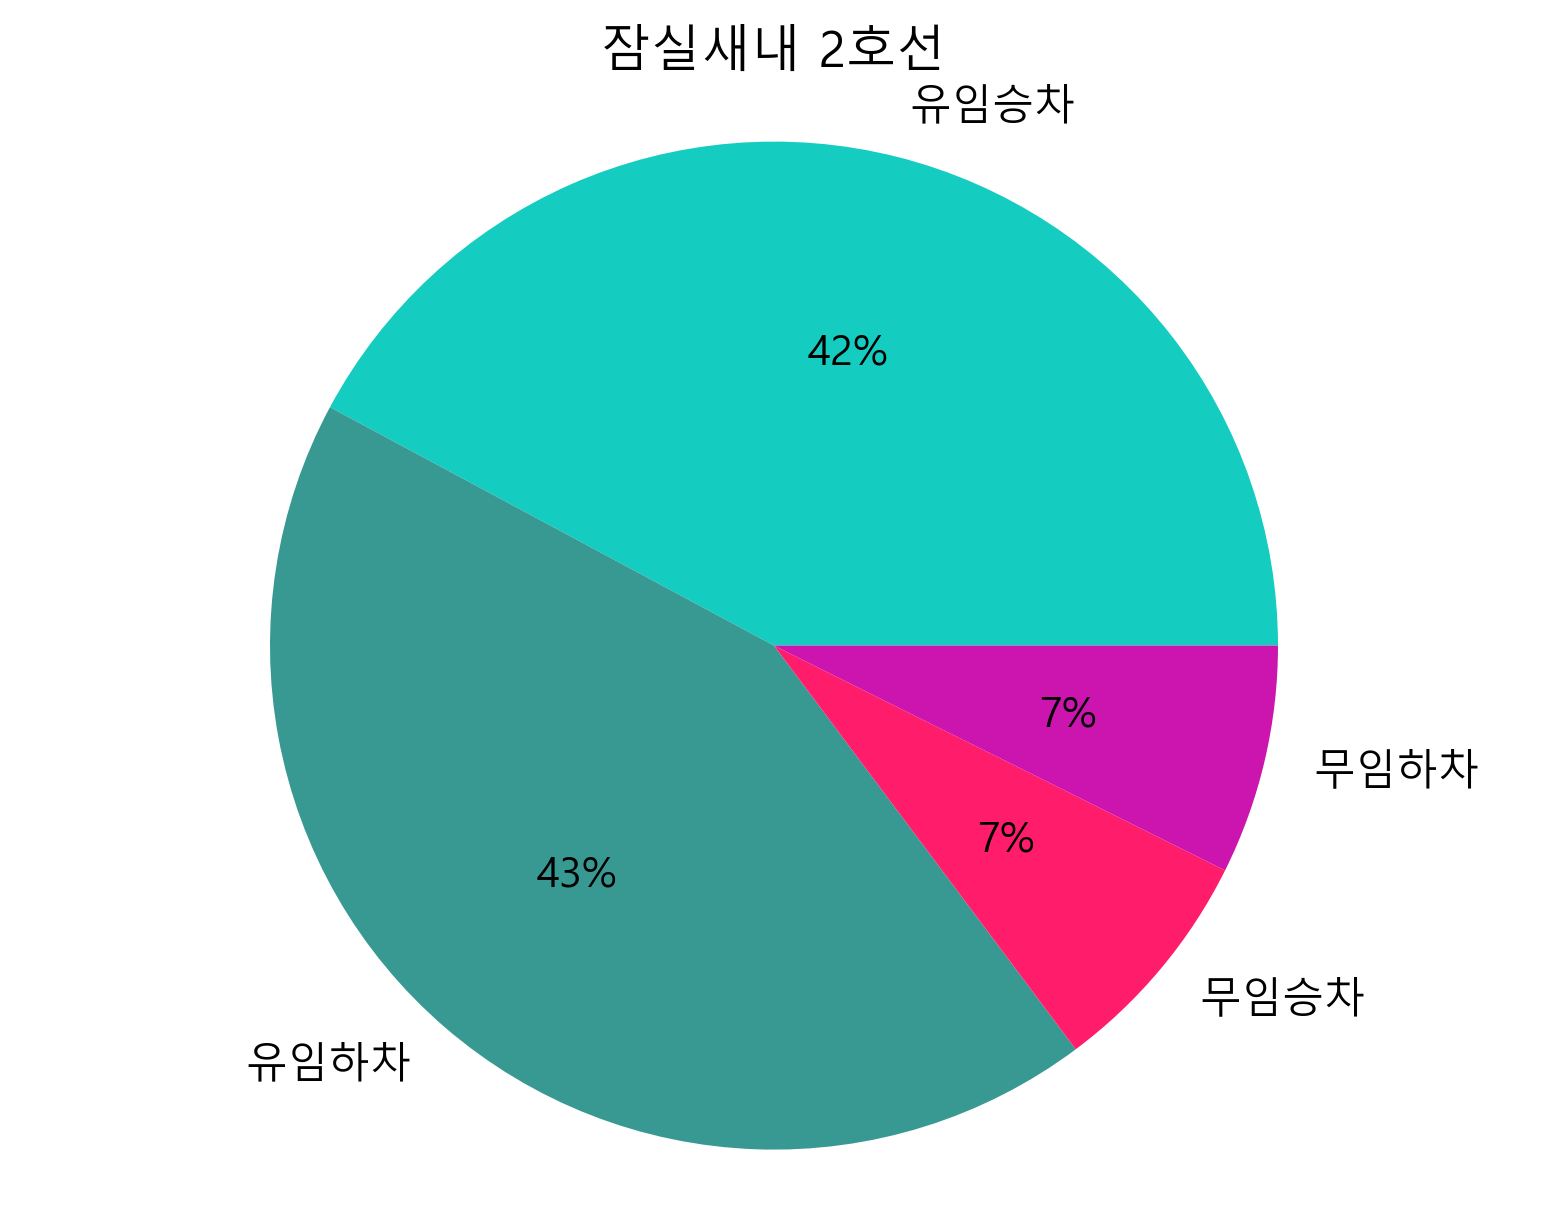

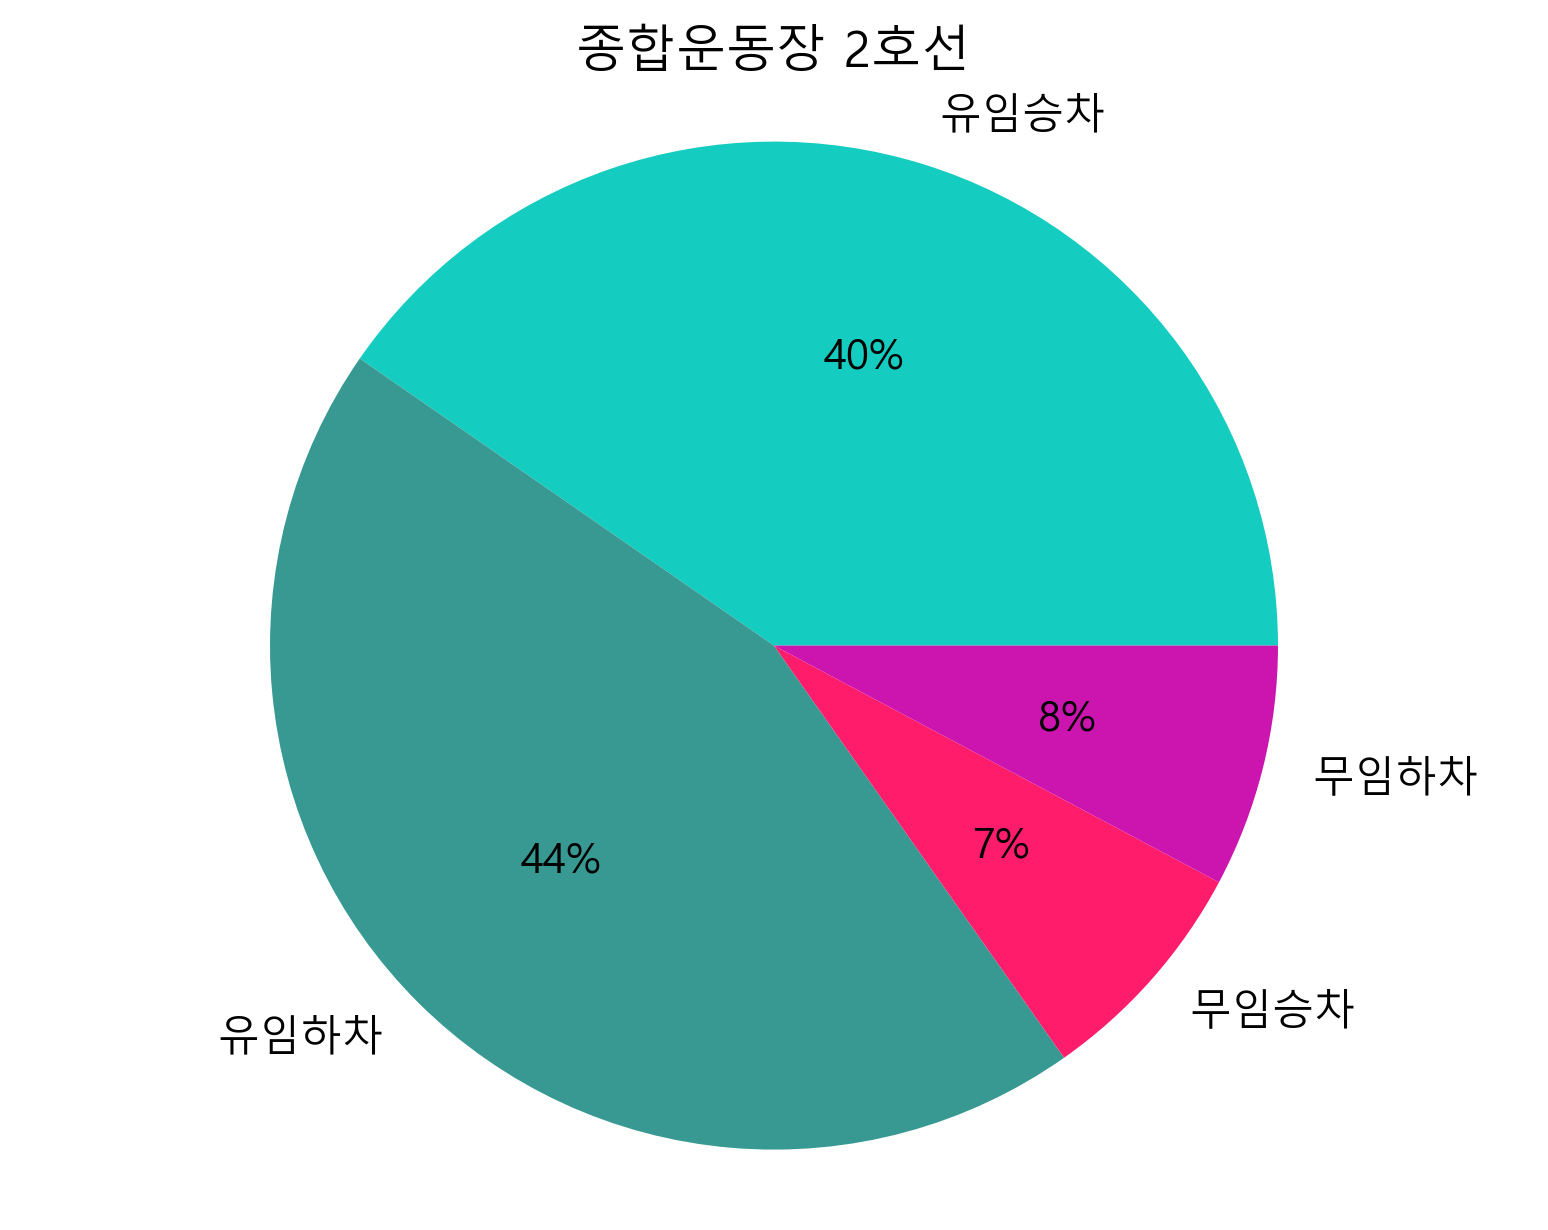

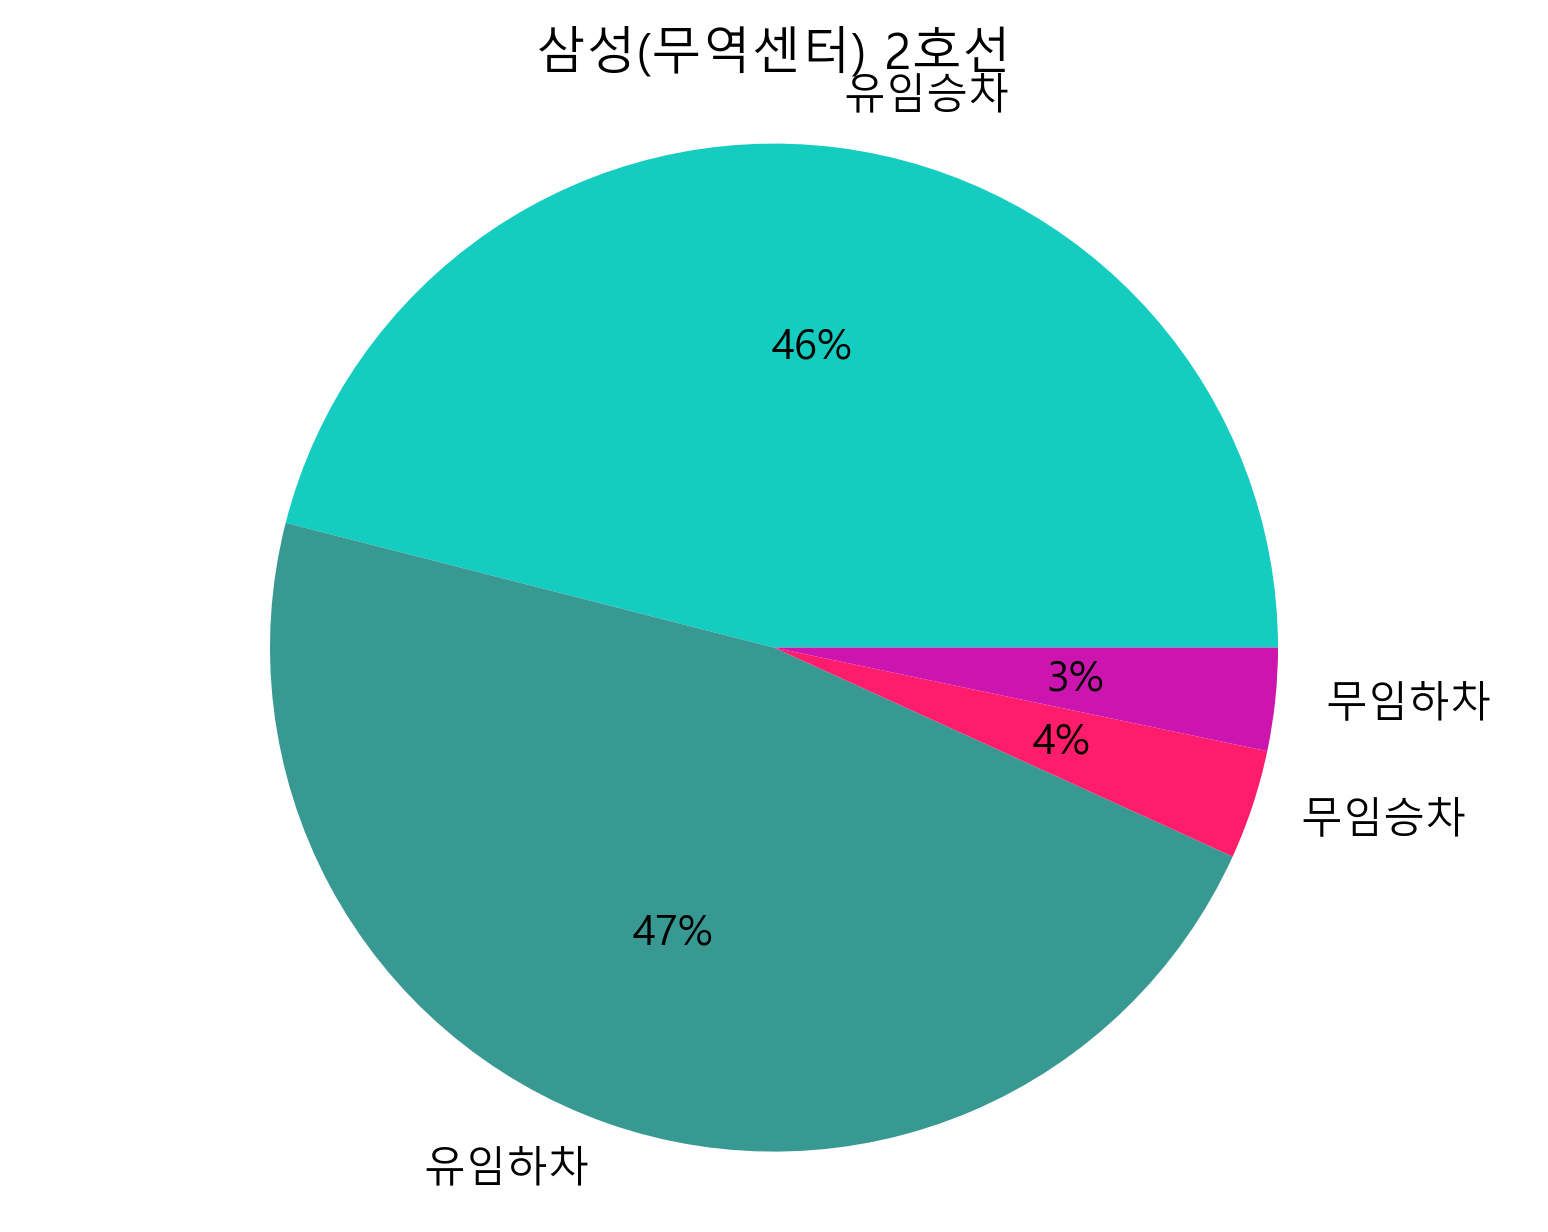

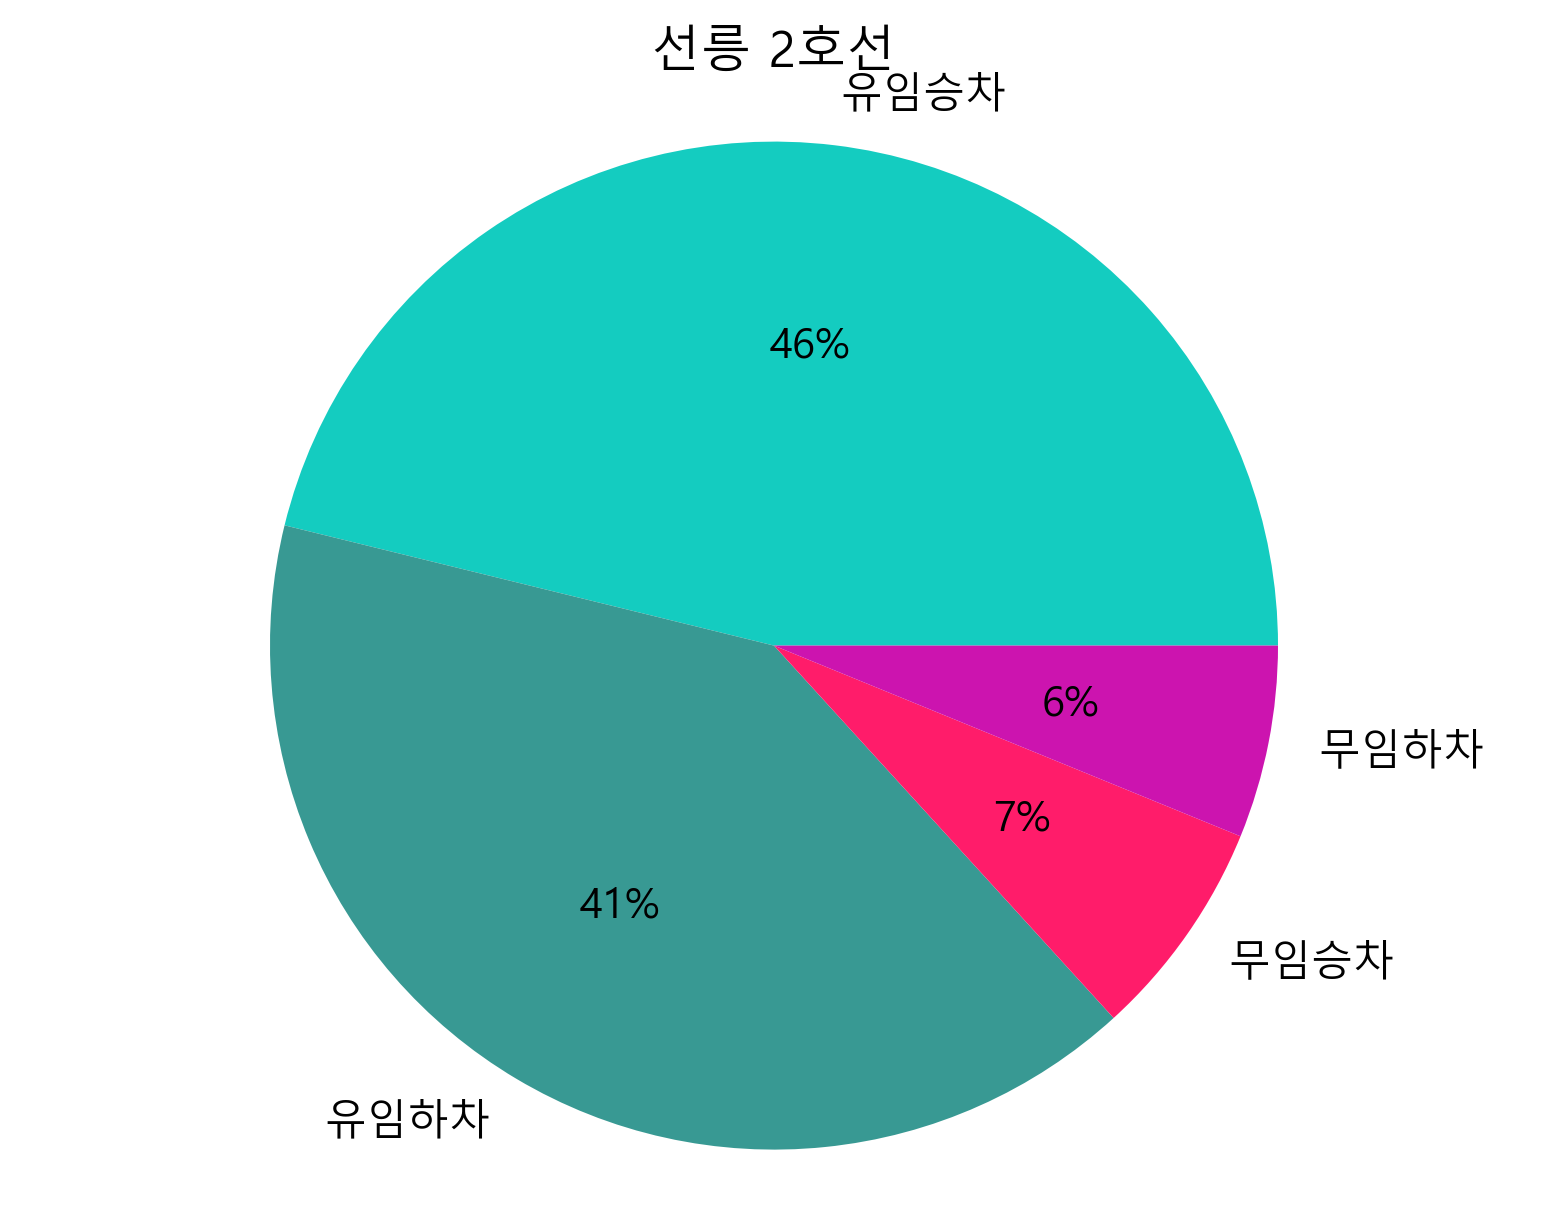

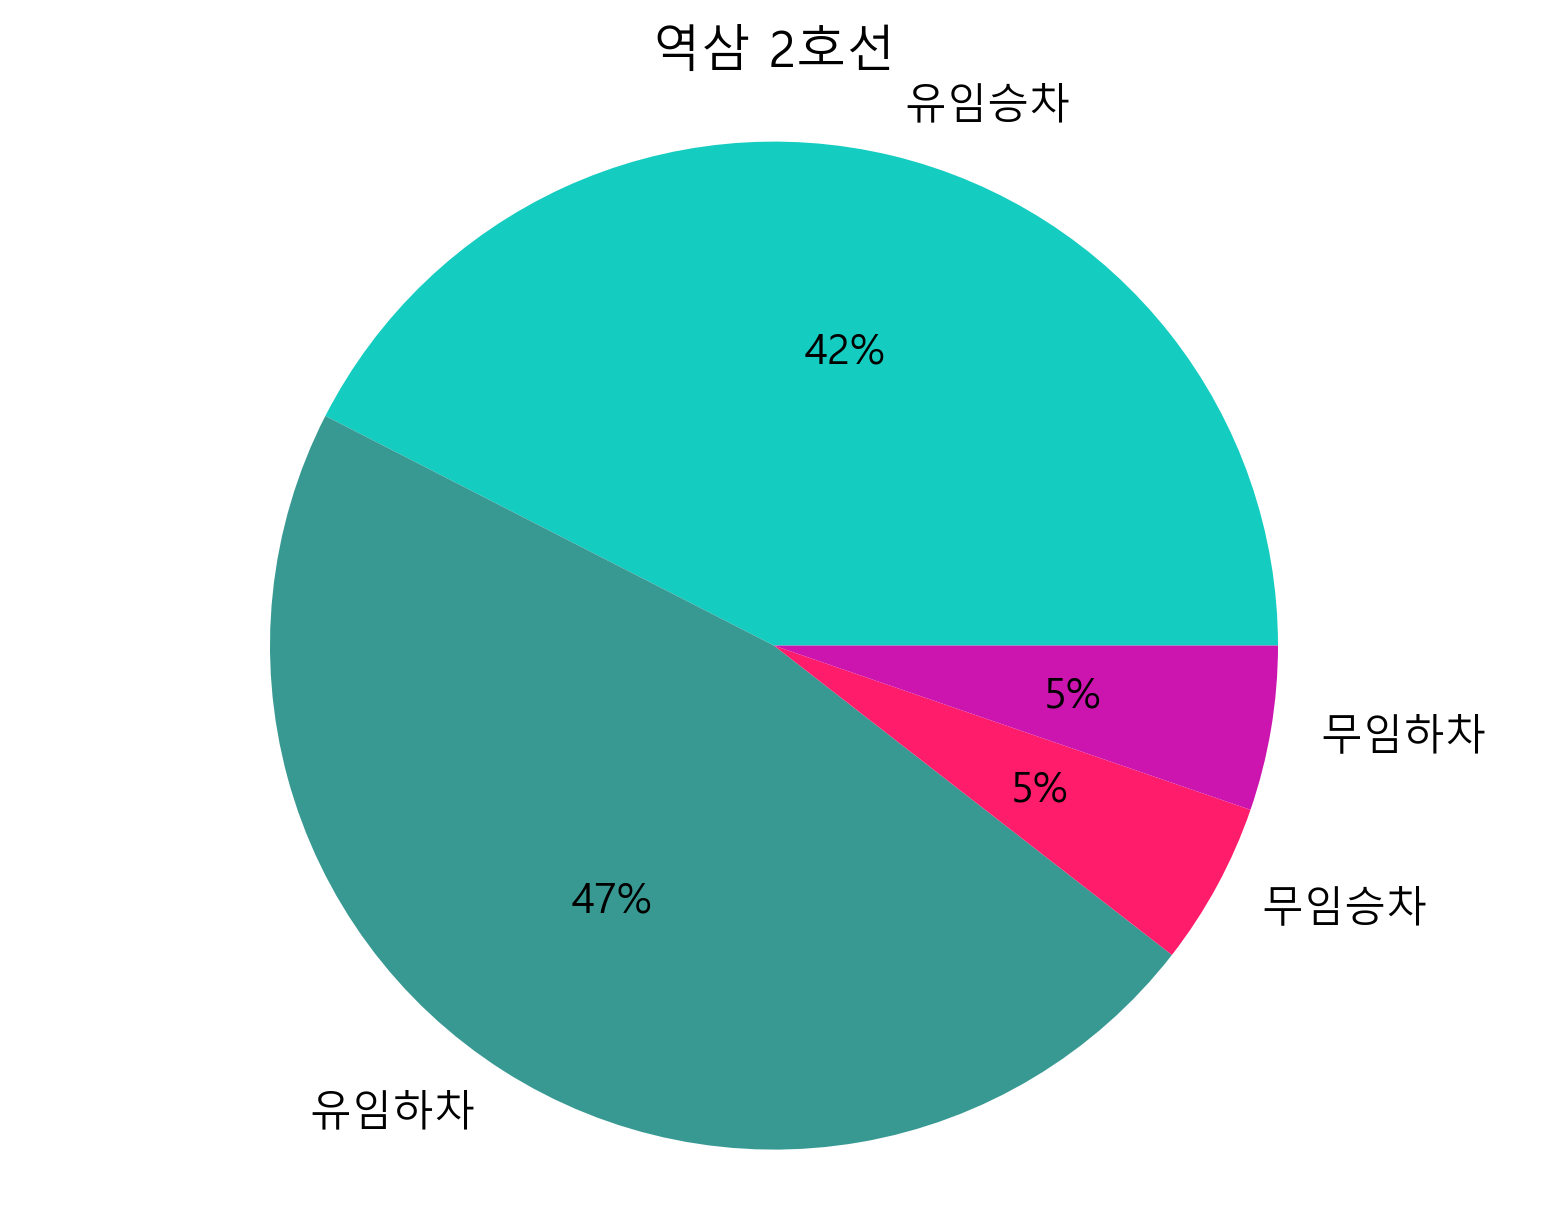

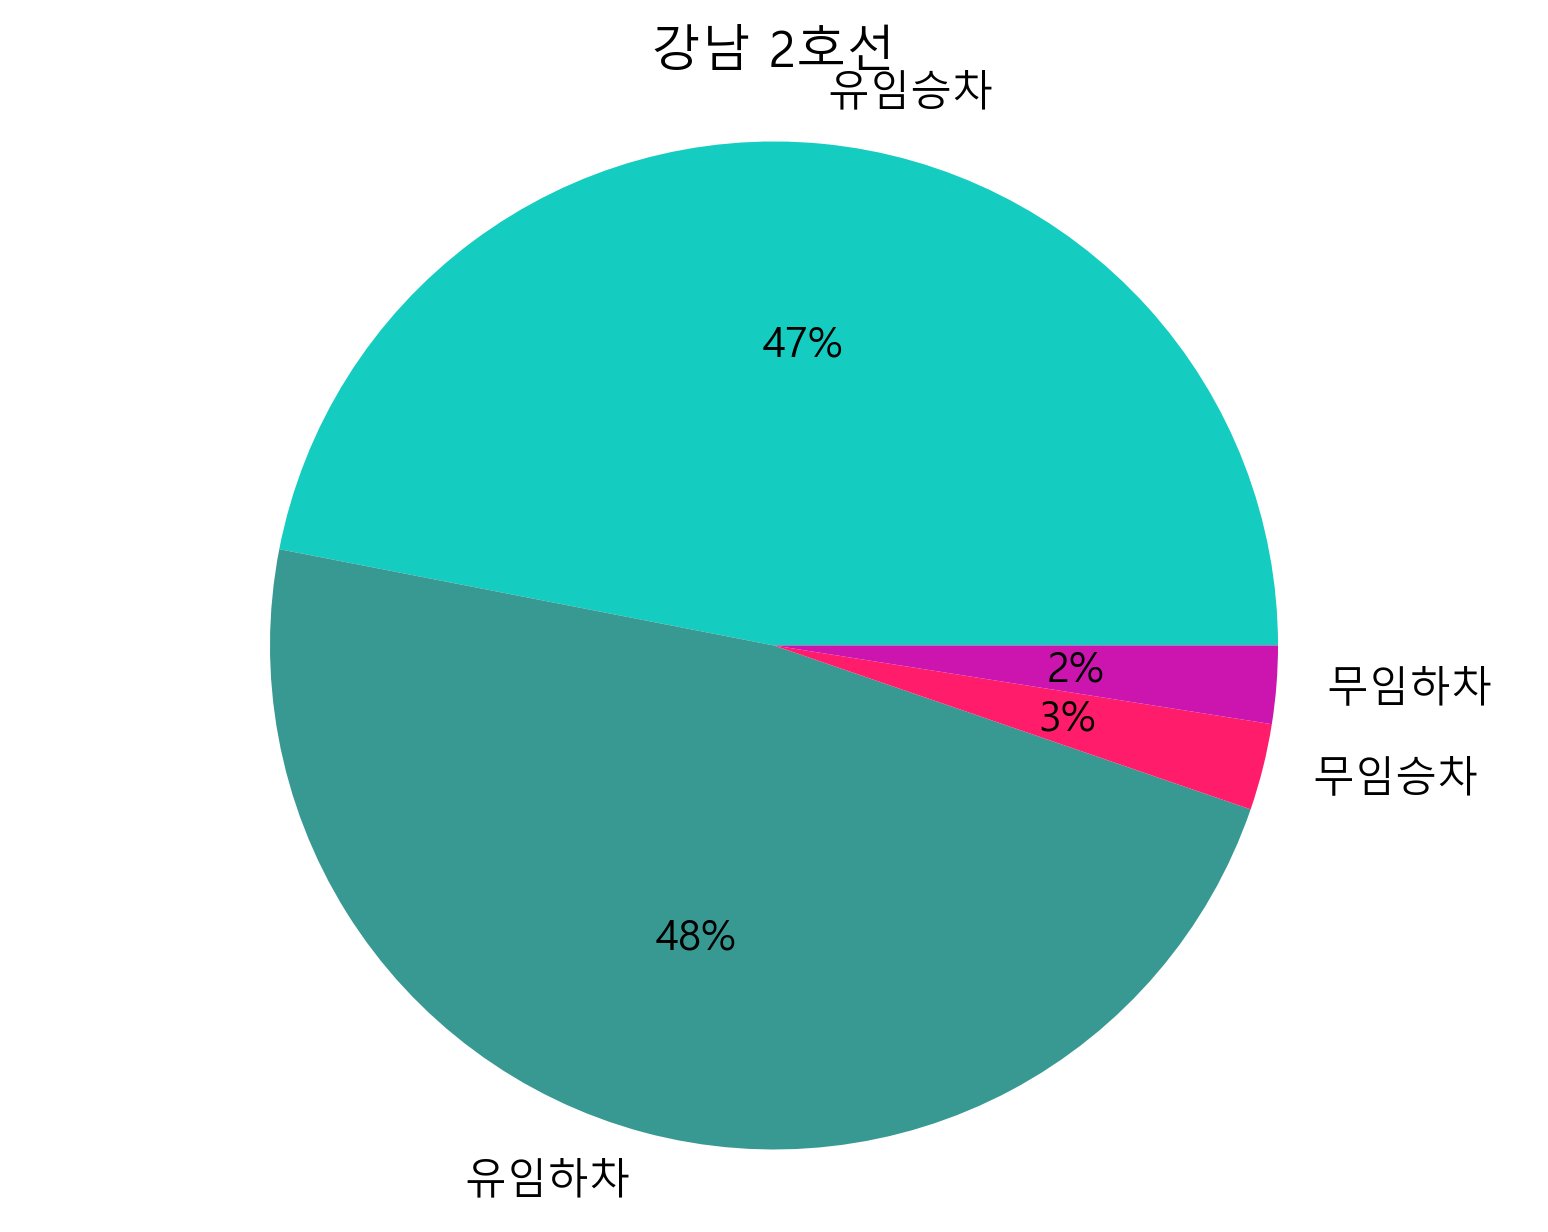

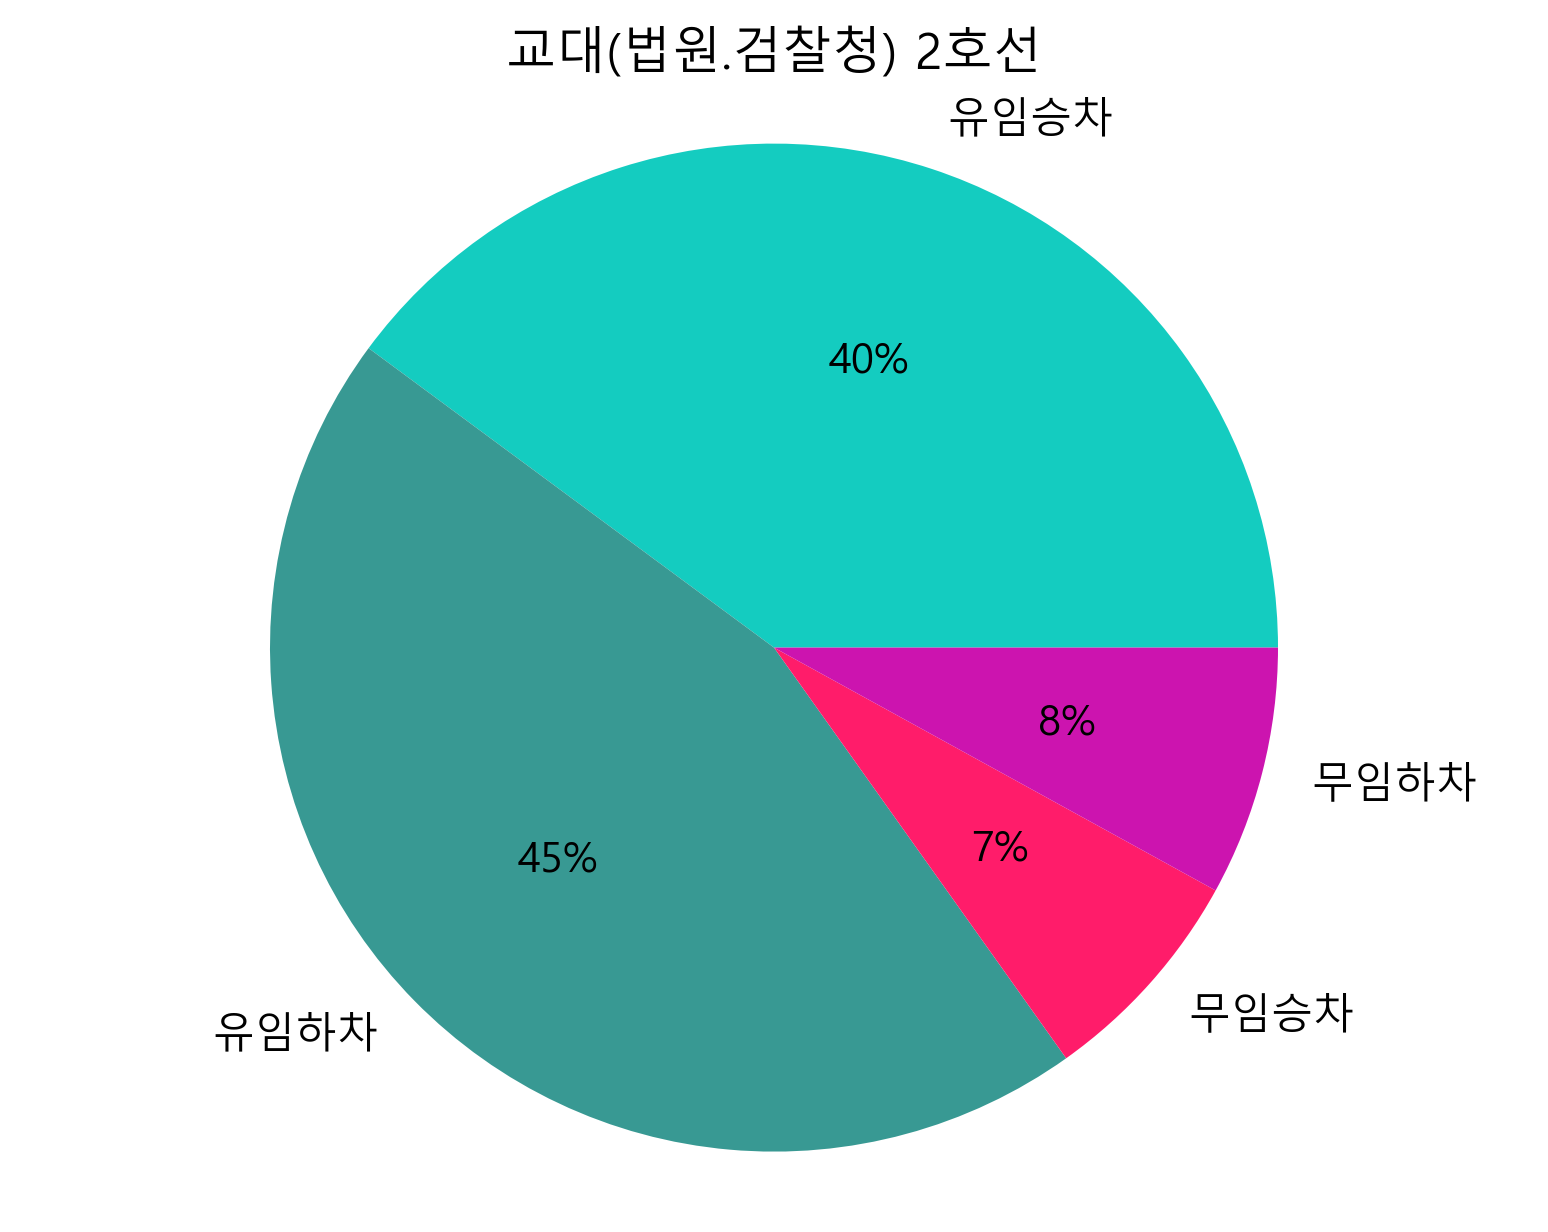

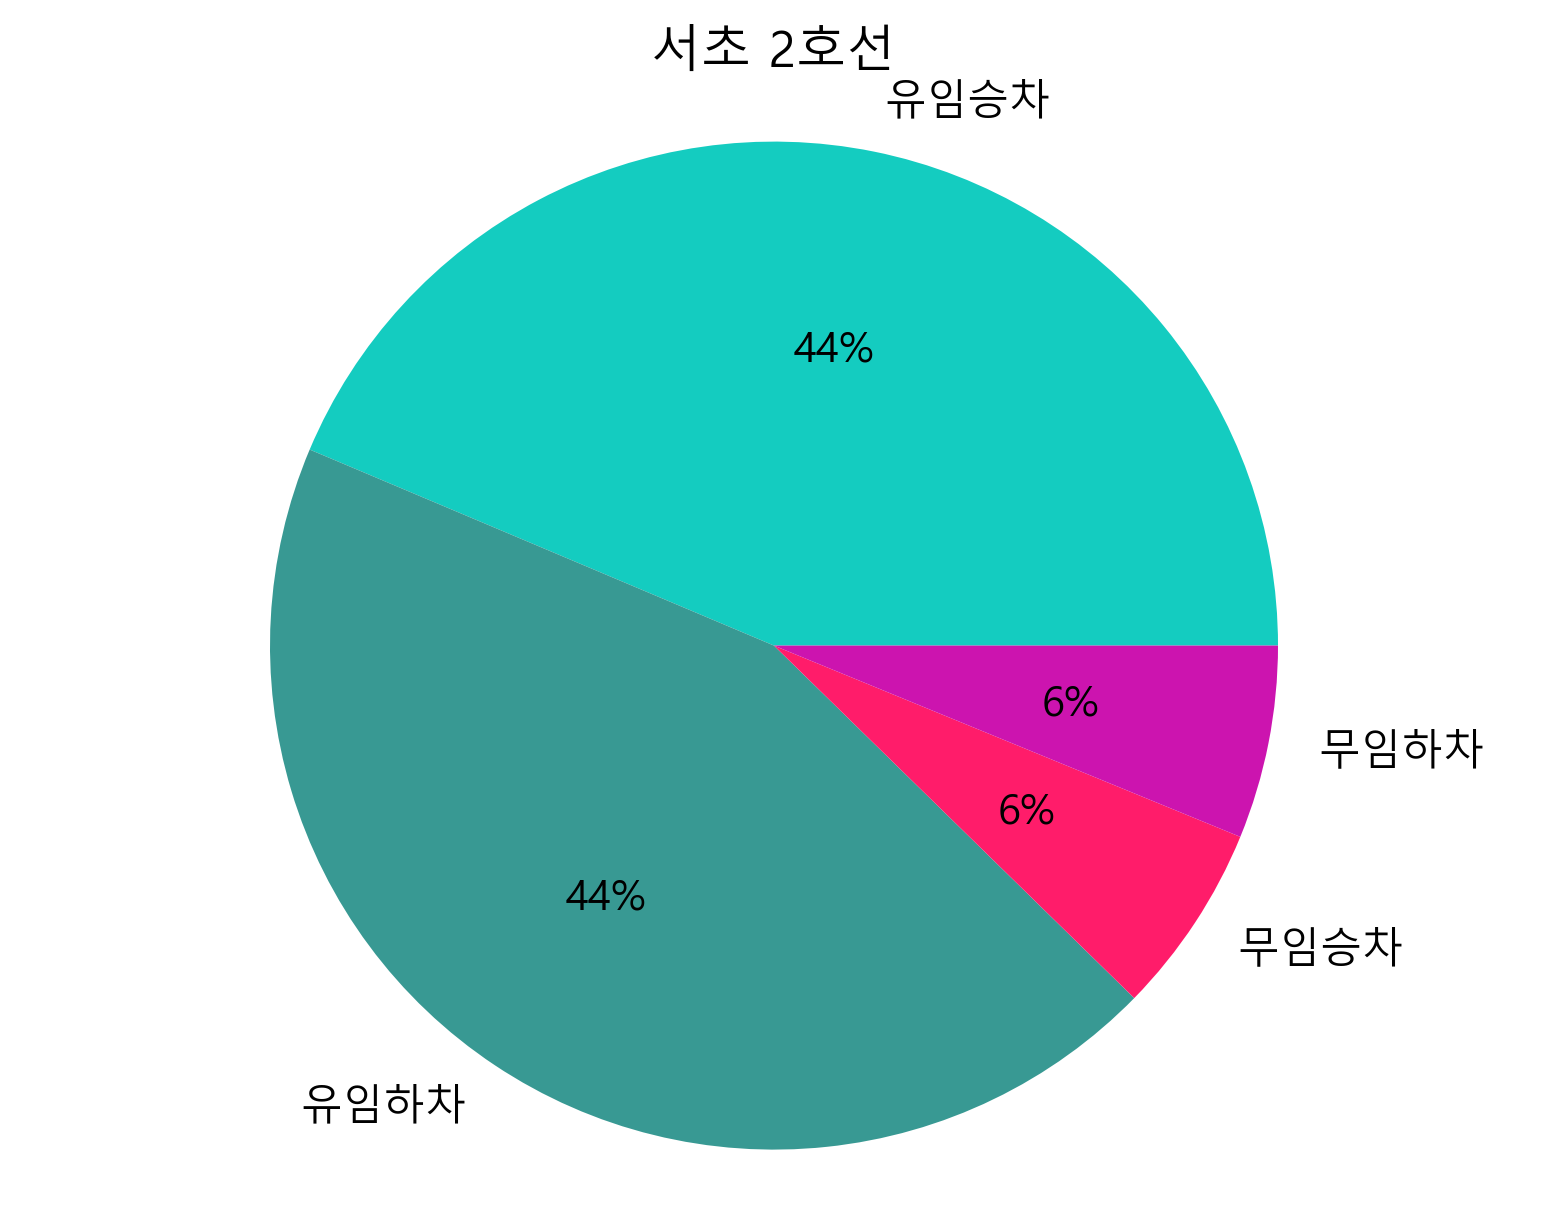

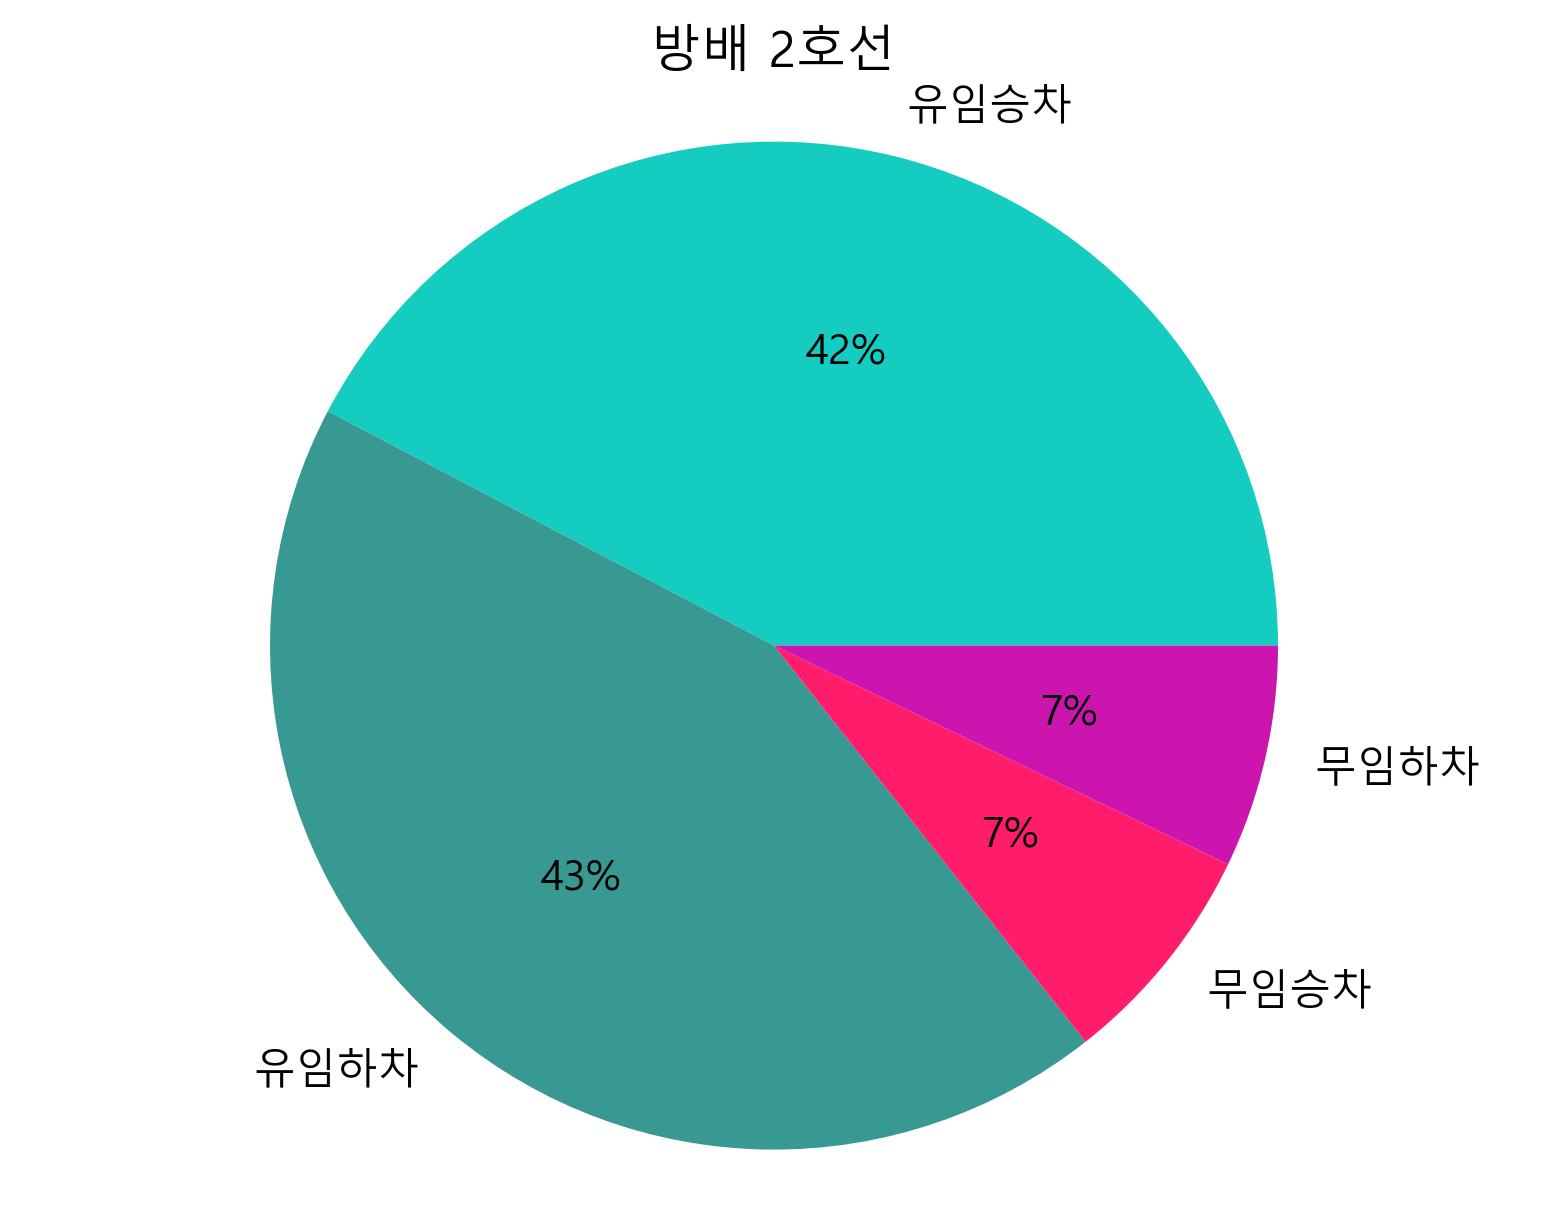

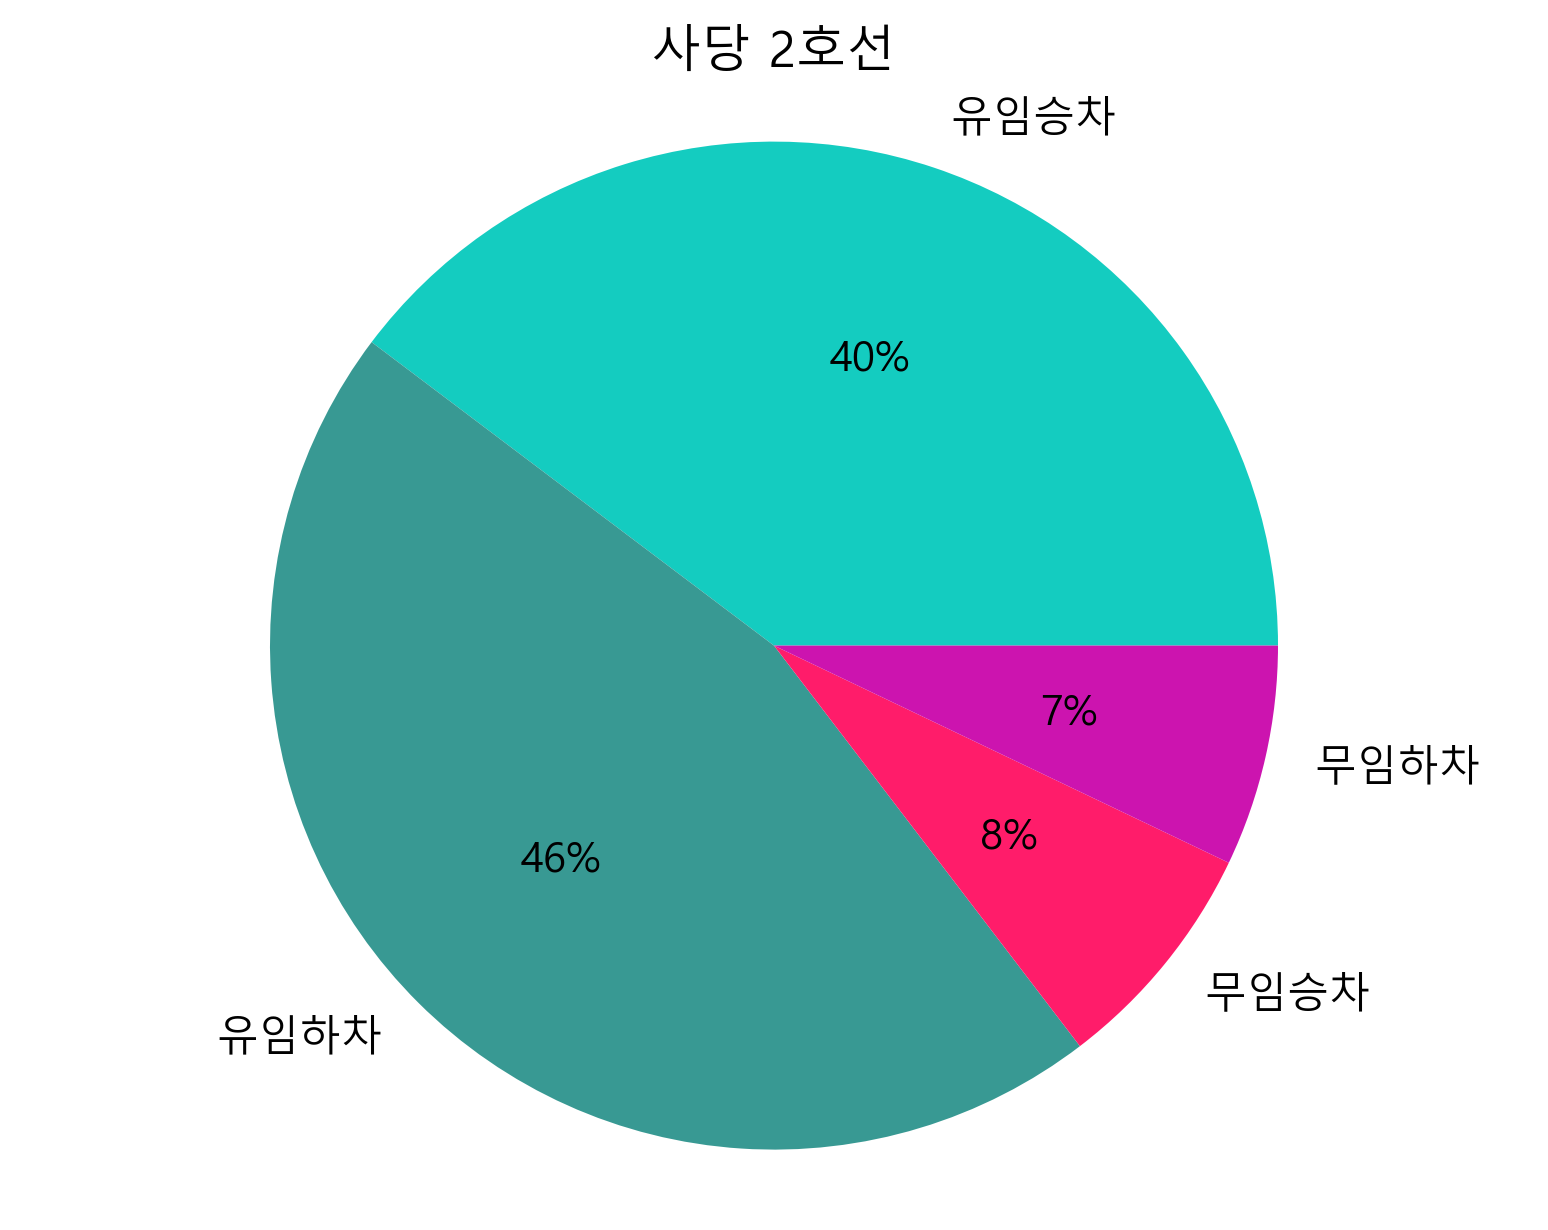

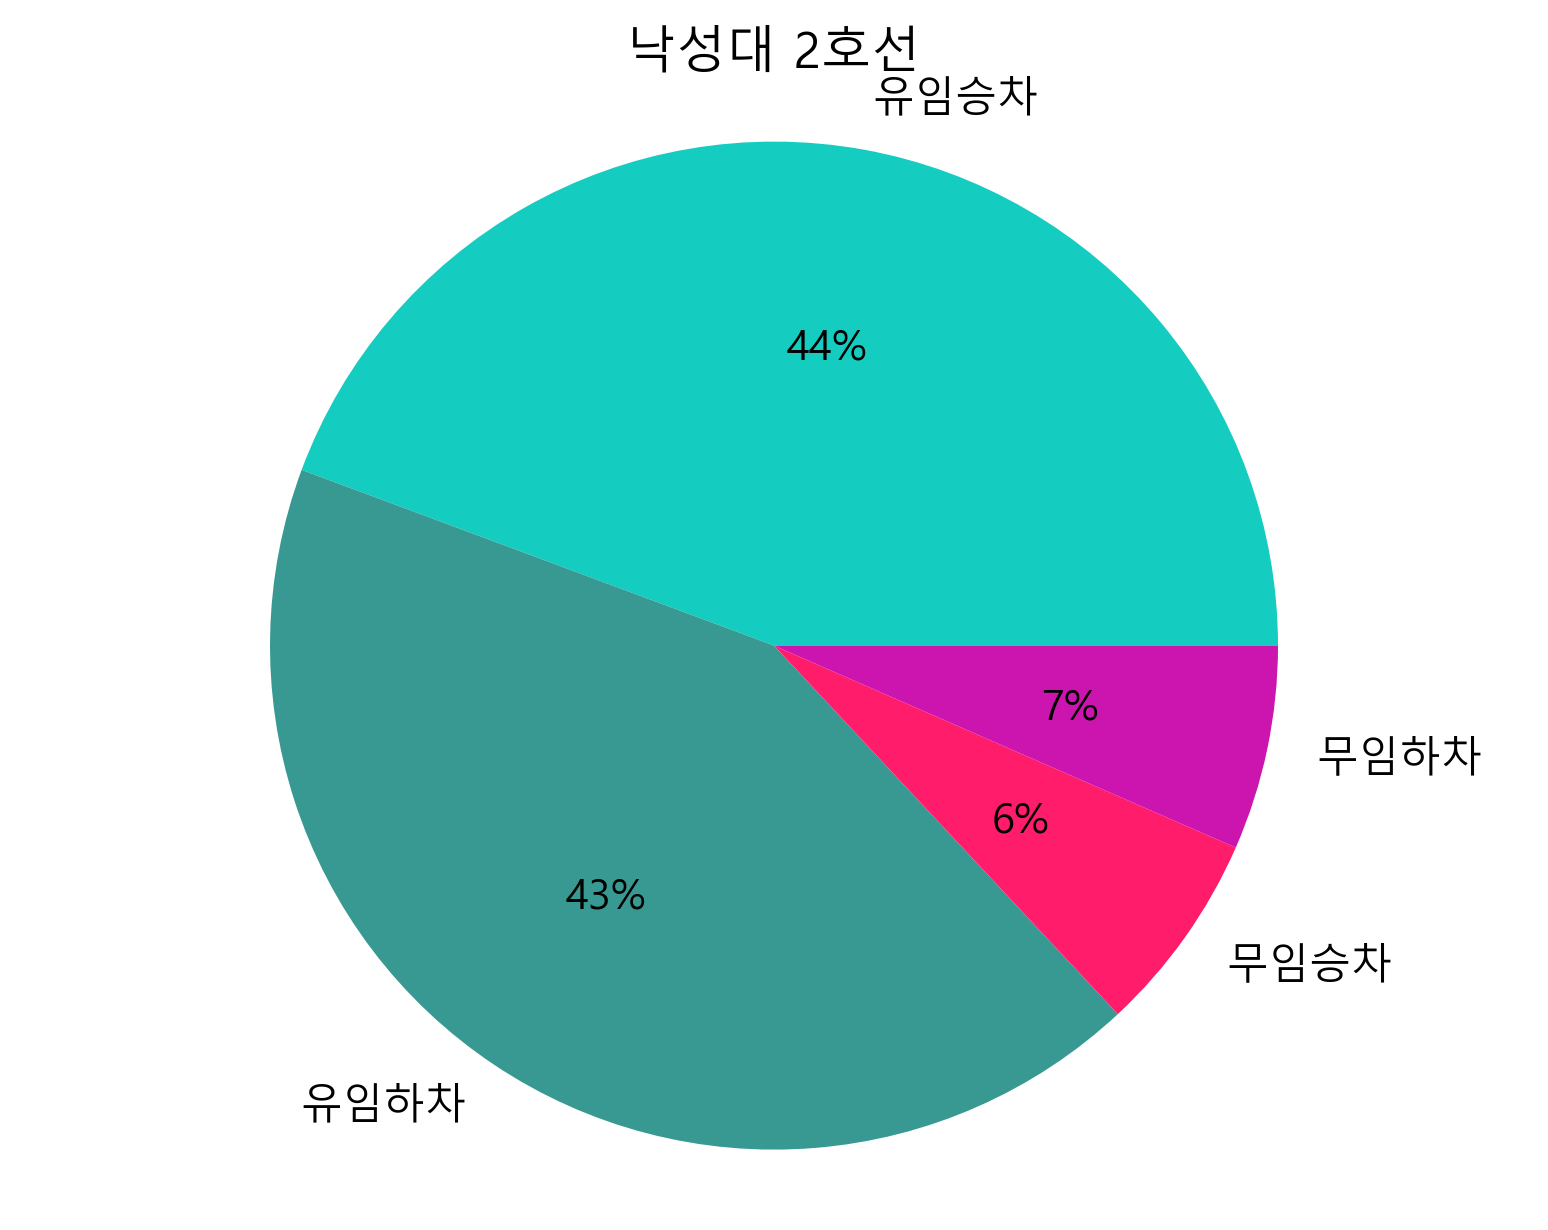

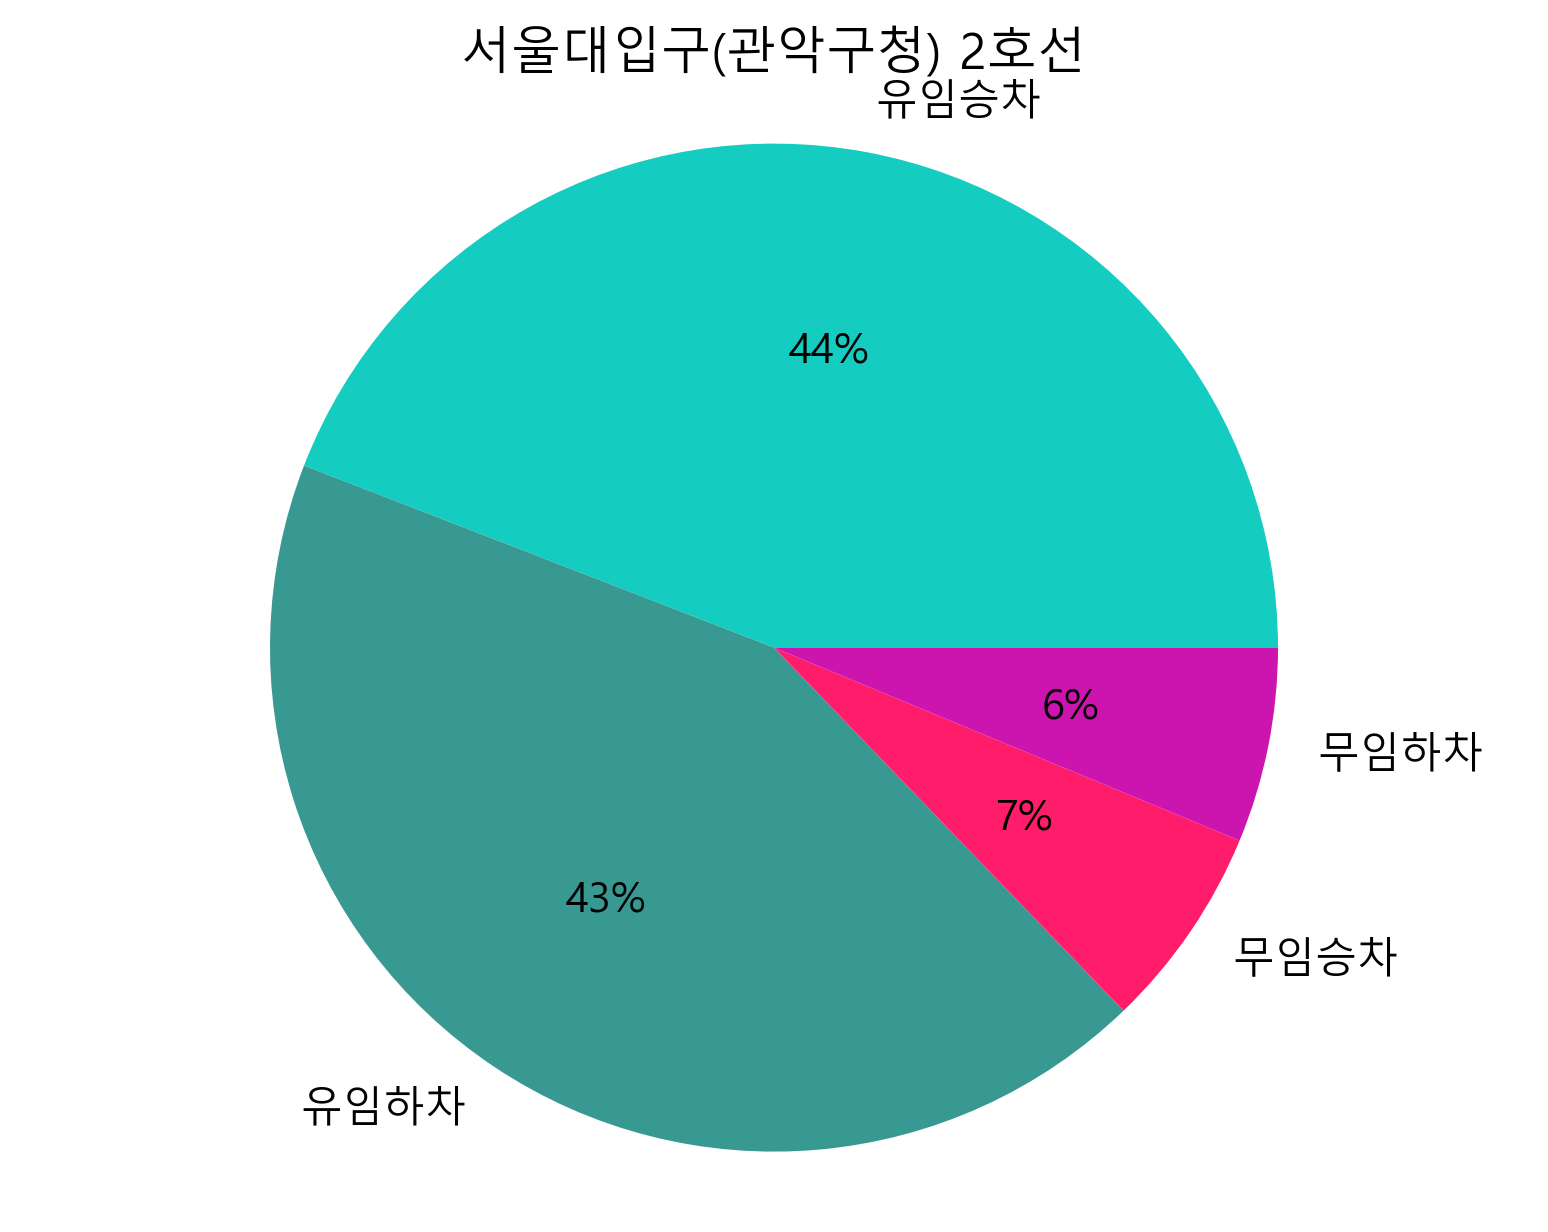

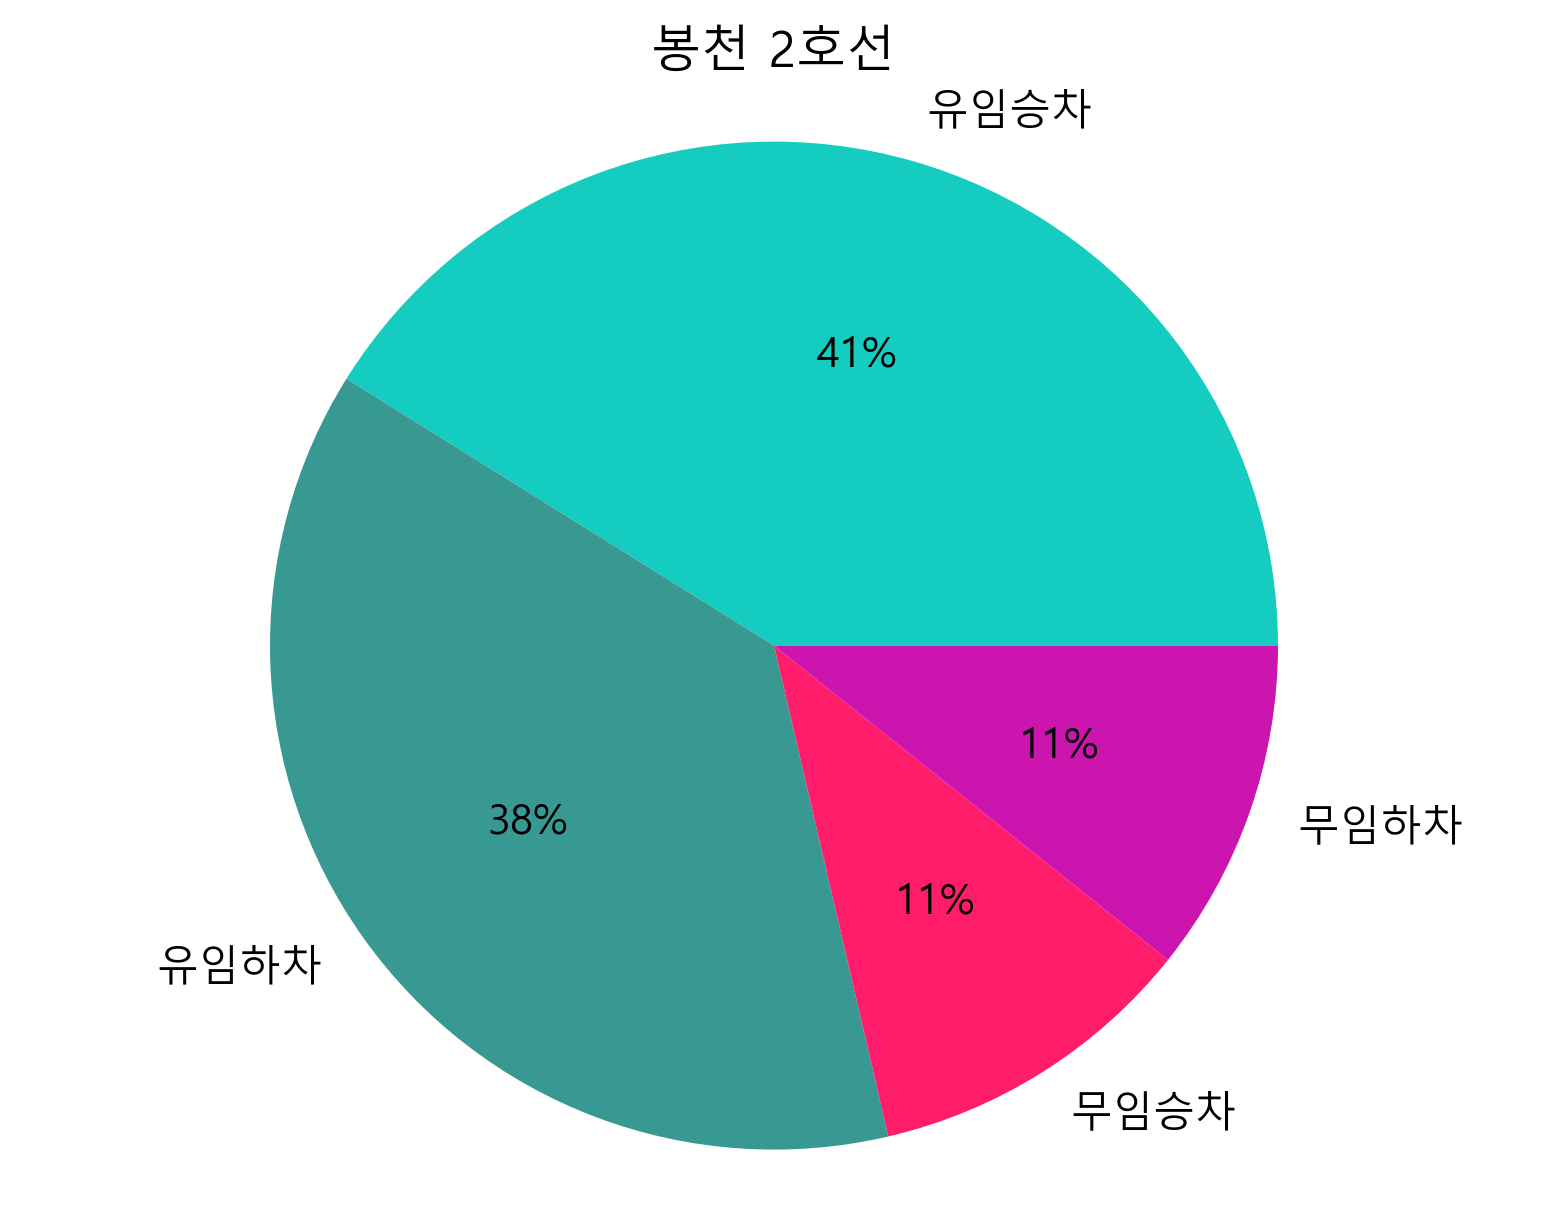

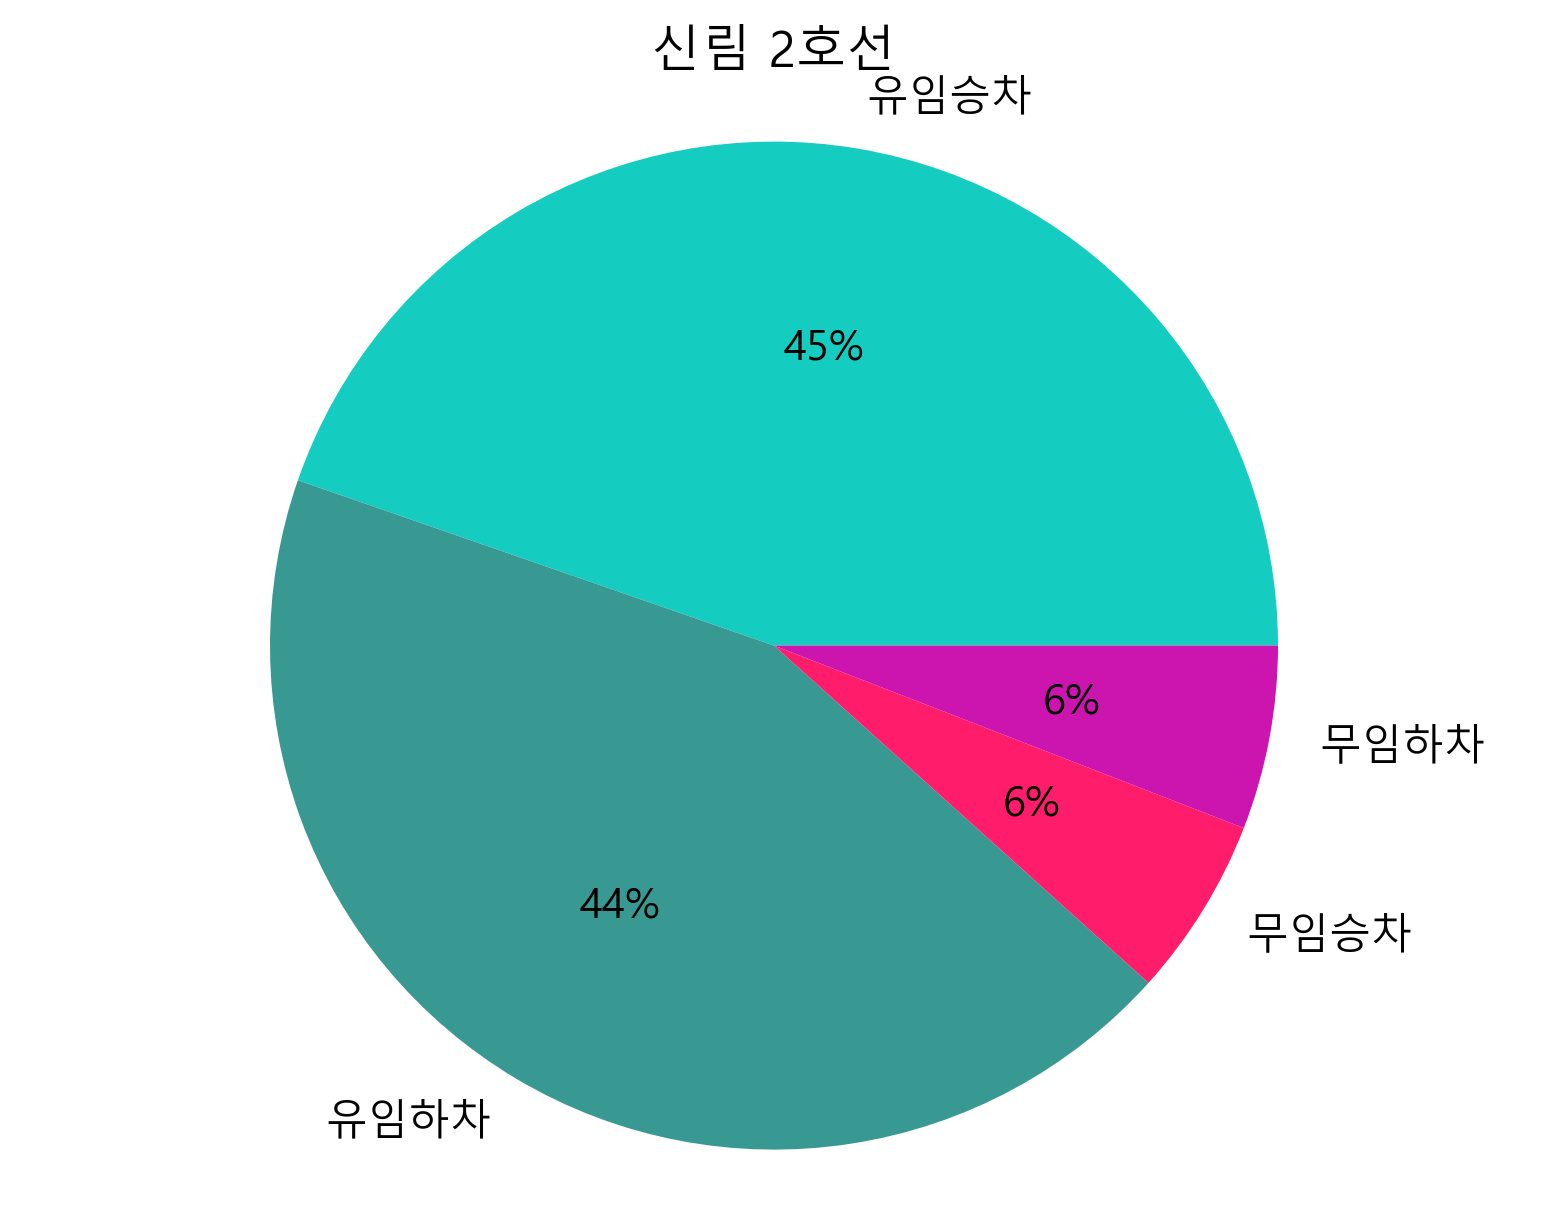

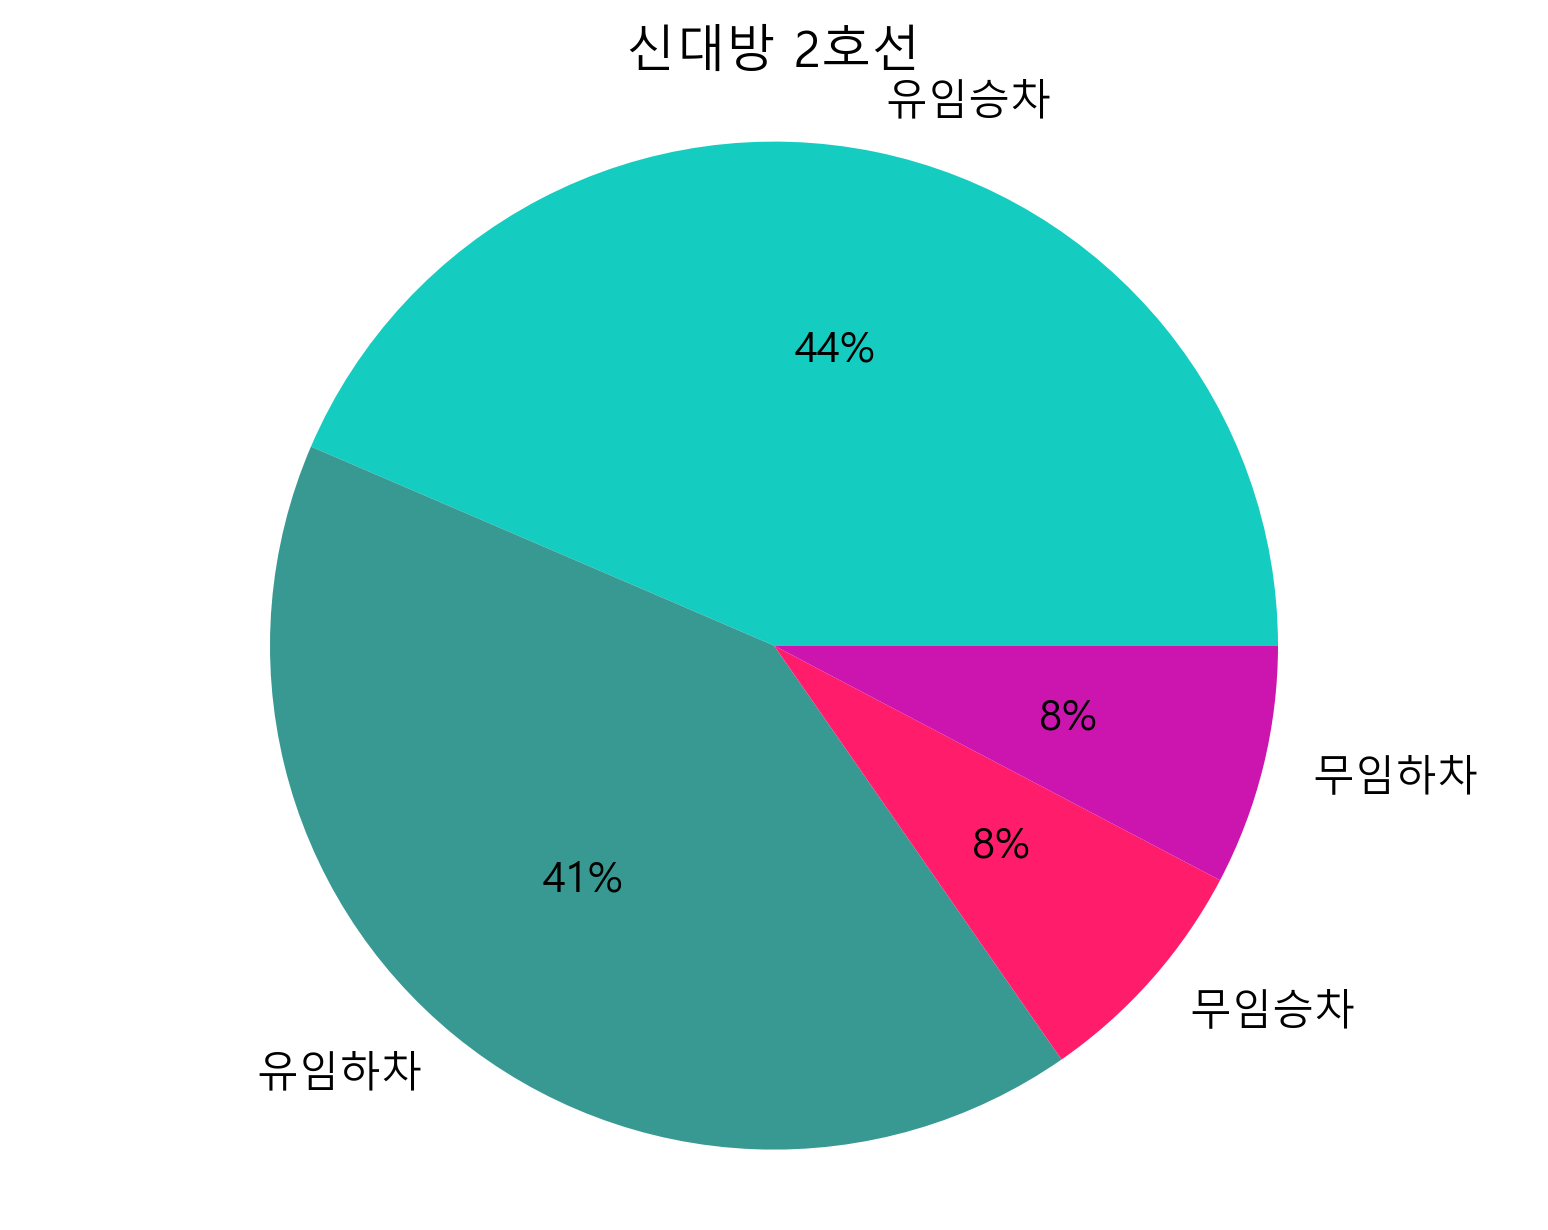

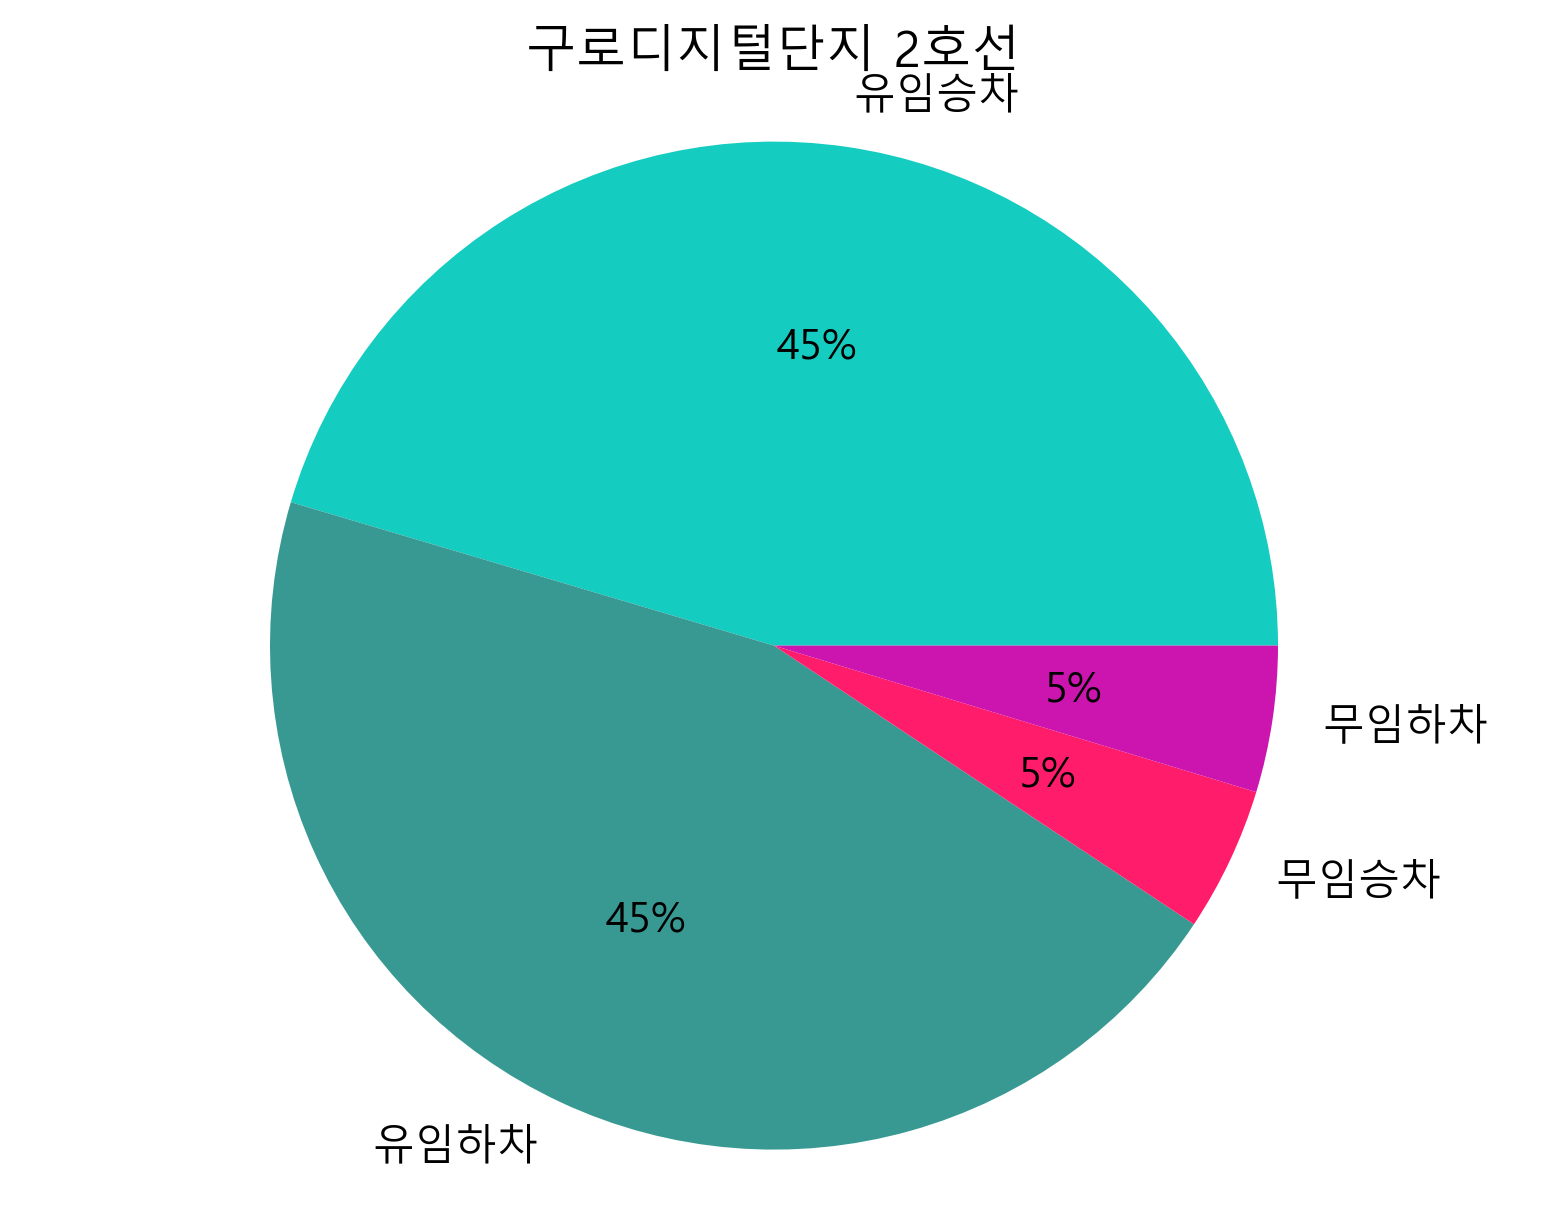

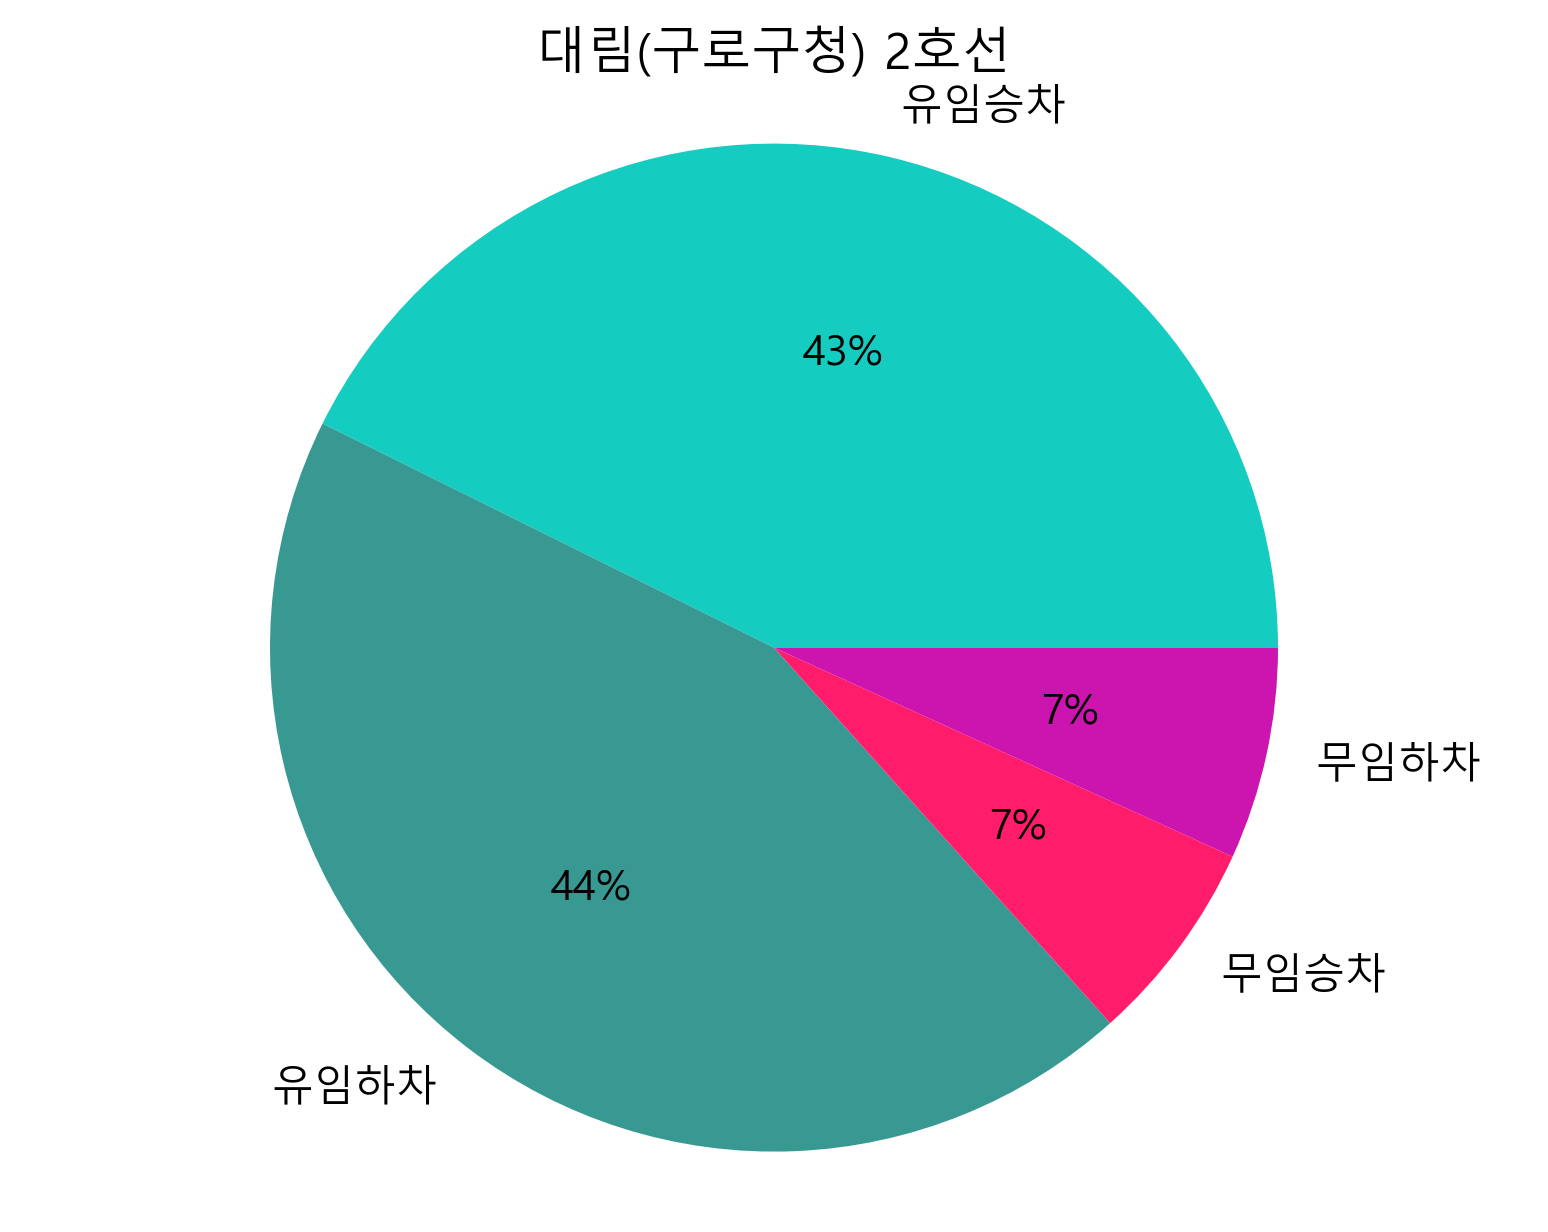

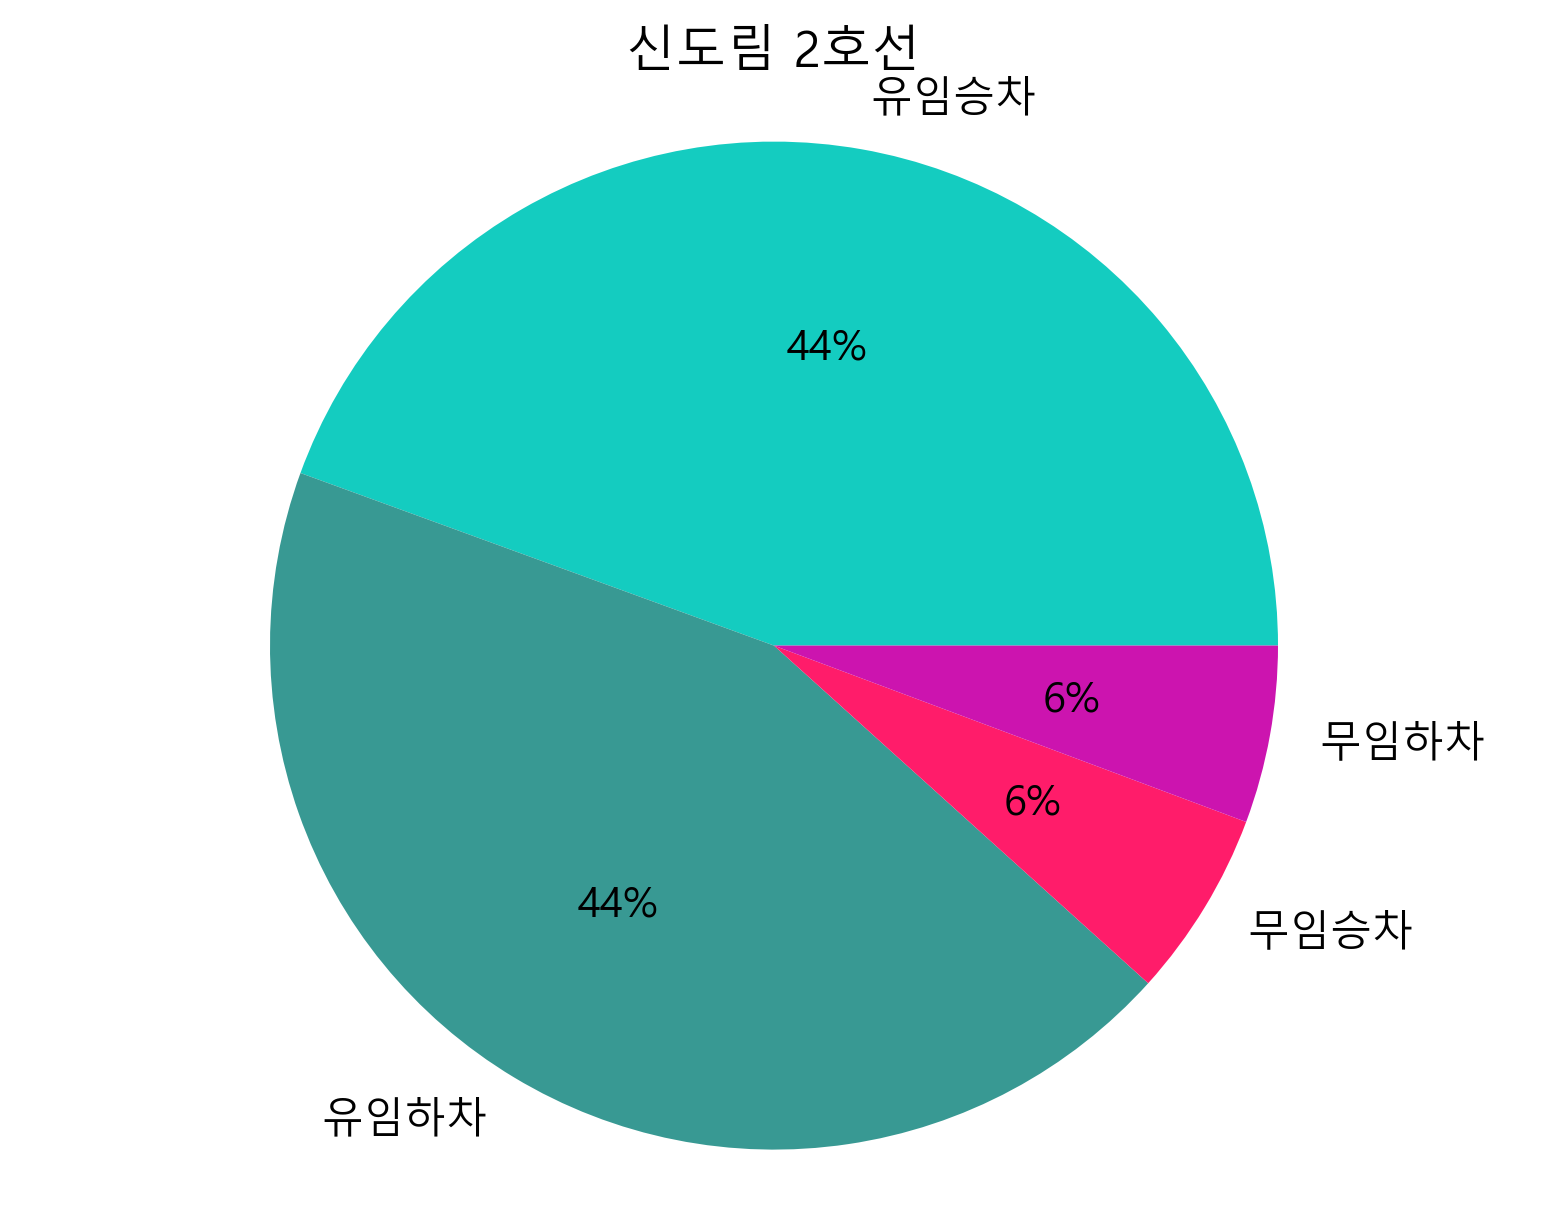

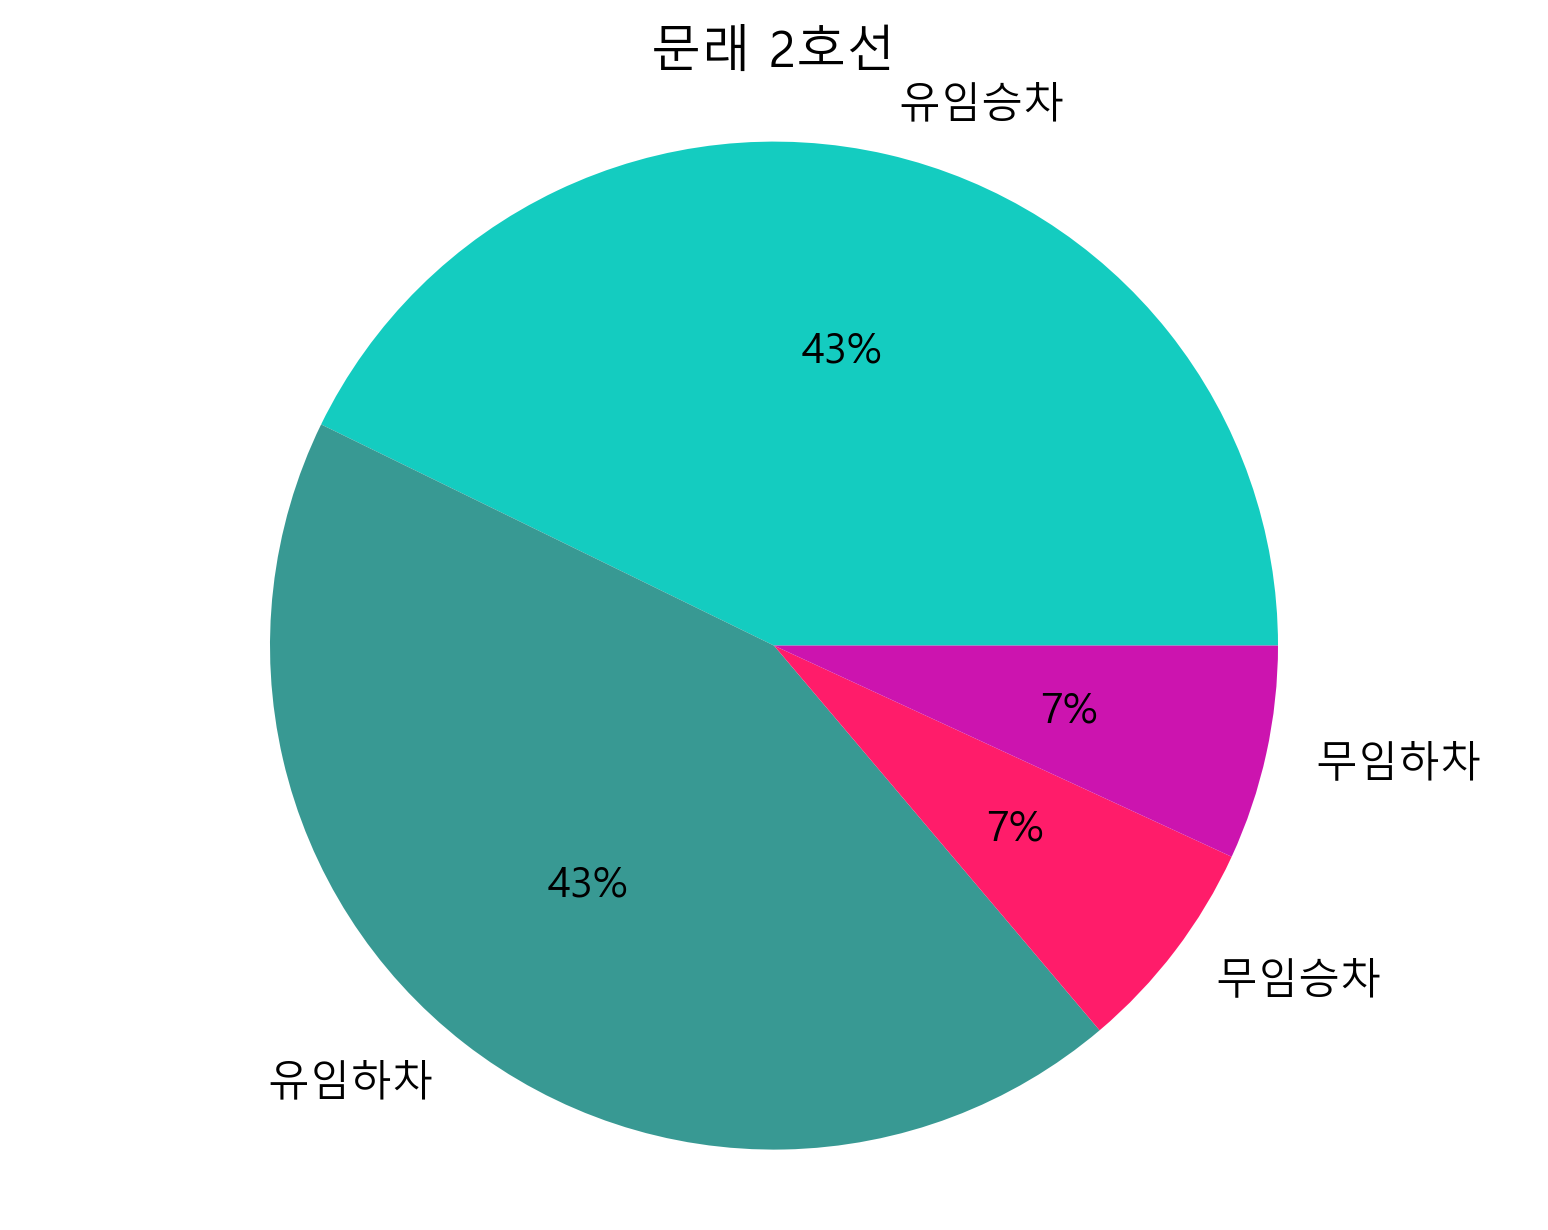

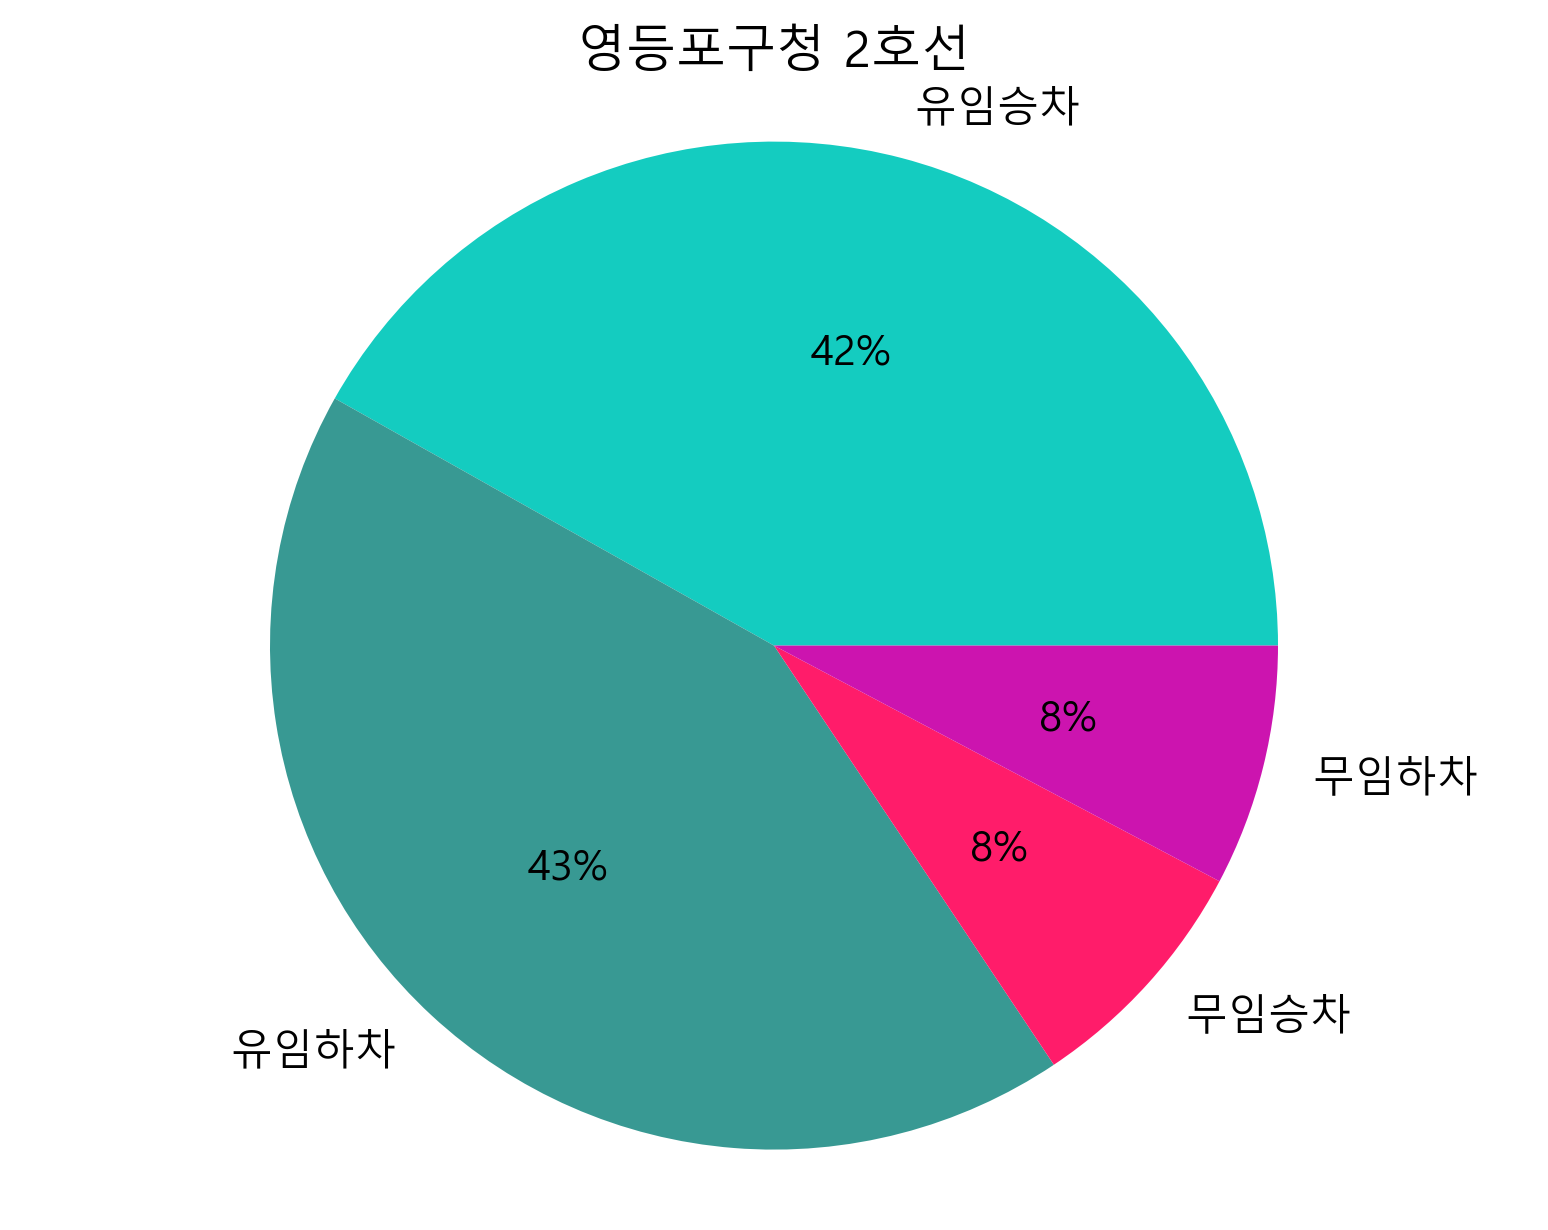

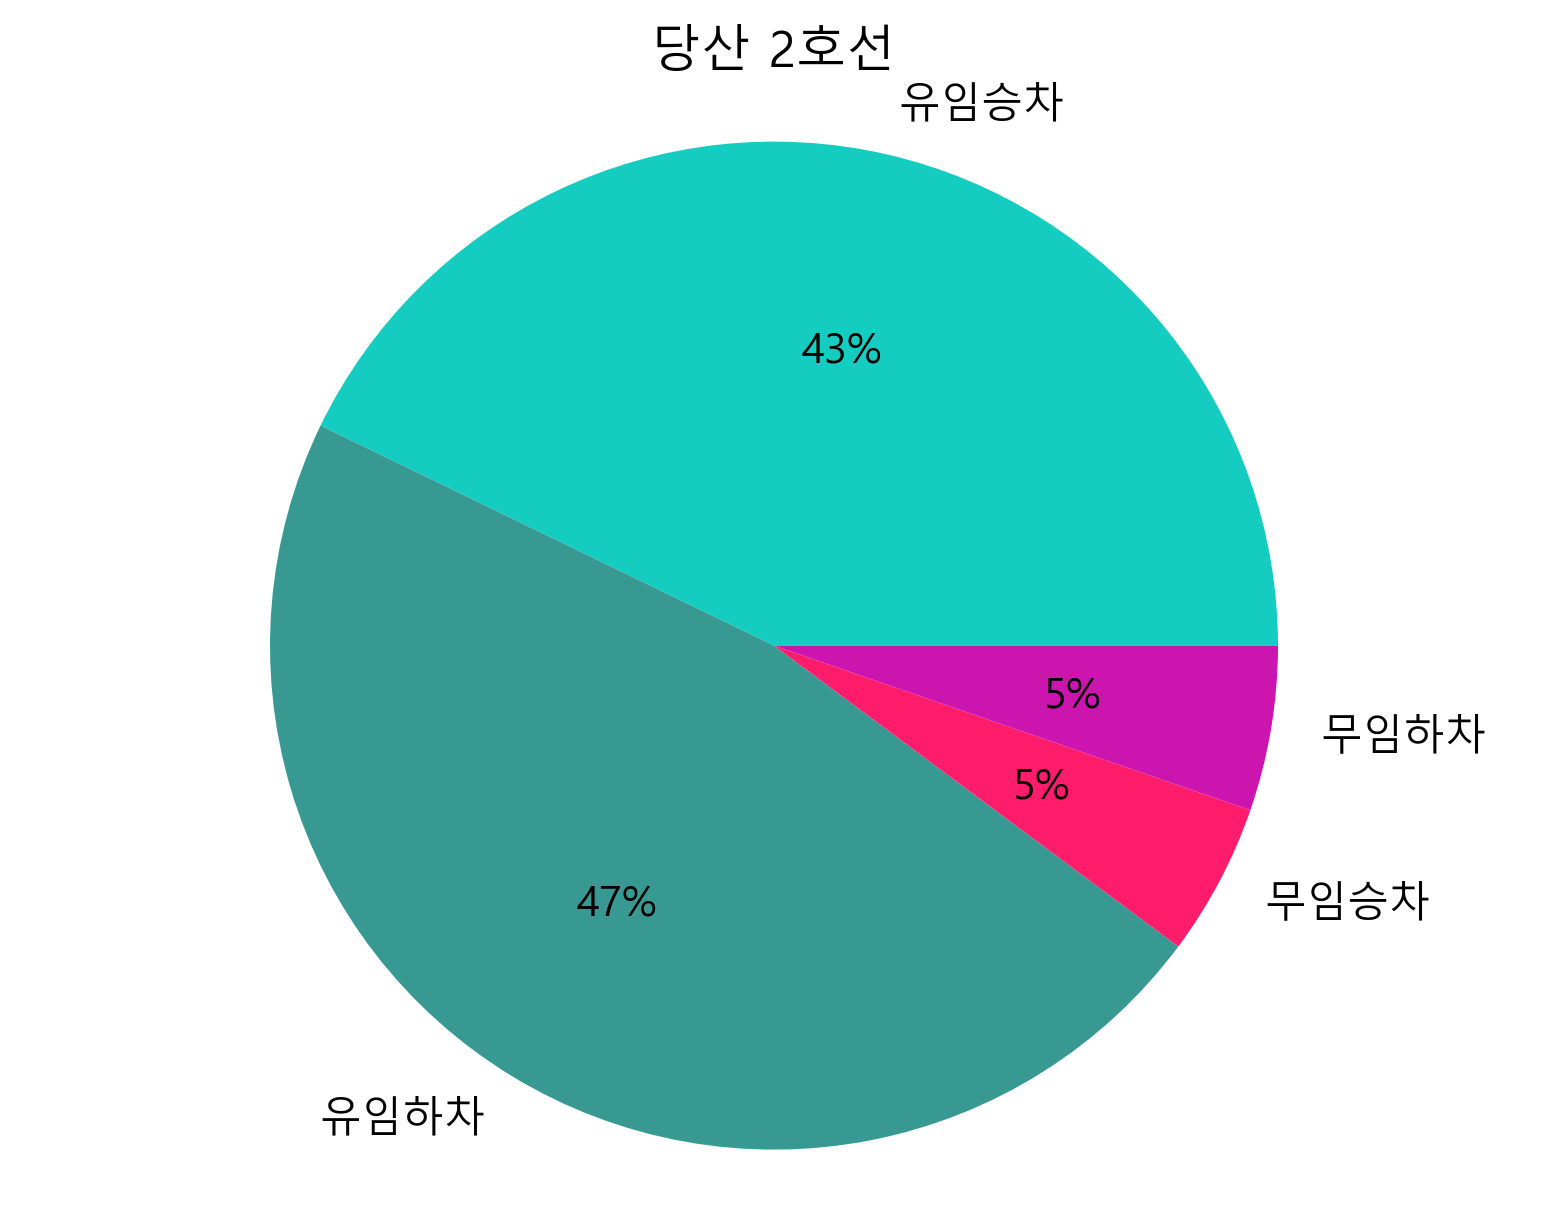

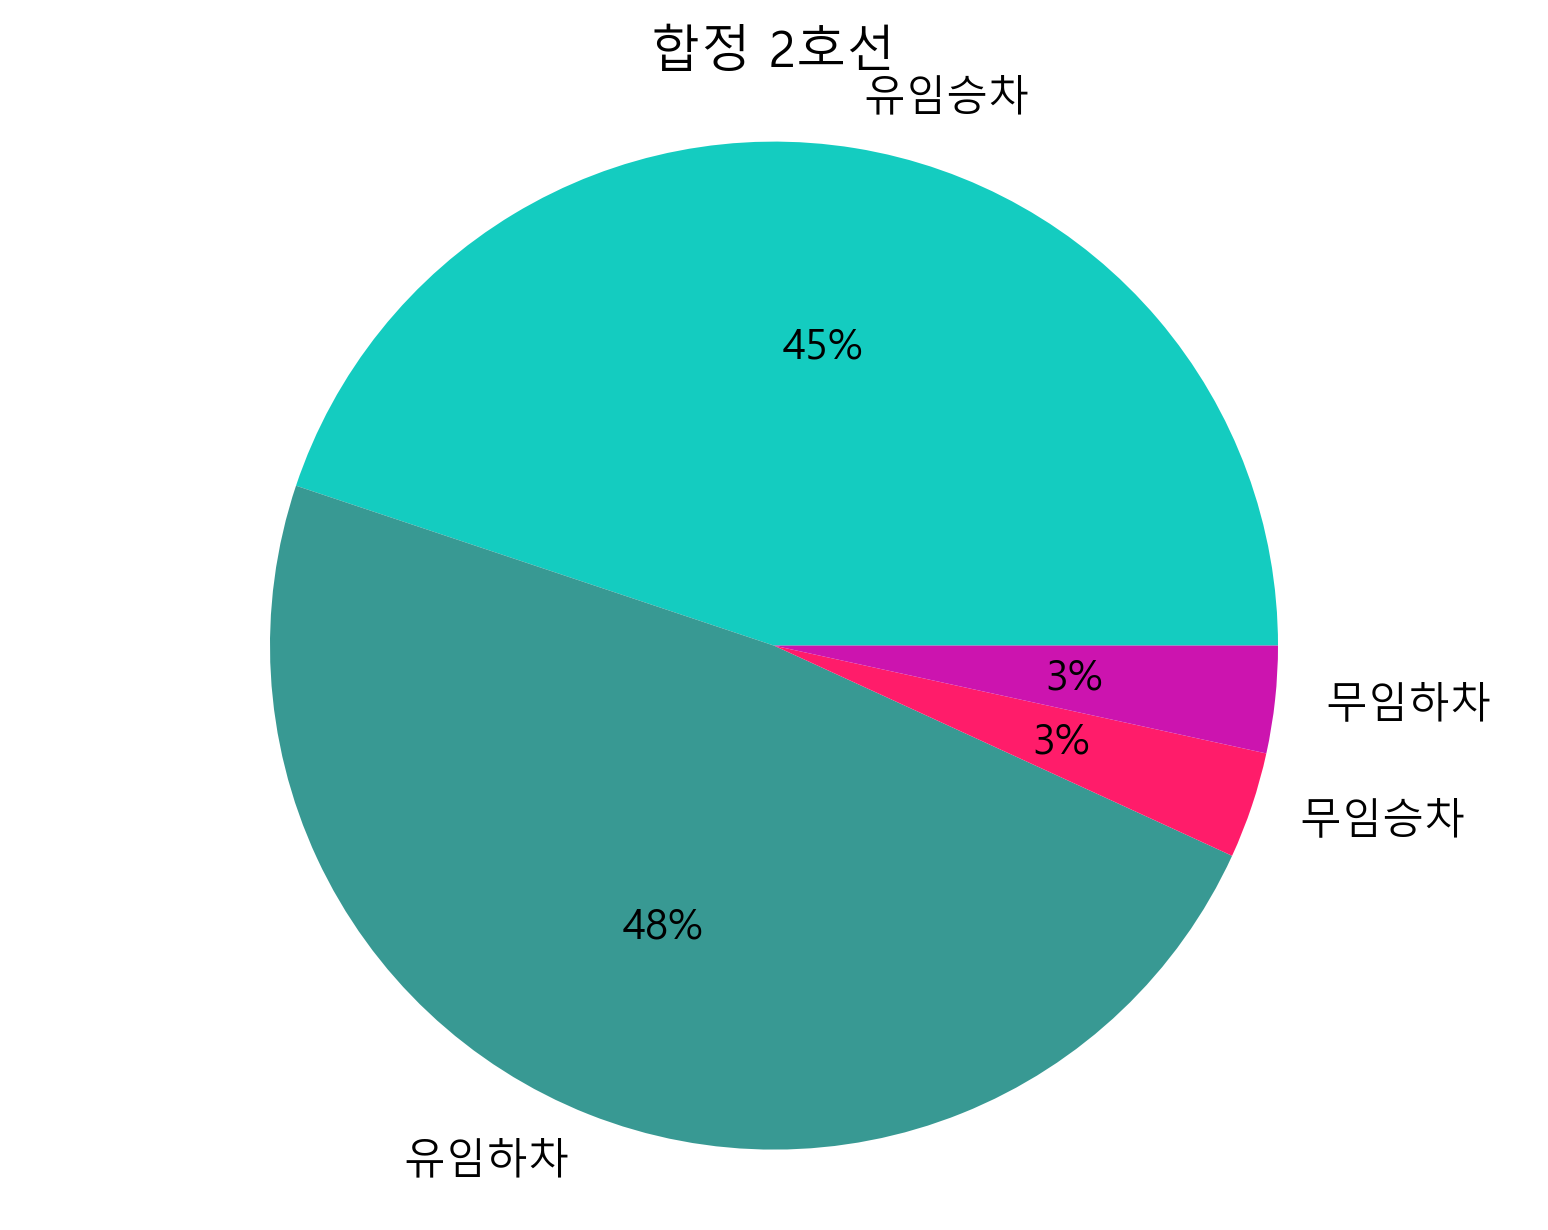

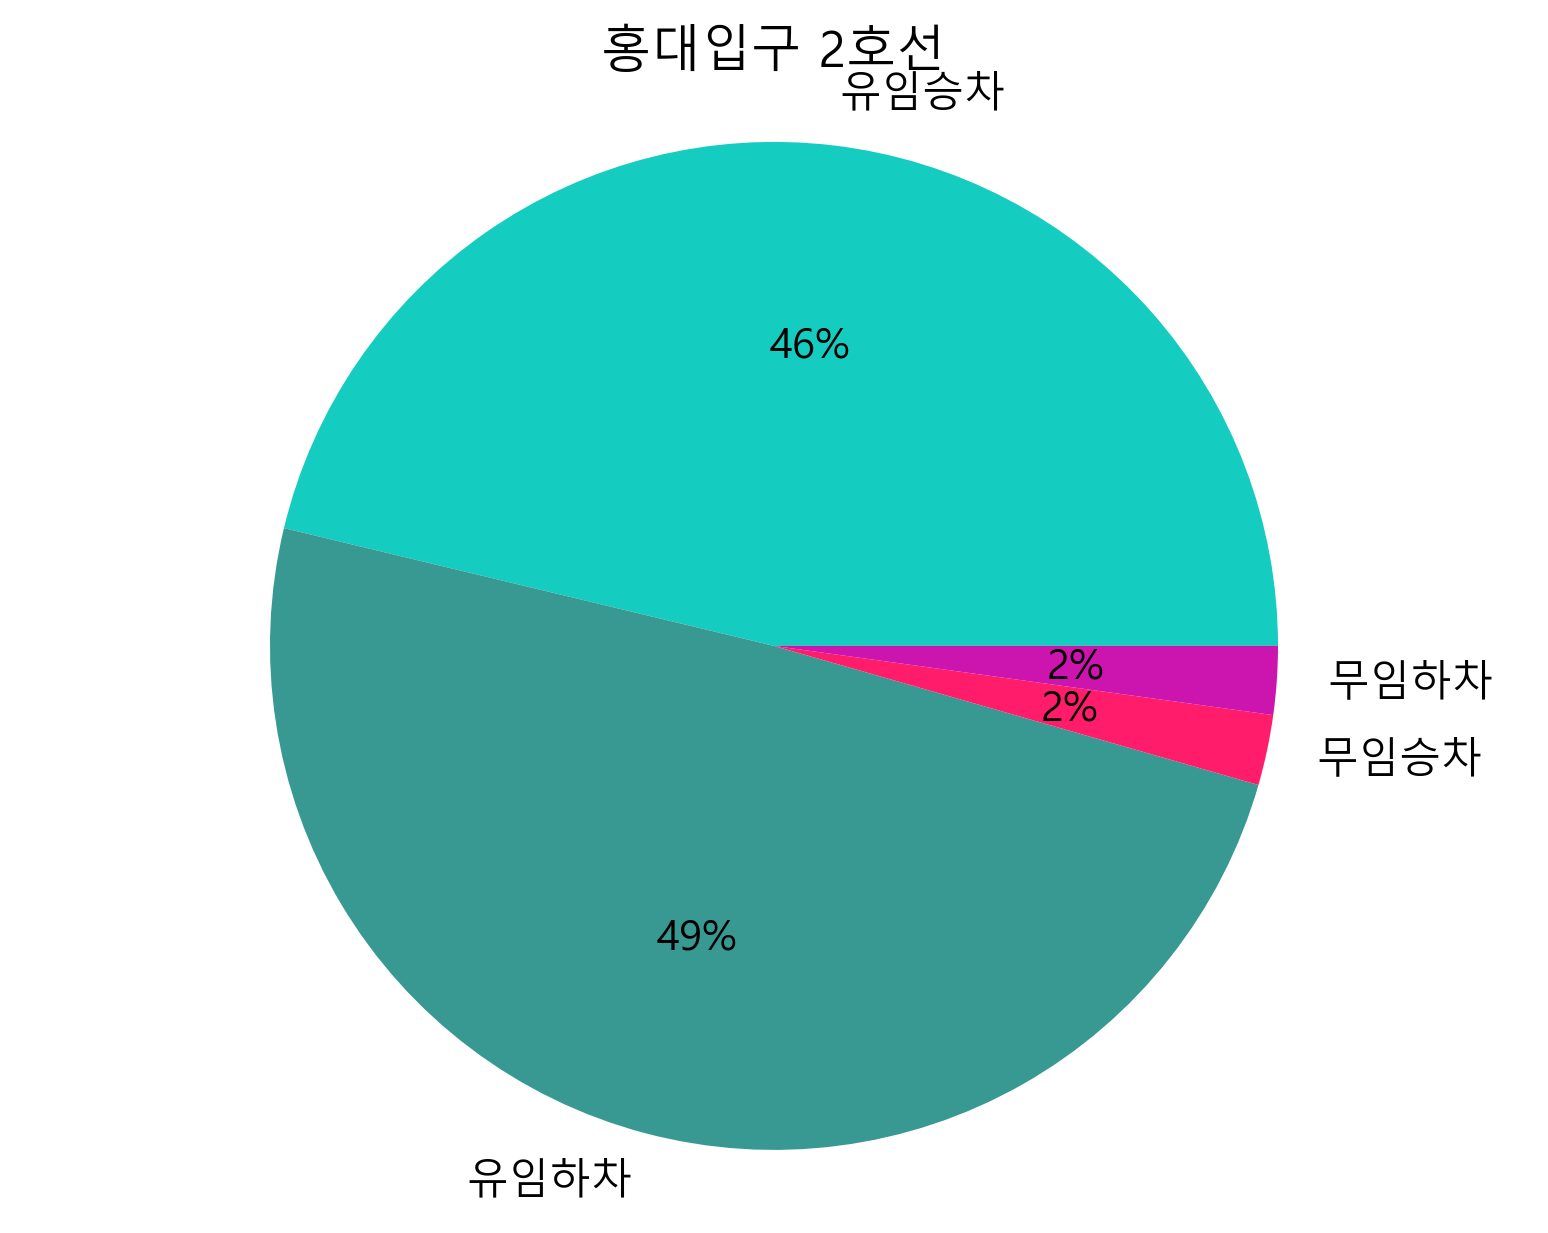

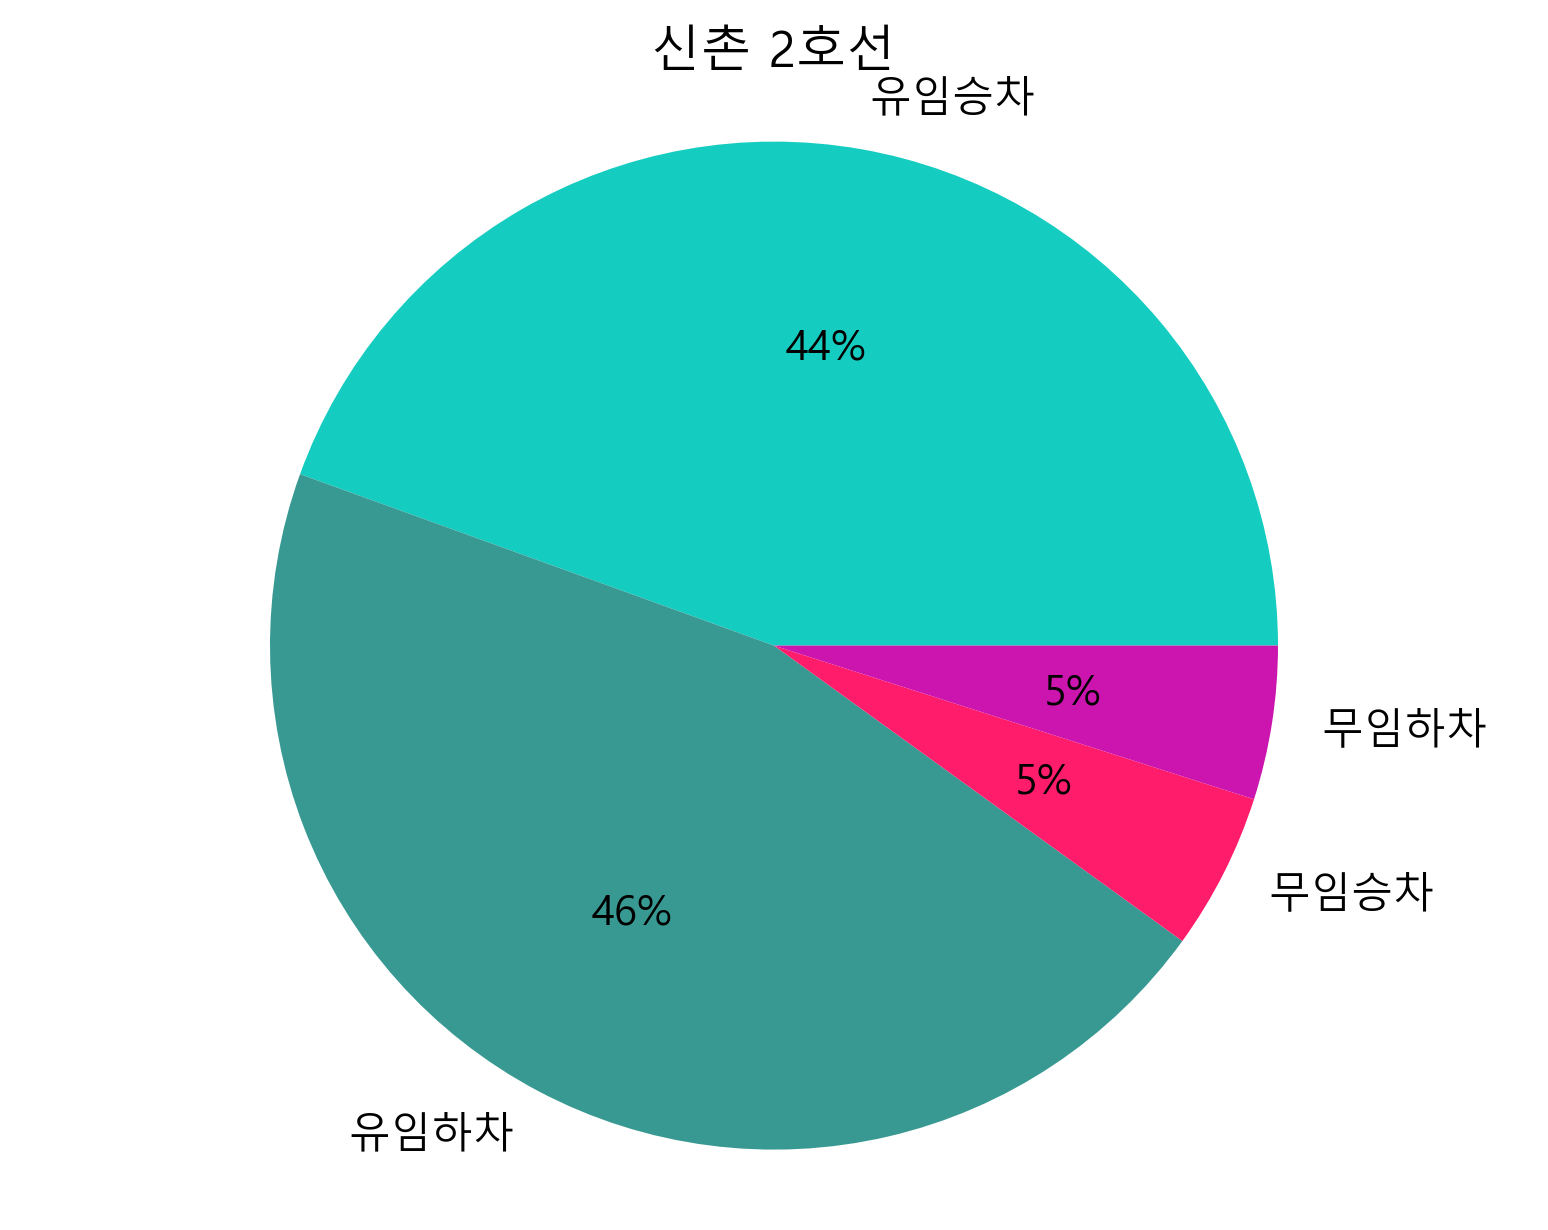

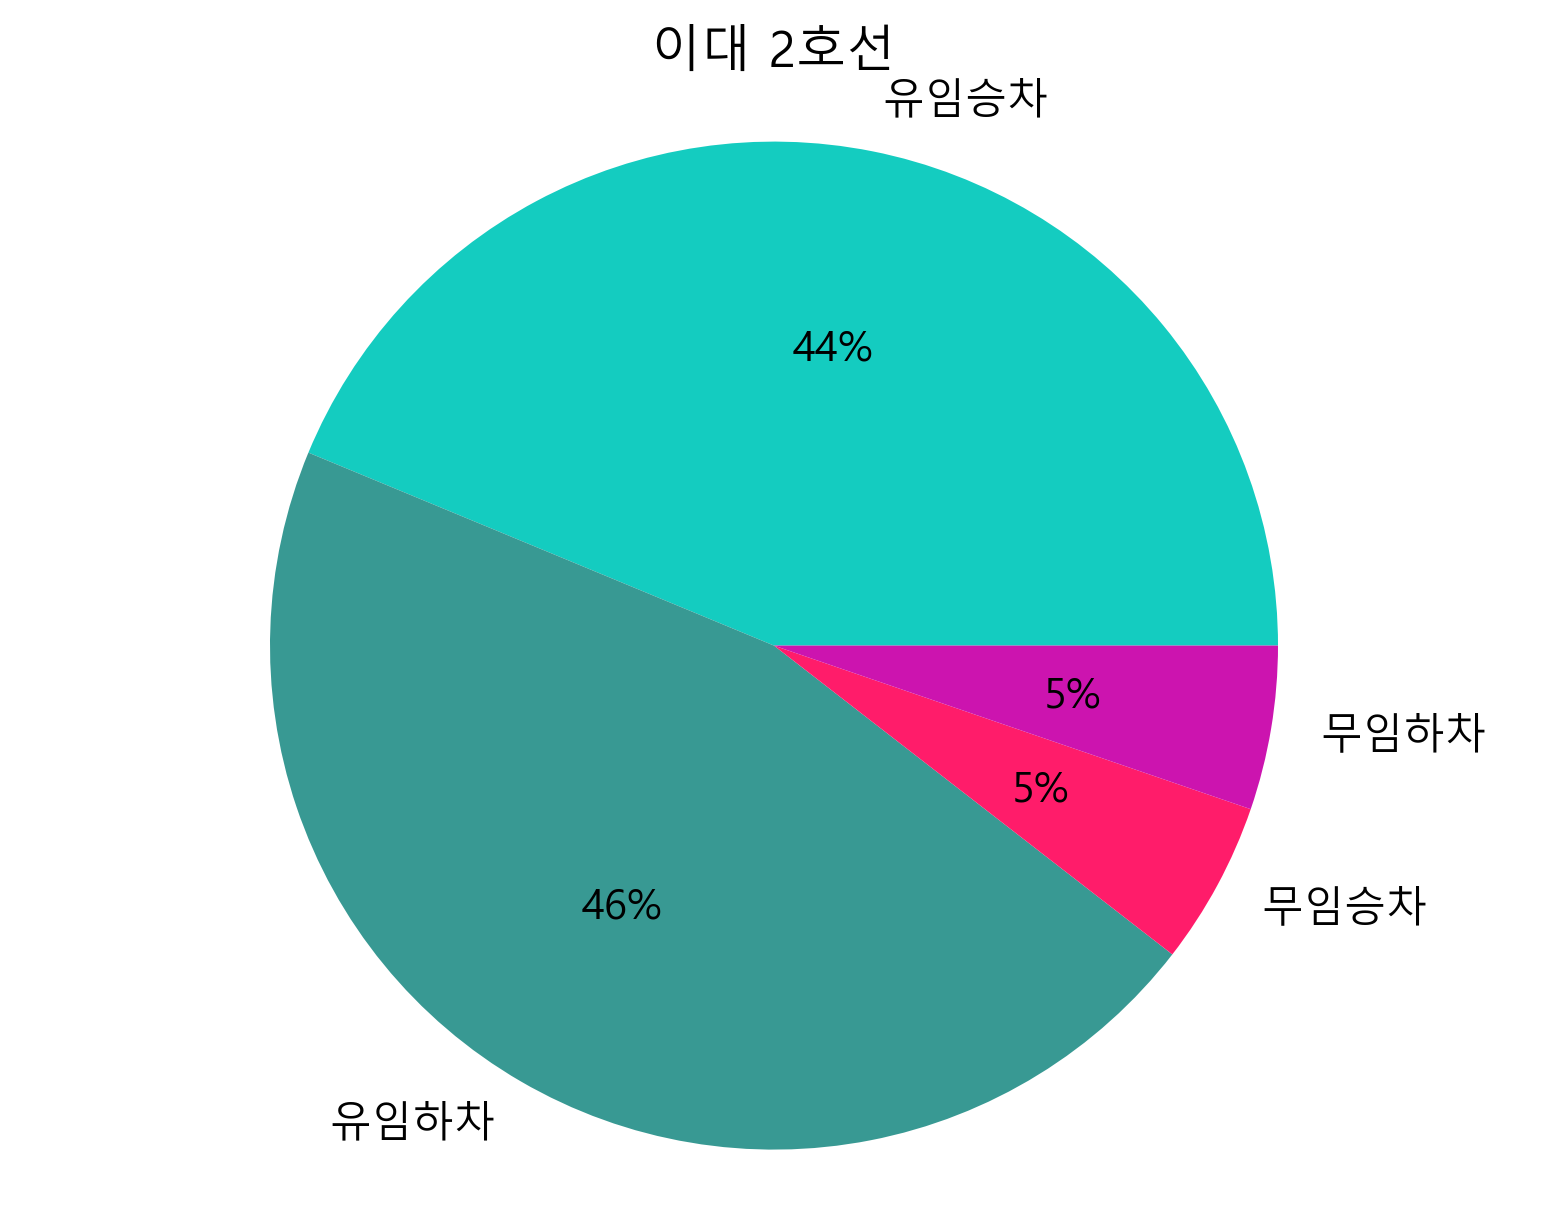

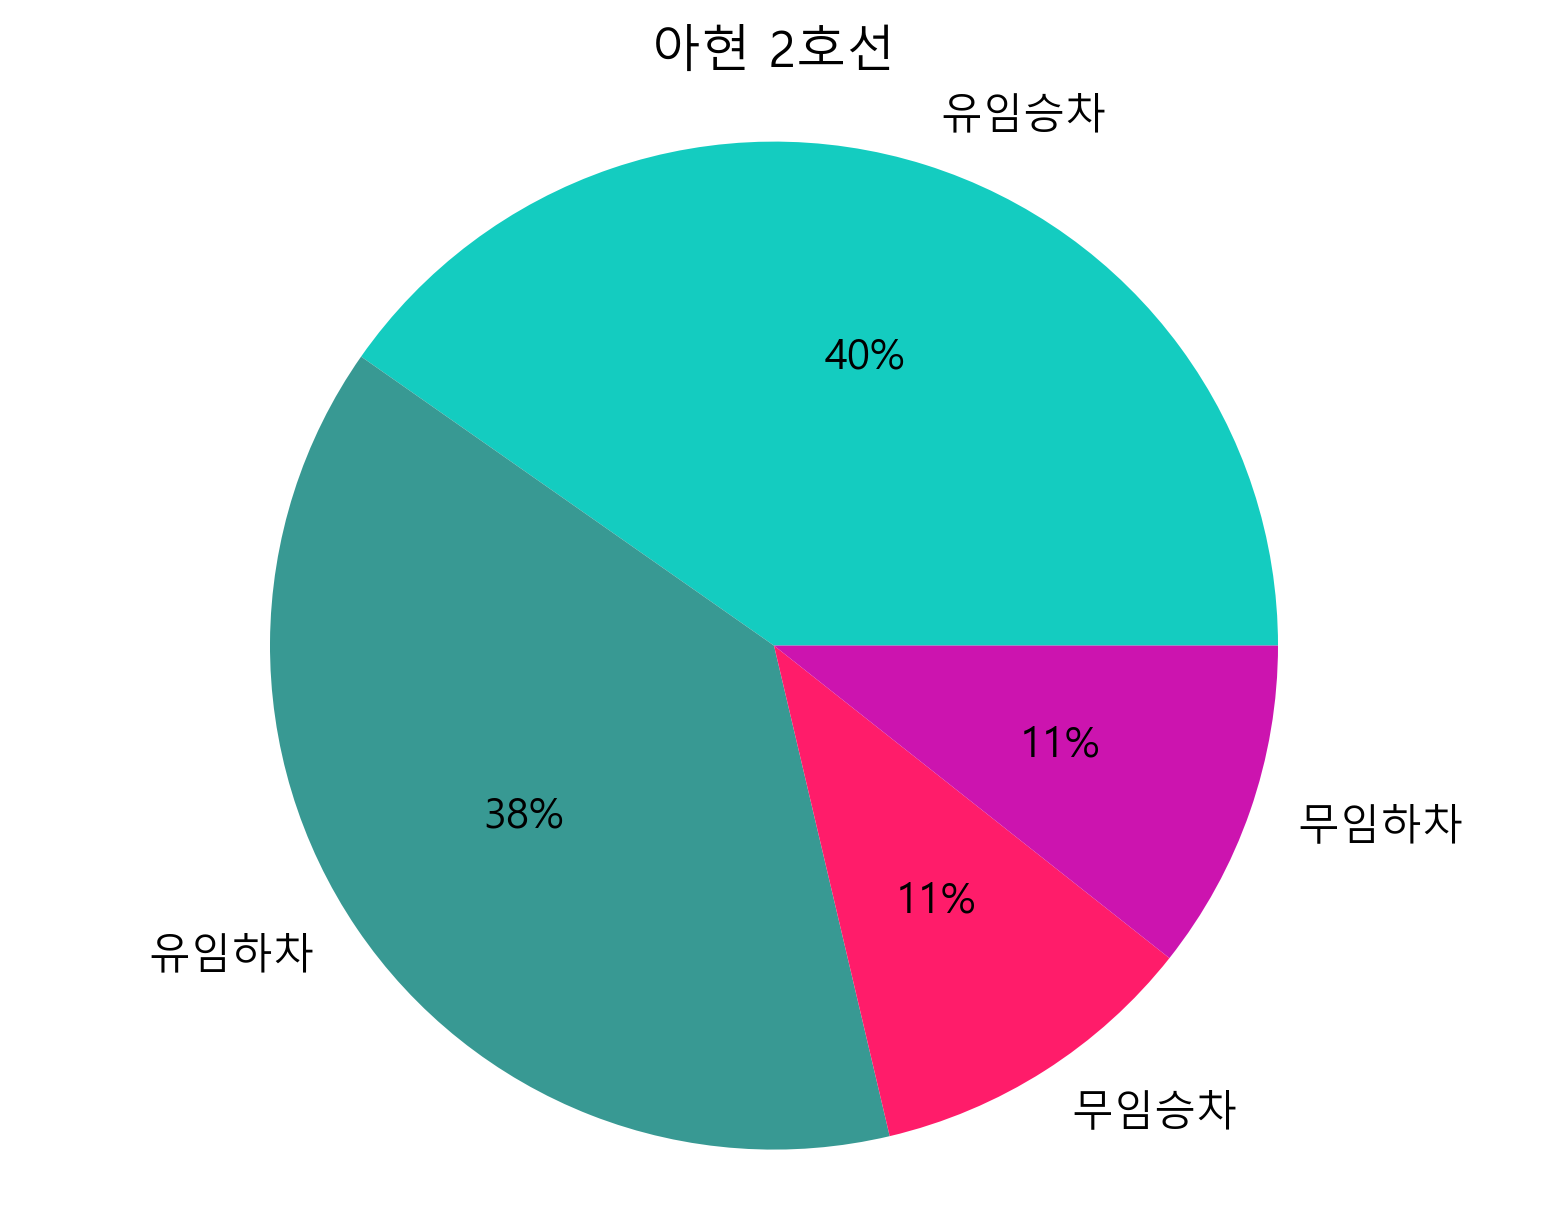

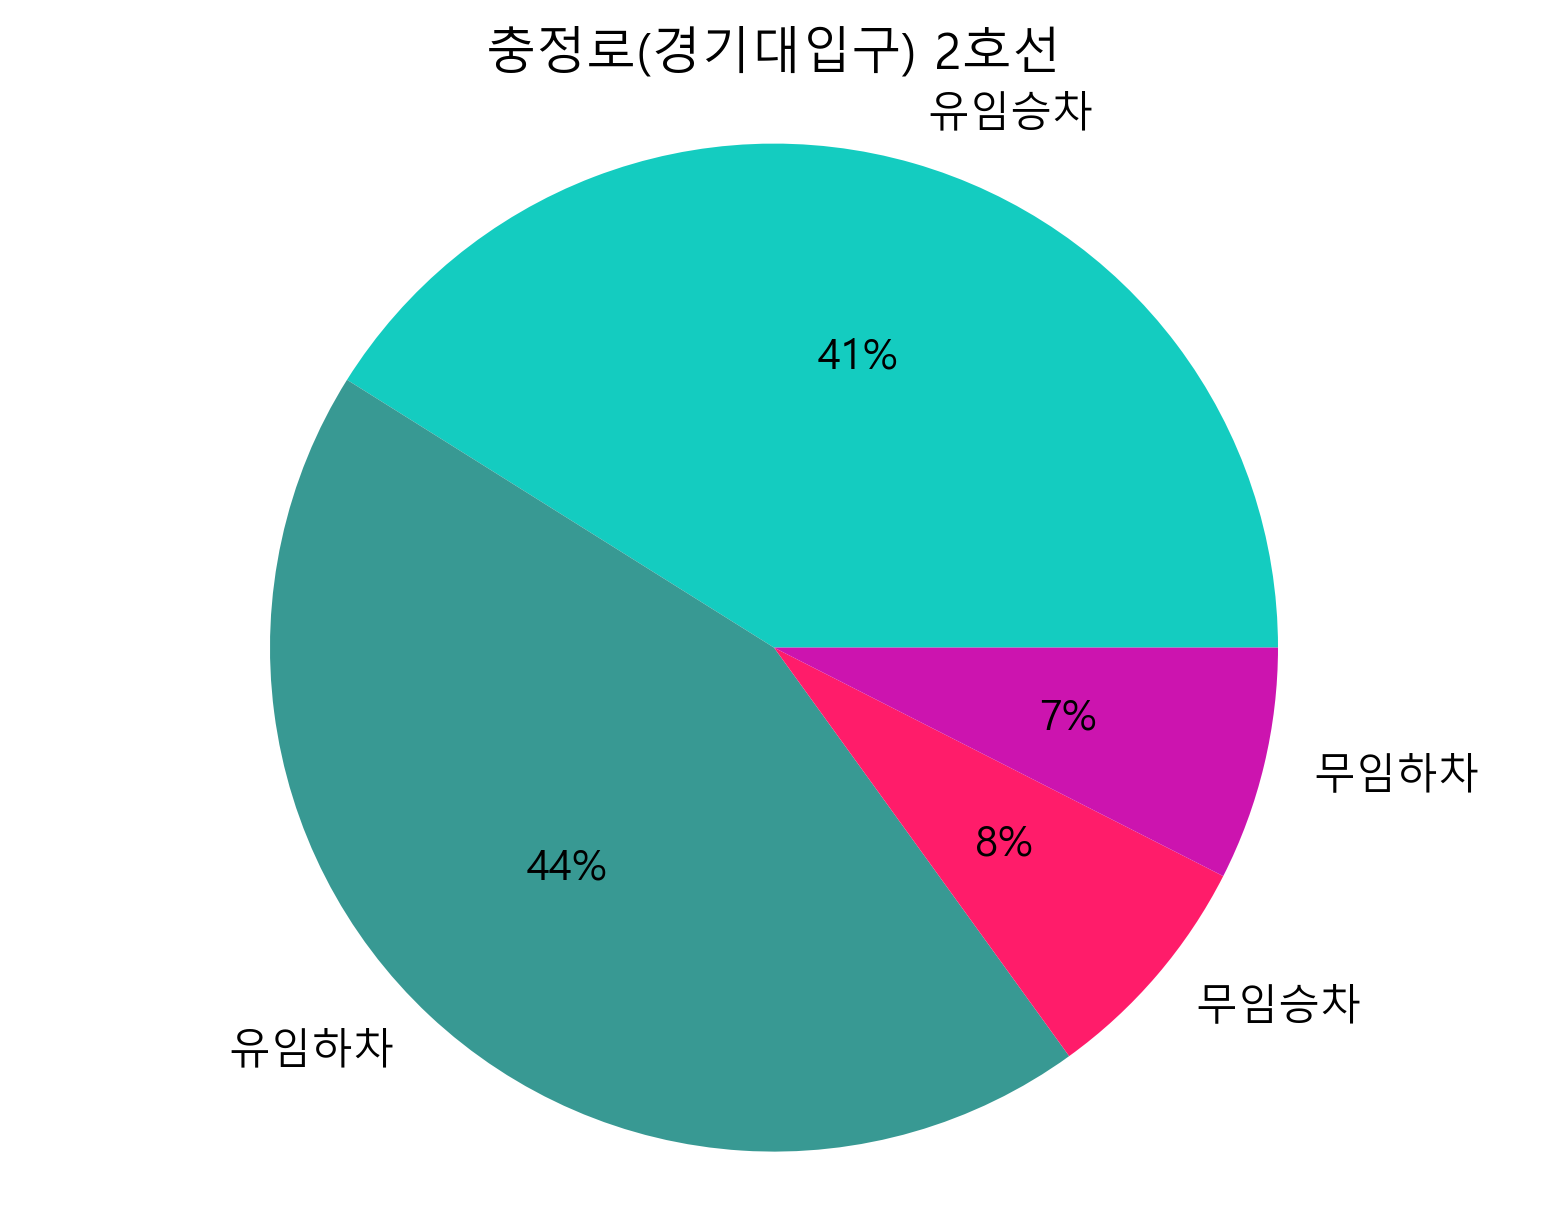

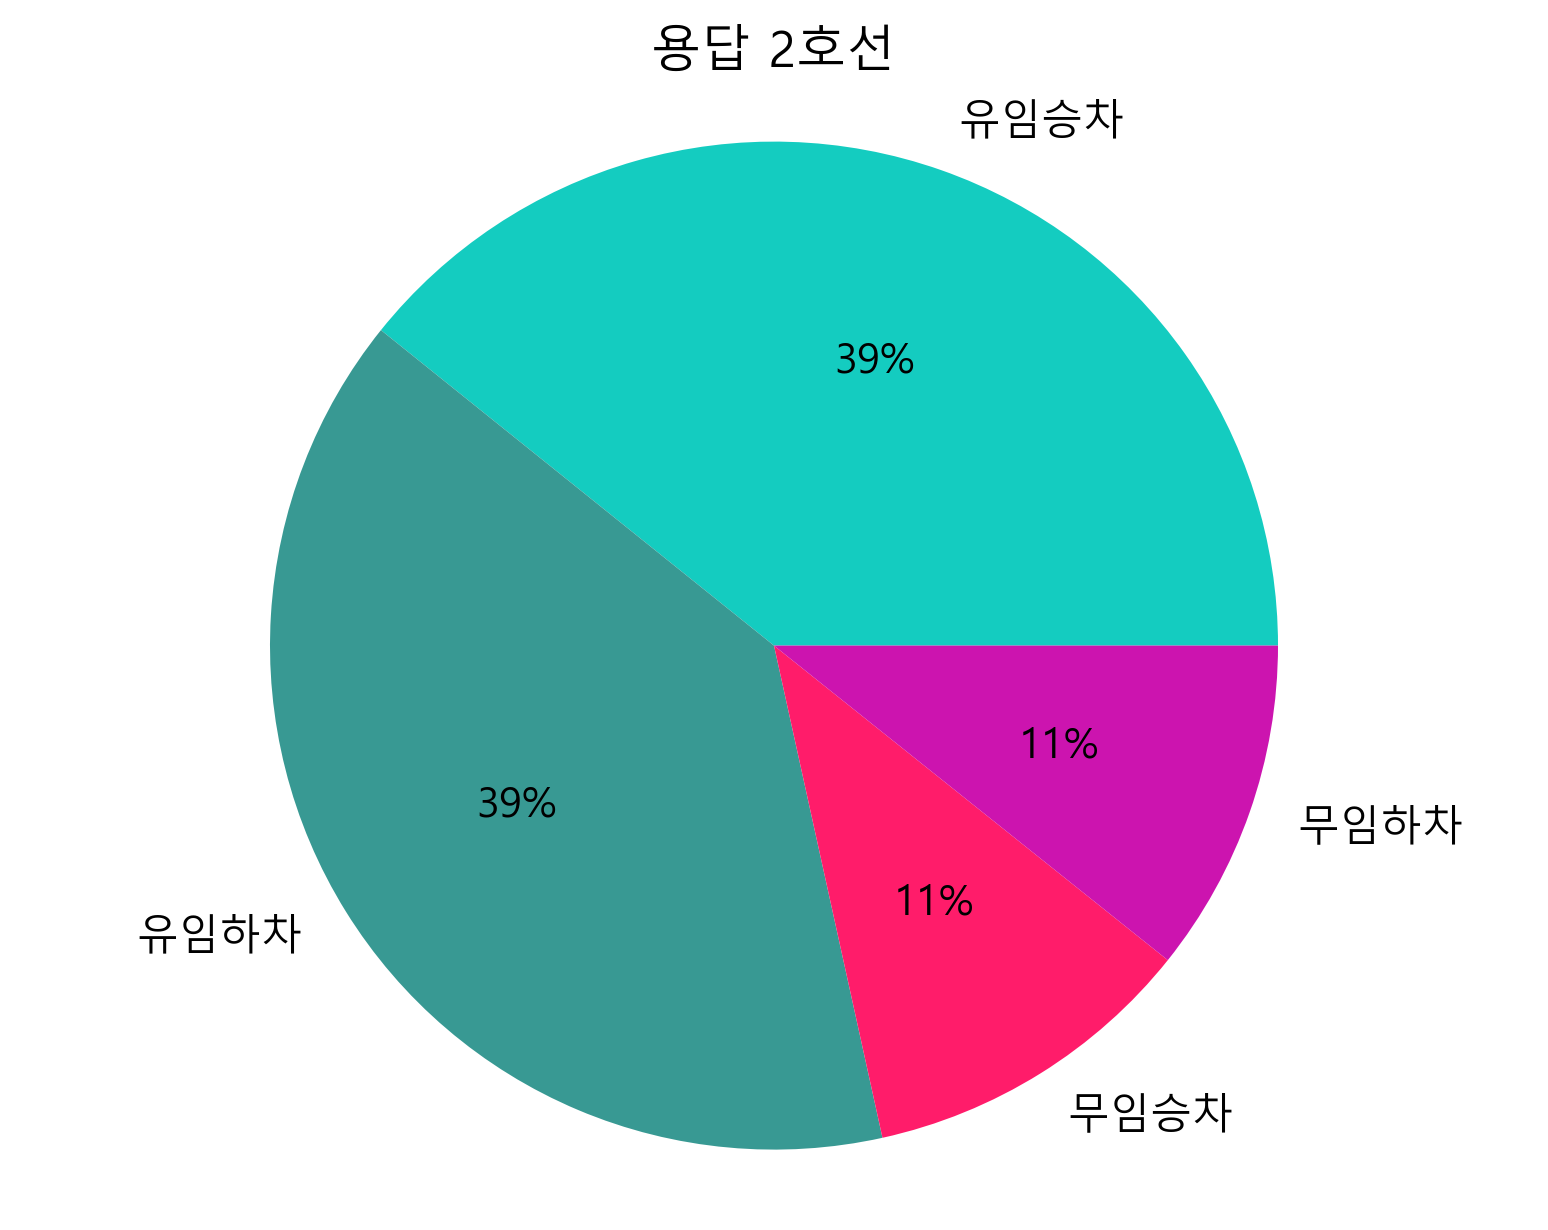

In [ ]:
f = open('./data/subwayfree.csv')
data  = csv.reader(f)
    
next(data)  # 헤더 건너뛰기

mx = [0]*4
mx_station = ['']*4

label = ['유임승차', '유임하차', '무임승차', '무임하차']

c = ['#14ccc0', '#389993', '#ff1c6a', '#cc14af']
plt.rc('font', family= 'Malgun Gothic')

for row in data :
    for i in range(4, 8):
        row[i] = int(row[i])

    plt.figure(dpi = 300)
    plt.title(row[3] + ' '+  row[1])
    plt.pie(row[4:8], labels=label, colors= c, autopct='%1.f%%')
    plt.axis('equal')
    plt.show()